# Supervised discretization
## Dataset: penbased/HandwirttenDigits (large dataset)
By: Sam & Malina
Update: 24/06/22

### About Dataset

pendigits.tra: Training	7494
pendigits.tes: Testing	3498
	
The way we used the dataset was to use first half of training for  actual training, one-fourth for validation and one-fourth for writer-dependent testing. The test set was used for writer-independent testing and is the actual quality measure.

Number of Attributes: 16 input + 1 class attribute (10 classes from 0-9)
The input vector size is 2xT, two times the number of points resampled. We considered spatial resampling to T=8,12,16 points in our experiments and found that T=8 gave the best trade-off between accuracy and complexity.

No missing value, balanced class

# 1. Prepare dataset

In [1]:
# Import library
import pandas as pd
import numpy as np
from collections import Counter #for Chi Merge

In [2]:
# Read data
data0_trn = pd.read_csv('pendigits_tra.csv', header=None) #training raw data
data0_tst = pd.read_csv('pendigits_tes.csv', header=None) #testing raw data

In [3]:
data0_trn.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [4]:
col0 = pd.read_csv('pendigits_col.csv', header=None, squeeze=True) #import column name

In [5]:
data0_trn.columns = col0 # change column name
data0_tst.columns = col0

In [6]:
data0_trn.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [7]:
data0_trn['class'] = pd.Categorical(data0_trn['class']) # convert class to categorical data
data0_tst['class'] = pd.Categorical(data0_tst['class'])

In [8]:
# Check number of unique values
data0_tst.select_dtypes(include=np.number).nunique()

0
A1     101
A2      80
A3     101
A4      88
A5     101
A6     101
A7     101
A8     101
A9     101
A10    100
A11    101
A12    101
A13    101
A14    101
A15    101
A16    101
dtype: int64

In [9]:
# Check number of unique values
data0_trn.select_dtypes(include=np.number).nunique()

0
A1     101
A2      96
A3     101
A4      96
A5     101
A6     101
A7     101
A8     101
A9     101
A10    101
A11    101
A12    101
A13    101
A14    101
A15    101
A16    101
dtype: int64

In [10]:
data0 = pd.concat([data0_trn, data0_tst])
data0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10992 entries, 0 to 3497
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   A1      10992 non-null  int64   
 1   A2      10992 non-null  int64   
 2   A3      10992 non-null  int64   
 3   A4      10992 non-null  int64   
 4   A5      10992 non-null  int64   
 5   A6      10992 non-null  int64   
 6   A7      10992 non-null  int64   
 7   A8      10992 non-null  int64   
 8   A9      10992 non-null  int64   
 9   A10     10992 non-null  int64   
 10  A11     10992 non-null  int64   
 11  A12     10992 non-null  int64   
 12  A13     10992 non-null  int64   
 13  A14     10992 non-null  int64   
 14  A15     10992 non-null  int64   
 15  A16     10992 non-null  int64   
 16  class   10992 non-null  category
dtypes: category(1), int64(16)
memory usage: 1.4 MB


In [11]:
data0.iloc[7494]==data0_tst.iloc[0] # Check: first item of tesing dataset in the merged dataset

0
A1       True
A2       True
A3       True
A4       True
A5       True
A6       True
A7       True
A8       True
A9       True
A10      True
A11      True
A12      True
A13      True
A14      True
A15      True
A16      True
class    True
Name: 0, dtype: bool

In [12]:
# Export this dataset for discretization
data0.to_csv('clean_pendigits.csv',index=False)

## Preprocess for discretization

In [13]:
#load data
pen = data0
pen

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493,36,100,24,70,0,38,49,33,95,47,87,55,96,21,100,0,4
3494,16,75,41,100,52,64,32,27,0,0,21,9,62,2,100,14,2
3495,56,100,27,79,0,39,12,0,66,15,100,51,93,93,38,93,0
3496,19,100,0,61,3,23,48,0,97,27,100,66,62,97,10,81,0


In [14]:
#cast categorical class values into integer
pen = pen.astype({'class':'int64'}) 
pen.dtypes

0
A1       int64
A2       int64
A3       int64
A4       int64
A5       int64
A6       int64
A7       int64
A8       int64
A9       int64
A10      int64
A11      int64
A12      int64
A13      int64
A14      int64
A15      int64
A16      int64
class    int64
dtype: object

In [15]:
#exstract class column
y_cat = pd.DataFrame(pen['class'])
y_cat.reset_index(drop=True, inplace=True)
y_cat

,class
0,8
1,2
2,1
3,4
4,1
...,...
10987,4
10988,2
10989,0
10990,0


In [16]:
#obtain columns
num_list = pen.columns.drop('class')
#num_list = pen.columns
num_list

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16'],
      dtype='object', name=0)

# 1. Chi Merge discretization

In [17]:
#Define function for chiMerge
def chimerge(data, attr, label, max_intervals):
    distinct_vals = sorted(set(data[attr])) # Sort the distinct values
    labels = sorted(set(data[label])) # Get all possible labels
    empty_count = {l: 0 for l in labels} # A helper function for padding the Counter()
    intervals = [[distinct_vals[i], distinct_vals[i]] for i in range(len(distinct_vals))] # Initialize the intervals for each attribute
    while len(intervals) > max_intervals: # While loop
        chi = []
        for i in range(len(intervals)-1):
            # Calculate the Chi2 value
            obs0 = data[data[attr].between(intervals[i][0], intervals[i][1])]
            obs1 = data[data[attr].between(intervals[i+1][0], intervals[i+1][1])]
            total = len(obs0) + len(obs1)
            count_0 = np.array([v for i, v in {**empty_count, **Counter(obs0[label])}.items()])
            count_1 = np.array([v for i, v in {**empty_count, **Counter(obs1[label])}.items()])
            count_total = count_0 + count_1
            expected_0 = count_total*sum(count_0)/total
            expected_1 = count_total*sum(count_1)/total
            chi_ = (count_0 - expected_0)**2/expected_0 + (count_1 - expected_1)**2/expected_1
            chi_ = np.nan_to_num(chi_) # Deal with the zero counts
            chi.append(sum(chi_)) # Finally do the summation for Chi2
        min_chi = min(chi) # Find the minimal Chi2 for current iteration
        for i, v in enumerate(chi):
            if v == min_chi:
                min_chi_index = i # Find the index of the interval to be merged
                break
        new_intervals = [] # Prepare for the merged new data array
        skip = False
        done = False
        for i in range(len(intervals)):
            if skip:
                skip = False
                continue
            if i == min_chi_index and not done: # Merge the intervals
                t = intervals[i] + intervals[i+1]
                new_intervals.append([min(t), max(t)])
                skip = True
                done = True
            else:
                new_intervals.append(intervals[i])
        intervals = new_intervals
    for i in intervals:
        print('[', i[0], ',', i[1], ']', sep='')
    return intervals
        

In [18]:
# DEBUG CHIMAP FUNCTION: Mapping interval to dataframe 
def chi_map2 (attr, data):
    disc_list = []
    for j in range(0,len(data)):
        #print('Raw value:', data[attr].loc[j])
        for i in range (0,len(chi_intervals[attr])):
            if (chi_intervals[attr][i][0] <= data[attr].loc[j]) & (data[attr].loc[j] <= chi_intervals[attr][i][1]):
                disc_list.append(i)
    return disc_list

In [19]:
# x = chi_intervals['A1'][0][0]
# y = pen['A1'].loc[2]
# z = chi_intervals['A1'][0][1]
# print(x)
# print(y)
# print(z)

# if ((x <= y) & (y <= z)):
#     print('sucess')


# DEBUG CHIMAP FUNCTION: Mapping interval to dataframe 
def chi_map (attr, data):
    disc_list = []
    for j in range(0,len(data)):
        #print('Raw value:', data[attr].loc[j])
        for i in range (0,len(chi_intervals[attr])):
            x = chi_intervals[attr][i][0]
            y = data[attr].iloc[j]
            z = chi_intervals[attr][i][1]
            if (x <= y) & (y <= z):
                    disc_list.append(i)
    return disc_list

## 2.1 ChiMerge with 6 intervals

### 2.1.1 debug version

In [20]:
# #Chi Merge with 6 intervals
# # import time
# start = time.time() # For measuring time execution

In [21]:
# #pen = pen.head(50)
# pen

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493,36,100,24,70,0,38,49,33,95,47,87,55,96,21,100,0,4
3494,16,75,41,100,52,64,32,27,0,0,21,9,62,2,100,14,2
3495,56,100,27,79,0,39,12,0,66,15,100,51,93,93,38,93,0
3496,19,100,0,61,3,23,48,0,97,27,100,66,62,97,10,81,0


In [22]:
# # Create a dictionary for saving intervals
# chi_intervals = {} 
# for i in num_list:
#     interval = chimerge(data=pen, attr=i, label='class', max_intervals=6)
#     chi_intervals[i]=interval

C:\Users\malin\AppData\Local\Temp/ipykernel_29132/3753680822.py:19: RuntimeWarning: invalid value encountered in true_divide
  chi_ = (count_0 - expected_0)**2/expected_0 + (count_1 - expected_1)**2/expected_1


[0,0]
[1,15]
[16,36]
[37,68]
[69,99]
[100,100]
[0,62]
[63,73]
[74,80]
[81,90]
[91,99]
[100,100]
[0,14]
[15,24]
[25,34]
[35,53]
[54,89]
[90,100]
[0,49]
[50,68]
[69,74]
[75,92]
[93,99]
[100,100]
[0,0]
[1,34]
[35,45]
[46,58]
[59,80]
[81,100]
[0,21]
[22,40]
[41,63]
[64,74]
[75,99]
[100,100]
[0,20]
[21,26]
[27,49]
[50,81]
[82,99]
[100,100]
[0,12]
[13,32]
[33,44]
[45,56]
[57,79]
[80,100]
[0,13]
[14,49]
[50,68]
[69,79]
[80,99]
[100,100]
[0,0]
[1,19]
[20,32]
[33,42]
[43,59]
[60,100]
[0,21]
[22,35]
[36,52]
[53,73]
[74,89]
[90,100]
[0,0]
[1,11]
[12,27]
[28,39]
[40,69]
[70,100]
[0,32]
[33,46]
[47,57]
[58,72]
[73,99]
[100,100]
[0,0]
[1,13]
[14,26]
[27,50]
[51,82]
[83,100]
[0,0]
[1,18]
[19,51]
[52,81]
[82,99]
[100,100]
[0,0]
[1,8]
[9,26]
[27,51]
[52,93]
[94,100]


In [23]:
# chi_intervals

{'A1': [[0, 0], [1, 15], [16, 36], [37, 68], [69, 99], [100, 100]],
 'A2': [[0, 62], [63, 73], [74, 80], [81, 90], [91, 99], [100, 100]],
 'A3': [[0, 14], [15, 24], [25, 34], [35, 53], [54, 89], [90, 100]],
 'A4': [[0, 49], [50, 68], [69, 74], [75, 92], [93, 99], [100, 100]],
 'A5': [[0, 0], [1, 34], [35, 45], [46, 58], [59, 80], [81, 100]],
 'A6': [[0, 21], [22, 40], [41, 63], [64, 74], [75, 99], [100, 100]],
 'A7': [[0, 20], [21, 26], [27, 49], [50, 81], [82, 99], [100, 100]],
 'A8': [[0, 12], [13, 32], [33, 44], [45, 56], [57, 79], [80, 100]],
 'A9': [[0, 13], [14, 49], [50, 68], [69, 79], [80, 99], [100, 100]],
 'A10': [[0, 0], [1, 19], [20, 32], [33, 42], [43, 59], [60, 100]],
 'A11': [[0, 21], [22, 35], [36, 52], [53, 73], [74, 89], [90, 100]],
 'A12': [[0, 0], [1, 11], [12, 27], [28, 39], [40, 69], [70, 100]],
 'A13': [[0, 32], [33, 46], [47, 57], [58, 72], [73, 99], [100, 100]],
 'A14': [[0, 0], [1, 13], [14, 26], [27, 50], [51, 82], [83, 100]],
 'A15': [[0, 0], [1, 18], [19, 5

In [24]:
# # For checking result: Get the number of intervals after chi merge discretization for each attribute
# for k, v in chi_intervals.items():
#     print(k)
#     print(len(v)) # number of intervals

A1
6
A2
6
A3
6
A4
6
A5
6
A6
6
A7
6
A8
6
A9
6
A10
6
A11
6
A12
6
A13
6
A14
6
A15
6
A16
6


In [25]:
# # Mapping original data to the intervals created
# pen_disc_6intervals = {}
# for k in num_list:
#     print(k)
#     v = chi_map(k, pen)
#     print(v)
#     pen_disc_6intervals[k]=v

A1
[3, 0, 0, 0, 0, 5, 0, 0, 1, 3, 4, 3, 5, 4, 0, 2, 3, 4, 2, 0, 1, 0, 1, 4, 3, 1, 2, 3, 3, 5, 2, 3, 0, 2, 0, 2, 2, 4, 3, 1, 0, 2, 3, 0, 1, 5, 3, 2, 1, 3, 1, 3, 3, 0, 2, 3, 2, 1, 2, 4, 3, 2, 1, 0, 0, 5, 3, 5, 4, 0, 4, 2, 2, 0, 4, 0, 3, 4, 2, 1, 2, 3, 3, 2, 2, 2, 0, 3, 3, 4, 2, 3, 2, 1, 0, 2, 0, 3, 5, 2, 1, 2, 1, 3, 1, 3, 2, 2, 3, 0, 4, 1, 4, 0, 3, 3, 1, 5, 3, 3, 5, 3, 3, 1, 3, 2, 2, 3, 4, 2, 1, 3, 3, 5, 5, 4, 5, 0, 3, 4, 2, 4, 3, 5, 2, 1, 0, 2, 1, 3, 2, 0, 0, 3, 4, 1, 0, 4, 0, 3, 0, 0, 1, 1, 2, 3, 2, 3, 3, 3, 4, 2, 3, 1, 0, 0, 0, 4, 2, 2, 0, 0, 2, 2, 2, 4, 4, 5, 2, 2, 4, 0, 0, 2, 5, 3, 5, 2, 4, 3, 3, 2, 1, 3, 5, 3, 0, 0, 0, 2, 4, 4, 0, 5, 3, 0, 1, 4, 3, 3, 4, 0, 3, 4, 3, 4, 4, 2, 3, 2, 5, 0, 0, 0, 0, 1, 3, 0, 4, 2, 3, 2, 0, 5, 1, 3, 4, 0, 3, 0, 4, 5, 0, 0, 5, 2, 5, 3, 4, 4, 2, 0, 5, 4, 2, 2, 3, 0, 3, 3, 4, 1, 4, 3, 5, 1, 1, 2, 3, 0, 2, 3, 5, 5, 5, 2, 5, 0, 4, 4, 2, 2, 5, 5, 4, 3, 3, 0, 2, 1, 3, 0, 3, 1, 5, 0, 0, 5, 4, 1, 3, 0, 3, 5, 2, 1, 0, 0, 2, 0, 2, 1, 0, 0, 3, 0, 3, 2, 5, 3, 2, 3, 

[5, 3, 0, 5, 1, 5, 5, 0, 3, 5, 3, 4, 5, 2, 3, 2, 3, 2, 1, 1, 2, 0, 3, 0, 5, 5, 4, 5, 0, 3, 0, 4, 4, 2, 0, 3, 4, 4, 4, 4, 4, 3, 5, 3, 3, 4, 3, 1, 3, 5, 4, 2, 4, 2, 5, 4, 3, 2, 1, 5, 1, 3, 0, 3, 5, 2, 4, 5, 2, 3, 5, 2, 5, 2, 1, 4, 4, 5, 2, 2, 1, 5, 1, 5, 3, 3, 5, 4, 0, 4, 3, 5, 5, 4, 1, 3, 0, 1, 5, 0, 4, 3, 5, 3, 1, 4, 0, 5, 4, 3, 4, 1, 5, 3, 4, 5, 5, 2, 1, 5, 3, 4, 5, 1, 3, 5, 4, 4, 5, 1, 4, 3, 5, 4, 1, 5, 5, 0, 5, 3, 3, 5, 2, 3, 4, 2, 0, 5, 1, 5, 0, 1, 0, 5, 2, 2, 2, 5, 5, 3, 5, 0, 3, 5, 2, 5, 5, 3, 4, 3, 5, 2, 0, 5, 1, 1, 1, 4, 5, 5, 2, 4, 4, 4, 1, 5, 2, 5, 3, 0, 3, 4, 1, 5, 4, 5, 5, 0, 3, 5, 5, 5, 2, 4, 5, 5, 0, 2, 0, 3, 3, 5, 3, 5, 4, 4, 1, 4, 2, 5, 5, 3, 2, 5, 5, 1, 5, 1, 4, 4, 5, 4, 3, 0, 5, 0, 4, 1, 1, 2, 2, 4, 4, 2, 0, 4, 5, 0, 0, 0, 5, 5, 3, 2, 5, 4, 5, 4, 5, 3, 2, 1, 4, 5, 2, 3, 0, 3, 1, 3, 3, 5, 5, 5, 5, 5, 4, 0, 2, 2, 2, 5, 4, 5, 4, 1, 5, 4, 5, 4, 2, 1, 5, 5, 5, 3, 0, 3, 3, 3, 3, 4, 5, 2, 5, 0, 1, 4, 1, 0, 5, 2, 5, 2, 2, 3, 3, 3, 3, 1, 1, 5, 3, 3, 2, 0, 4, 5, 5, 2, 1, 5, 3, 

[2, 2, 2, 0, 3, 4, 0, 0, 0, 1, 2, 4, 4, 4, 3, 4, 4, 4, 3, 1, 1, 3, 2, 3, 2, 0, 0, 0, 4, 2, 3, 3, 3, 0, 2, 4, 0, 3, 0, 3, 4, 1, 1, 2, 3, 4, 4, 3, 0, 3, 4, 4, 1, 3, 0, 1, 4, 3, 0, 3, 5, 4, 0, 3, 4, 4, 4, 4, 3, 4, 3, 0, 1, 2, 5, 3, 0, 3, 4, 3, 4, 1, 4, 0, 0, 0, 4, 0, 0, 3, 0, 1, 0, 3, 3, 0, 3, 1, 4, 1, 0, 4, 0, 4, 0, 5, 0, 0, 1, 3, 3, 0, 2, 1, 4, 0, 0, 5, 4, 3, 3, 0, 0, 1, 0, 0, 0, 4, 3, 4, 0, 2, 1, 4, 4, 4, 3, 2, 2, 2, 0, 3, 4, 4, 1, 3, 2, 0, 1, 3, 4, 3, 3, 1, 0, 3, 3, 3, 4, 4, 4, 4, 2, 0, 3, 1, 5, 5, 0, 4, 3, 1, 4, 0, 3, 3, 1, 3, 1, 0, 1, 3, 4, 0, 4, 3, 1, 4, 3, 0, 3, 3, 4, 0, 4, 1, 4, 4, 3, 3, 1, 0, 3, 5, 4, 0, 1, 2, 2, 4, 4, 2, 4, 5, 3, 3, 2, 1, 1, 2, 3, 3, 4, 4, 0, 4, 4, 3, 1, 1, 3, 3, 2, 2, 3, 3, 4, 3, 2, 0, 4, 0, 3, 5, 2, 4, 3, 3, 5, 0, 3, 4, 3, 2, 4, 0, 0, 1, 0, 2, 4, 4, 4, 4, 4, 0, 5, 3, 0, 2, 0, 0, 3, 2, 3, 0, 0, 4, 3, 2, 1, 0, 4, 4, 4, 2, 4, 3, 4, 3, 3, 3, 4, 4, 2, 4, 4, 2, 1, 3, 5, 3, 1, 3, 4, 2, 2, 4, 3, 4, 2, 3, 5, 3, 4, 0, 2, 3, 0, 3, 0, 1, 3, 3, 1, 3, 1, 0, 4, 4, 5, 4, 3, 

[3, 5, 1, 3, 3, 4, 2, 1, 1, 2, 5, 1, 4, 5, 5, 5, 5, 5, 5, 4, 1, 1, 1, 5, 3, 2, 3, 3, 5, 5, 5, 1, 5, 0, 0, 5, 1, 5, 1, 5, 5, 1, 3, 5, 4, 5, 5, 5, 1, 2, 5, 3, 2, 3, 2, 3, 5, 5, 2, 3, 5, 5, 0, 5, 5, 5, 5, 3, 5, 1, 5, 0, 3, 2, 5, 5, 1, 3, 5, 5, 5, 3, 5, 3, 1, 1, 4, 1, 1, 5, 1, 3, 1, 5, 3, 0, 3, 1, 3, 3, 1, 5, 1, 1, 0, 5, 1, 1, 1, 5, 5, 0, 3, 1, 1, 3, 1, 5, 5, 1, 3, 1, 1, 0, 1, 3, 4, 5, 4, 5, 1, 0, 3, 5, 5, 4, 3, 1, 3, 1, 0, 3, 5, 5, 1, 4, 1, 3, 5, 3, 1, 3, 3, 3, 3, 2, 1, 3, 5, 5, 4, 2, 5, 3, 5, 3, 4, 5, 3, 5, 4, 0, 3, 1, 3, 3, 3, 3, 3, 1, 4, 5, 5, 1, 3, 3, 1, 3, 2, 0, 5, 5, 3, 1, 5, 1, 4, 2, 5, 3, 3, 2, 1, 5, 4, 3, 3, 3, 1, 5, 1, 2, 5, 3, 1, 5, 1, 5, 1, 2, 4, 5, 5, 3, 3, 5, 3, 5, 2, 1, 3, 5, 5, 1, 4, 1, 5, 1, 1, 0, 5, 1, 5, 5, 5, 1, 3, 0, 3, 1, 2, 4, 5, 5, 3, 3, 3, 2, 4, 3, 5, 0, 5, 2, 5, 1, 3, 4, 1, 1, 5, 3, 2, 4, 4, 4, 0, 3, 5, 5, 5, 1, 5, 3, 5, 5, 3, 5, 3, 5, 5, 5, 4, 3, 3, 5, 5, 5, 1, 5, 5, 5, 3, 5, 4, 1, 3, 5, 5, 1, 2, 5, 4, 1, 5, 0, 5, 5, 1, 3, 1, 4, 5, 5, 1, 2, 4, 1, 5, 5, 3, 3, 5, 

[3, 2, 4, 1, 5, 3, 1, 1, 4, 0, 0, 5, 2, 0, 5, 5, 4, 1, 4, 4, 4, 4, 4, 0, 1, 1, 0, 1, 0, 0, 5, 4, 4, 1, 4, 4, 4, 0, 5, 5, 5, 4, 0, 5, 5, 1, 5, 4, 4, 4, 5, 5, 0, 5, 1, 3, 5, 4, 1, 1, 0, 5, 2, 4, 5, 1, 5, 1, 1, 5, 3, 1, 0, 4, 1, 4, 0, 1, 5, 5, 3, 0, 4, 0, 3, 5, 5, 0, 0, 1, 2, 0, 0, 5, 4, 1, 4, 5, 1, 4, 1, 4, 1, 5, 3, 5, 0, 1, 3, 1, 0, 1, 1, 4, 5, 0, 3, 3, 4, 4, 4, 4, 1, 2, 0, 1, 3, 5, 3, 4, 2, 5, 0, 1, 1, 1, 1, 4, 0, 0, 1, 1, 4, 1, 3, 5, 4, 0, 1, 1, 5, 4, 5, 0, 5, 5, 5, 1, 5, 5, 5, 5, 4, 1, 5, 0, 5, 5, 3, 5, 1, 4, 4, 3, 5, 4, 4, 4, 0, 4, 4, 5, 5, 0, 5, 1, 1, 1, 5, 1, 0, 3, 5, 0, 2, 0, 1, 5, 1, 0, 0, 2, 3, 5, 2, 2, 4, 4, 4, 5, 5, 2, 5, 4, 4, 5, 4, 1, 2, 0, 1, 5, 5, 1, 1, 1, 1, 3, 2, 3, 1, 4, 3, 4, 5, 4, 5, 4, 0, 1, 5, 0, 4, 1, 4, 5, 0, 4, 4, 3, 0, 1, 4, 4, 2, 1, 4, 0, 1, 0, 5, 5, 2, 2, 5, 1, 4, 5, 0, 5, 1, 0, 1, 0, 1, 0, 1, 5, 5, 4, 5, 0, 4, 2, 1, 4, 1, 5, 1, 1, 5, 4, 1, 1, 0, 5, 5, 4, 4, 5, 5, 5, 0, 5, 1, 4, 4, 1, 0, 4, 0, 5, 4, 0, 5, 1, 4, 4, 3, 3, 3, 0, 4, 5, 4, 4, 2, 1, 1, 1, 1, 3, 4, 

[1, 4, 4, 3, 5, 3, 1, 0, 1, 1, 3, 1, 4, 4, 4, 4, 4, 4, 3, 5, 1, 4, 1, 3, 2, 2, 1, 3, 4, 4, 4, 1, 4, 0, 1, 4, 1, 2, 3, 4, 4, 2, 1, 4, 5, 3, 4, 4, 1, 2, 4, 5, 1, 5, 1, 1, 4, 4, 1, 2, 4, 4, 0, 4, 4, 4, 4, 2, 3, 0, 4, 0, 1, 4, 4, 3, 0, 2, 4, 4, 2, 2, 4, 2, 1, 2, 4, 0, 0, 4, 1, 2, 1, 3, 5, 0, 5, 3, 2, 5, 0, 3, 1, 0, 0, 4, 0, 0, 1, 3, 2, 0, 2, 1, 5, 2, 1, 4, 2, 4, 1, 3, 0, 0, 0, 2, 4, 3, 4, 3, 1, 3, 2, 3, 4, 3, 2, 3, 2, 0, 0, 2, 3, 4, 1, 5, 4, 2, 3, 2, 4, 4, 5, 2, 5, 5, 1, 2, 3, 4, 4, 5, 3, 2, 4, 1, 4, 4, 2, 4, 2, 0, 5, 2, 4, 5, 5, 4, 2, 2, 4, 4, 3, 1, 5, 2, 4, 2, 4, 0, 3, 2, 5, 1, 4, 1, 4, 5, 4, 2, 2, 2, 0, 3, 3, 2, 5, 4, 4, 3, 1, 2, 4, 3, 1, 4, 1, 2, 0, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 1, 2, 3, 3, 4, 4, 5, 4, 1, 4, 0, 4, 0, 4, 4, 3, 5, 2, 1, 5, 4, 2, 3, 4, 4, 2, 0, 2, 1, 2, 4, 3, 0, 4, 1, 4, 0, 5, 5, 0, 1, 2, 2, 1, 2, 3, 3, 0, 5, 4, 4, 4, 1, 4, 2, 4, 4, 2, 4, 2, 4, 4, 4, 3, 3, 2, 4, 4, 4, 1, 4, 4, 4, 2, 4, 4, 4, 5, 4, 4, 5, 2, 4, 4, 4, 4, 0, 4, 3, 5, 5, 4, 2, 4, 4, 1, 4, 3, 0, 3, 3, 3, 2, 4, 

[1, 2, 5, 0, 3, 0, 4, 3, 3, 1, 3, 1, 2, 1, 4, 3, 3, 3, 2, 3, 3, 5, 2, 4, 0, 4, 1, 5, 2, 0, 3, 2, 3, 3, 4, 3, 2, 0, 4, 3, 3, 3, 0, 3, 5, 0, 3, 3, 2, 5, 3, 4, 2, 4, 3, 2, 3, 3, 3, 0, 2, 2, 4, 2, 3, 2, 3, 0, 3, 1, 3, 3, 2, 5, 0, 3, 2, 0, 3, 3, 2, 1, 3, 0, 1, 4, 3, 3, 2, 3, 0, 0, 3, 4, 3, 3, 5, 3, 0, 4, 3, 2, 3, 0, 4, 3, 2, 3, 0, 0, 0, 3, 0, 2, 2, 2, 2, 0, 2, 2, 4, 4, 3, 4, 3, 2, 5, 3, 4, 2, 2, 3, 0, 0, 0, 0, 0, 4, 2, 3, 3, 0, 2, 3, 2, 3, 4, 2, 0, 0, 5, 5, 4, 0, 5, 1, 3, 0, 3, 3, 5, 0, 3, 4, 3, 1, 3, 2, 3, 3, 0, 0, 3, 2, 5, 3, 4, 4, 2, 3, 5, 4, 3, 2, 4, 0, 3, 0, 0, 3, 3, 2, 5, 2, 2, 0, 2, 4, 3, 0, 3, 5, 0, 3, 0, 5, 3, 5, 4, 2, 2, 4, 3, 3, 1, 3, 2, 2, 0, 0, 0, 3, 3, 0, 4, 3, 0, 2, 1, 0, 0, 3, 2, 5, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 0, 4, 0, 5, 1, 0, 2, 3, 0, 3, 3, 2, 5, 3, 3, 0, 0, 3, 3, 3, 0, 5, 3, 1, 3, 0, 0, 0, 0, 0, 3, 3, 3, 4, 4, 3, 4, 1, 0, 2, 0, 4, 0, 1, 3, 2, 0, 0, 3, 3, 3, 3, 3, 4, 2, 4, 0, 3, 2, 5, 5, 1, 2, 0, 0, 3, 2, 2, 3, 3, 3, 3, 2, 3, 5, 0, 3, 5, 2, 5, 3, 3, 0, 0, 4, 1, 3, 

[0, 3, 5, 3, 5, 3, 2, 0, 0, 0, 4, 0, 3, 4, 3, 4, 3, 4, 1, 4, 0, 5, 0, 2, 0, 3, 0, 4, 2, 4, 3, 0, 2, 0, 3, 3, 0, 1, 5, 3, 2, 0, 0, 4, 5, 1, 3, 2, 0, 4, 4, 5, 0, 5, 2, 0, 3, 2, 0, 1, 3, 5, 1, 3, 4, 2, 5, 1, 1, 0, 5, 0, 1, 5, 3, 2, 0, 1, 3, 4, 1, 2, 2, 1, 0, 1, 3, 0, 0, 5, 0, 1, 1, 1, 5, 0, 5, 5, 1, 4, 0, 3, 0, 0, 1, 4, 0, 0, 0, 2, 1, 0, 1, 0, 5, 1, 0, 3, 1, 5, 0, 1, 0, 1, 0, 1, 5, 2, 5, 2, 0, 5, 0, 2, 1, 2, 1, 5, 2, 0, 0, 1, 2, 5, 0, 4, 5, 2, 1, 1, 5, 5, 3, 0, 5, 5, 0, 2, 2, 4, 4, 5, 2, 3, 4, 0, 3, 5, 0, 3, 1, 0, 4, 0, 5, 4, 5, 5, 1, 0, 5, 2, 2, 0, 4, 1, 5, 1, 5, 1, 4, 1, 5, 0, 3, 0, 4, 5, 4, 2, 4, 4, 0, 3, 2, 1, 4, 5, 5, 3, 0, 4, 2, 4, 0, 5, 0, 0, 0, 2, 1, 4, 4, 1, 4, 2, 1, 1, 0, 0, 1, 1, 2, 5, 4, 4, 4, 0, 5, 0, 3, 0, 2, 2, 1, 5, 0, 4, 5, 5, 2, 1, 3, 4, 1, 0, 5, 0, 1, 5, 3, 0, 3, 0, 3, 0, 5, 5, 0, 0, 1, 1, 1, 1, 1, 2, 0, 4, 3, 2, 4, 1, 5, 1, 3, 3, 1, 2, 1, 2, 4, 3, 2, 2, 3, 3, 2, 2, 0, 4, 5, 4, 2, 4, 4, 5, 5, 3, 3, 5, 2, 2, 4, 5, 4, 0, 4, 2, 5, 4, 5, 2, 2, 4, 0, 5, 5, 0, 2, 1, 1, 1, 3, 

[0, 1, 3, 4, 2, 0, 5, 5, 0, 3, 5, 1, 3, 4, 4, 4, 5, 5, 0, 1, 0, 4, 0, 5, 3, 5, 3, 3, 4, 1, 1, 0, 2, 5, 5, 3, 0, 4, 1, 1, 2, 0, 3, 3, 3, 1, 5, 1, 0, 3, 4, 2, 4, 3, 5, 0, 4, 0, 5, 2, 4, 1, 5, 2, 1, 1, 1, 1, 2, 1, 4, 5, 4, 4, 4, 1, 4, 2, 4, 5, 0, 2, 1, 1, 0, 1, 2, 5, 4, 5, 0, 1, 5, 3, 3, 4, 4, 0, 0, 2, 5, 4, 5, 0, 5, 2, 4, 5, 0, 4, 3, 5, 1, 1, 4, 5, 0, 0, 0, 4, 0, 1, 5, 5, 4, 4, 2, 5, 5, 0, 0, 2, 2, 0, 1, 1, 1, 5, 5, 5, 5, 1, 0, 4, 0, 4, 5, 5, 0, 2, 3, 4, 4, 2, 2, 0, 1, 1, 1, 4, 4, 0, 1, 5, 5, 3, 1, 0, 0, 4, 2, 0, 1, 0, 3, 3, 4, 5, 4, 0, 4, 4, 1, 3, 4, 1, 5, 0, 2, 5, 5, 1, 5, 2, 4, 2, 3, 3, 5, 2, 5, 4, 0, 1, 0, 2, 2, 4, 5, 4, 1, 5, 1, 2, 0, 2, 0, 0, 0, 3, 2, 1, 4, 1, 5, 2, 2, 0, 0, 0, 1, 1, 1, 4, 2, 2, 5, 0, 5, 5, 4, 3, 1, 3, 0, 3, 4, 5, 0, 4, 5, 1, 2, 2, 0, 5, 1, 3, 1, 5, 5, 1, 0, 5, 1, 5, 0, 4, 4, 1, 3, 2, 2, 2, 1, 2, 5, 2, 1, 3, 3, 5, 3, 1, 2, 0, 1, 2, 1, 3, 2, 0, 3, 1, 5, 4, 1, 1, 0, 3, 1, 1, 2, 3, 3, 4, 4, 2, 4, 1, 2, 1, 2, 3, 5, 5, 1, 1, 1, 2, 4, 3, 1, 4, 2, 3, 4, 5, 1, 1, 1, 0, 4, 

[2, 1, 5, 3, 5, 1, 5, 4, 1, 1, 5, 3, 4, 5, 1, 3, 3, 5, 1, 4, 1, 5, 2, 0, 0, 5, 1, 5, 0, 4, 0, 2, 0, 3, 5, 3, 1, 3, 5, 2, 1, 1, 0, 4, 4, 0, 2, 1, 2, 5, 3, 5, 2, 5, 5, 3, 4, 1, 2, 0, 1, 4, 5, 3, 3, 0, 4, 0, 0, 3, 4, 3, 2, 5, 5, 0, 1, 0, 3, 4, 0, 4, 0, 0, 3, 0, 1, 2, 2, 5, 2, 0, 3, 0, 5, 2, 5, 5, 0, 2, 3, 4, 2, 3, 5, 3, 2, 3, 3, 4, 1, 3, 0, 2, 5, 4, 1, 1, 0, 5, 1, 0, 2, 4, 2, 3, 5, 4, 5, 1, 2, 5, 1, 1, 0, 1, 0, 5, 4, 4, 4, 0, 1, 5, 2, 3, 5, 4, 0, 2, 5, 5, 1, 0, 5, 5, 2, 2, 0, 3, 4, 5, 0, 5, 4, 0, 1, 5, 1, 3, 0, 2, 2, 1, 5, 4, 5, 5, 3, 1, 5, 0, 0, 1, 4, 0, 5, 0, 5, 4, 5, 0, 5, 1, 4, 1, 4, 4, 5, 3, 5, 5, 3, 2, 1, 0, 3, 5, 5, 4, 2, 5, 0, 3, 3, 5, 2, 2, 2, 3, 0, 3, 3, 1, 5, 0, 0, 0, 1, 2, 0, 0, 0, 5, 2, 2, 3, 2, 5, 3, 4, 2, 0, 1, 1, 5, 3, 5, 5, 5, 4, 0, 4, 2, 0, 3, 5, 2, 0, 5, 4, 3, 2, 0, 2, 2, 4, 5, 3, 3, 0, 2, 2, 0, 0, 3, 4, 3, 1, 1, 4, 4, 4, 0, 4, 2, 0, 1, 0, 4, 4, 2, 4, 1, 5, 4, 0, 1, 1, 4, 5, 2, 3, 4, 4, 5, 4, 4, 1, 4, 3, 0, 4, 5, 3, 5, 4, 0, 3, 2, 5, 3, 0, 2, 2, 5, 5, 3, 0, 0, 0, 1, 4, 

[3, 2, 2, 5, 2, 2, 3, 4, 0, 5, 5, 4, 3, 5, 3, 4, 5, 5, 0, 0, 0, 4, 0, 0, 5, 4, 5, 2, 0, 0, 5, 0, 1, 5, 4, 5, 0, 5, 5, 0, 1, 0, 5, 5, 3, 5, 4, 0, 0, 3, 5, 1, 5, 3, 3, 0, 4, 0, 5, 5, 0, 5, 3, 5, 0, 0, 4, 4, 0, 5, 5, 5, 5, 4, 5, 0, 5, 5, 5, 5, 1, 5, 0, 5, 0, 0, 4, 5, 5, 3, 0, 5, 4, 5, 4, 5, 3, 3, 3, 0, 4, 5, 5, 4, 3, 5, 5, 5, 0, 5, 5, 4, 5, 4, 4, 4, 0, 2, 0, 5, 3, 0, 5, 4, 5, 5, 2, 5, 3, 0, 0, 5, 5, 2, 5, 5, 5, 4, 5, 4, 3, 5, 0, 3, 0, 5, 4, 5, 1, 5, 2, 4, 0, 5, 1, 4, 2, 4, 0, 5, 4, 4, 5, 5, 5, 5, 0, 2, 3, 5, 5, 0, 0, 0, 2, 4, 4, 5, 5, 0, 3, 5, 0, 5, 4, 5, 3, 3, 5, 4, 4, 0, 5, 5, 4, 5, 4, 3, 5, 5, 3, 3, 0, 0, 2, 3, 1, 3, 4, 5, 3, 3, 0, 1, 0, 2, 0, 3, 0, 5, 5, 0, 5, 5, 4, 0, 5, 1, 0, 0, 5, 0, 0, 3, 2, 5, 4, 2, 5, 5, 4, 5, 1, 0, 0, 5, 5, 3, 5, 3, 5, 4, 5, 1, 2, 4, 0, 5, 0, 4, 5, 5, 1, 5, 0, 5, 4, 3, 5, 5, 0, 5, 5, 5, 4, 5, 4, 1, 0, 2, 5, 3, 3, 4, 3, 0, 4, 2, 5, 5, 4, 0, 4, 3, 4, 5, 3, 1, 0, 4, 3, 0, 5, 5, 4, 4, 3, 3, 2, 5, 5, 5, 5, 4, 4, 3, 0, 0, 2, 0, 3, 5, 2, 3, 5, 3, 5, 5, 4, 5, 0, 1, 5, 

[4, 0, 4, 4, 4, 0, 5, 5, 4, 4, 3, 4, 2, 3, 0, 1, 2, 2, 1, 2, 4, 4, 4, 2, 3, 4, 4, 4, 1, 3, 2, 5, 2, 5, 5, 2, 5, 4, 4, 1, 0, 4, 3, 2, 3, 1, 1, 1, 4, 4, 2, 4, 4, 4, 5, 5, 2, 2, 5, 2, 0, 3, 5, 2, 0, 1, 3, 2, 2, 5, 2, 5, 4, 4, 4, 2, 4, 2, 2, 2, 1, 4, 1, 1, 5, 4, 0, 5, 5, 4, 5, 2, 4, 3, 4, 5, 4, 4, 1, 1, 5, 2, 4, 4, 5, 2, 5, 5, 5, 4, 4, 5, 2, 4, 4, 4, 4, 0, 1, 2, 4, 4, 5, 5, 5, 4, 4, 2, 4, 1, 5, 4, 3, 0, 2, 0, 1, 4, 4, 5, 5, 2, 1, 4, 4, 0, 4, 4, 1, 3, 4, 4, 0, 2, 4, 5, 4, 3, 3, 1, 3, 4, 1, 4, 1, 3, 0, 4, 4, 2, 3, 4, 0, 5, 4, 3, 4, 3, 4, 4, 4, 2, 2, 4, 2, 1, 4, 0, 4, 5, 4, 3, 4, 4, 2, 3, 2, 2, 3, 4, 5, 4, 5, 1, 0, 3, 2, 4, 4, 2, 4, 4, 1, 3, 5, 4, 5, 4, 5, 4, 2, 2, 2, 3, 5, 2, 2, 2, 4, 5, 2, 3, 3, 4, 0, 2, 2, 4, 4, 5, 1, 4, 2, 0, 2, 4, 5, 5, 4, 4, 4, 2, 2, 0, 1, 5, 3, 5, 3, 4, 2, 5, 0, 3, 0, 5, 4, 4, 5, 5, 2, 4, 4, 2, 1, 4, 5, 2, 1, 0, 2, 5, 2, 1, 2, 2, 1, 0, 1, 2, 2, 0, 2, 0, 4, 2, 2, 2, 4, 2, 3, 0, 4, 2, 2, 4, 3, 2, 0, 2, 4, 1, 2, 4, 1, 5, 2, 3, 0, 1, 4, 4, 2, 0, 4, 4, 2, 5, 0, 2, 3, 2, 2, 

[5, 3, 0, 4, 1, 4, 3, 1, 0, 4, 4, 5, 0, 4, 2, 0, 2, 2, 3, 1, 0, 4, 1, 2, 1, 3, 4, 0, 1, 0, 3, 1, 2, 1, 2, 2, 1, 4, 4, 2, 0, 1, 2, 2, 1, 4, 1, 2, 0, 0, 2, 0, 3, 1, 3, 2, 1, 2, 2, 2, 0, 3, 0, 3, 0, 1, 1, 2, 1, 4, 2, 2, 4, 3, 3, 1, 4, 2, 2, 1, 3, 4, 2, 3, 2, 0, 5, 1, 3, 1, 1, 3, 4, 2, 4, 3, 2, 5, 4, 1, 1, 2, 2, 5, 0, 2, 3, 2, 1, 4, 0, 1, 3, 5, 3, 1, 1, 4, 2, 2, 4, 0, 1, 1, 3, 4, 0, 1, 1, 2, 2, 3, 5, 1, 4, 4, 3, 3, 3, 4, 0, 4, 3, 1, 0, 1, 3, 4, 3, 4, 0, 3, 0, 3, 0, 4, 4, 5, 0, 2, 3, 1, 3, 4, 2, 4, 0, 2, 5, 2, 1, 1, 1, 1, 0, 5, 4, 3, 4, 1, 2, 5, 0, 4, 1, 4, 1, 3, 3, 1, 4, 2, 4, 5, 1, 4, 1, 0, 3, 4, 1, 1, 2, 1, 2, 4, 3, 2, 4, 2, 3, 0, 0, 0, 2, 1, 1, 5, 2, 4, 1, 1, 2, 5, 3, 0, 3, 3, 1, 2, 3, 2, 2, 2, 0, 2, 1, 5, 3, 2, 1, 4, 2, 1, 2, 3, 4, 1, 4, 1, 3, 2, 3, 2, 1, 1, 1, 3, 4, 1, 1, 4, 1, 1, 2, 2, 5, 3, 2, 3, 1, 4, 4, 2, 4, 4, 1, 0, 2, 1, 1, 4, 1, 1, 1, 2, 3, 0, 3, 2, 2, 2, 1, 3, 2, 2, 2, 3, 1, 1, 2, 0, 4, 2, 1, 4, 1, 1, 2, 2, 4, 1, 2, 4, 1, 0, 2, 1, 0, 0, 2, 4, 2, 0, 3, 1, 2, 1, 3, 1, 3, 3, 2, 

[5, 1, 2, 2, 2, 2, 3, 5, 5, 5, 0, 5, 0, 1, 2, 0, 0, 0, 0, 0, 5, 2, 5, 4, 3, 3, 5, 3, 3, 2, 4, 5, 3, 5, 4, 0, 5, 3, 3, 1, 3, 5, 3, 1, 2, 3, 0, 1, 5, 2, 0, 2, 5, 2, 3, 5, 0, 1, 5, 3, 3, 1, 5, 1, 3, 3, 1, 3, 4, 5, 0, 5, 3, 3, 2, 3, 5, 3, 0, 0, 1, 2, 1, 2, 5, 5, 3, 5, 5, 2, 5, 3, 3, 3, 2, 5, 2, 3, 2, 1, 5, 0, 5, 5, 5, 0, 5, 5, 5, 3, 3, 5, 3, 5, 1, 3, 5, 2, 1, 0, 5, 5, 5, 5, 5, 2, 3, 0, 2, 1, 5, 1, 4, 3, 4, 2, 3, 3, 3, 4, 5, 3, 1, 2, 5, 1, 3, 2, 1, 3, 2, 2, 1, 3, 2, 3, 5, 2, 3, 0, 2, 3, 3, 3, 0, 4, 3, 2, 5, 0, 3, 5, 1, 5, 2, 2, 2, 1, 3, 5, 3, 4, 3, 5, 1, 3, 2, 2, 2, 5, 3, 3, 2, 4, 0, 4, 1, 0, 0, 2, 3, 3, 5, 1, 2, 4, 0, 2, 3, 0, 5, 3, 3, 2, 5, 2, 5, 5, 5, 3, 3, 0, 1, 2, 3, 4, 3, 1, 5, 5, 3, 3, 3, 2, 3, 1, 0, 5, 2, 5, 0, 5, 3, 3, 2, 1, 4, 4, 3, 2, 3, 4, 0, 0, 2, 5, 0, 5, 4, 2, 0, 5, 2, 3, 1, 5, 3, 2, 5, 5, 4, 2, 3, 3, 3, 2, 5, 0, 1, 2, 0, 4, 0, 2, 0, 0, 3, 3, 3, 0, 0, 1, 0, 3, 3, 0, 4, 1, 5, 0, 1, 3, 2, 0, 1, 2, 1, 0, 3, 0, 3, 3, 0, 3, 0, 4, 1, 3, 1, 1, 2, 3, 3, 2, 5, 2, 0, 5, 3, 3, 4, 1, 1, 

[2, 5, 1, 3, 2, 2, 3, 0, 5, 2, 1, 0, 0, 2, 5, 0, 0, 0, 5, 5, 5, 4, 5, 4, 2, 3, 2, 0, 5, 0, 0, 5, 5, 0, 3, 0, 5, 2, 2, 5, 4, 5, 1, 1, 0, 1, 0, 5, 5, 0, 0, 0, 2, 2, 3, 5, 0, 5, 1, 1, 4, 0, 0, 1, 2, 4, 0, 0, 5, 1, 0, 1, 3, 3, 0, 5, 2, 1, 0, 0, 5, 3, 5, 1, 5, 5, 2, 1, 1, 0, 5, 1, 3, 0, 5, 2, 3, 4, 2, 5, 0, 0, 1, 1, 0, 0, 2, 1, 5, 4, 1, 1, 0, 1, 0, 2, 5, 2, 5, 0, 1, 5, 0, 0, 1, 4, 2, 0, 0, 5, 5, 0, 3, 0, 2, 1, 0, 3, 2, 2, 1, 1, 5, 0, 5, 0, 2, 3, 5, 5, 0, 4, 5, 1, 0, 2, 1, 4, 5, 0, 2, 2, 0, 4, 0, 2, 3, 0, 1, 0, 1, 5, 5, 5, 1, 4, 5, 0, 3, 5, 2, 2, 5, 2, 0, 2, 0, 0, 2, 1, 3, 5, 3, 3, 0, 2, 0, 4, 0, 3, 1, 2, 5, 4, 1, 2, 5, 3, 3, 0, 0, 0, 4, 0, 5, 2, 5, 2, 5, 4, 0, 5, 0, 5, 4, 5, 0, 5, 5, 5, 0, 5, 5, 2, 3, 0, 0, 3, 2, 0, 0, 2, 5, 4, 5, 0, 1, 3, 4, 2, 3, 0, 1, 5, 0, 2, 2, 1, 3, 1, 0, 1, 0, 0, 5, 0, 4, 3, 2, 0, 5, 4, 4, 1, 2, 3, 0, 2, 5, 5, 0, 4, 0, 0, 0, 5, 1, 4, 0, 0, 0, 5, 0, 2, 2, 0, 0, 5, 5, 0, 0, 3, 3, 0, 0, 3, 3, 0, 5, 0, 4, 2, 0, 4, 0, 2, 5, 5, 5, 5, 2, 3, 5, 3, 0, 2, 0, 0, 1, 2, 3, 5, 0, 

[5, 1, 0, 0, 0, 2, 0, 4, 5, 4, 1, 4, 1, 0, 2, 2, 1, 2, 1, 0, 5, 0, 5, 5, 2, 0, 5, 0, 4, 0, 4, 5, 3, 4, 4, 1, 5, 0, 0, 0, 3, 5, 2, 0, 0, 4, 2, 0, 5, 0, 0, 0, 4, 0, 0, 5, 2, 0, 4, 2, 4, 0, 4, 0, 3, 4, 0, 3, 4, 4, 1, 4, 0, 0, 0, 3, 5, 1, 1, 2, 1, 0, 2, 1, 5, 5, 3, 4, 4, 0, 4, 4, 0, 3, 0, 4, 0, 0, 2, 0, 4, 0, 4, 5, 4, 1, 4, 4, 5, 0, 0, 4, 3, 4, 0, 0, 5, 3, 1, 2, 4, 5, 4, 4, 4, 0, 0, 2, 0, 0, 5, 0, 4, 3, 4, 3, 2, 0, 0, 2, 3, 3, 0, 0, 5, 3, 0, 0, 2, 0, 0, 0, 1, 3, 0, 0, 5, 0, 3, 1, 0, 0, 3, 0, 2, 5, 3, 0, 5, 2, 1, 5, 0, 5, 0, 0, 0, 0, 0, 5, 0, 3, 3, 5, 0, 2, 0, 2, 0, 4, 0, 3, 0, 4, 1, 4, 0, 1, 1, 0, 0, 0, 5, 0, 3, 4, 1, 0, 0, 1, 4, 0, 3, 0, 4, 0, 5, 5, 5, 0, 0, 1, 0, 0, 0, 4, 3, 1, 5, 5, 2, 3, 3, 0, 3, 0, 1, 5, 0, 4, 2, 5, 3, 4, 0, 0, 2, 4, 0, 0, 0, 3, 1, 1, 2, 3, 3, 4, 5, 0, 2, 4, 3, 2, 2, 4, 0, 0, 4, 4, 5, 0, 0, 1, 2, 0, 4, 0, 0, 2, 2, 0, 2, 2, 1, 2, 3, 3, 2, 1, 1, 1, 1, 3, 0, 1, 4, 0, 5, 2, 0, 3, 0, 2, 0, 0, 0, 1, 4, 2, 0, 4, 2, 0, 1, 2, 0, 3, 1, 0, 0, 0, 3, 3, 4, 0, 1, 4, 3, 1, 5, 0, 0, 

In [26]:
# pen_disc_6intervals = pd.DataFrame.from_dict(pen_disc_6intervals)
# pen_disc_6intervals

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,3,5,2,3,3,1,1,0,0,2,3,4,5,5,2,5
1,0,3,2,5,2,4,2,3,1,1,2,0,3,1,5,1
2,0,0,2,1,4,4,5,5,3,5,2,4,0,2,1,0
3,0,5,0,3,1,3,0,3,4,3,5,4,4,2,3,0
4,0,1,3,3,5,5,3,5,2,5,2,4,1,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,2,5,1,2,0,1,2,2,4,4,4,4,4,2,5,0
10988,2,2,3,5,3,3,2,1,0,0,0,1,3,1,5,2
10989,3,5,2,3,0,1,0,0,2,1,5,4,4,5,2,4
10990,2,5,0,1,1,1,2,0,4,2,5,4,3,5,1,4


In [27]:
# tmp = pd.concat([pen_disc_6intervals,y_cat], axis = 1)
# tmp

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,class
0,3,5,2,3,3,1,1,0,0,2,3,4,5,5,2,5,8
1,0,3,2,5,2,4,2,3,1,1,2,0,3,1,5,1,2
2,0,0,2,1,4,4,5,5,3,5,2,4,0,2,1,0,1
3,0,5,0,3,1,3,0,3,4,3,5,4,4,2,3,0,4
4,0,1,3,3,5,5,3,5,2,5,2,4,1,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,2,5,1,2,0,1,2,2,4,4,4,4,4,2,5,0,4
10988,2,2,3,5,3,3,2,1,0,0,0,1,3,1,5,2,2
10989,3,5,2,3,0,1,0,0,2,1,5,4,4,5,2,4,0
10990,2,5,0,1,1,1,2,0,4,2,5,4,3,5,1,4,0


### 2.1.2 script version

In [28]:
#Chi Merge with 6 intervals
import time
start = time.time() # For measuring time execution

# Create a dictionary for saving intervals
chi_intervals = {} 
for i in num_list:
    interval = chimerge(data=pen, attr=i, label='class', max_intervals=6)
    chi_intervals[i]=interval
    
# For checking result: Get the number of intervals after chi merge discretization for each attribute
for k, v in chi_intervals.items():
    print(k)
    print(len(v)) # number of intervals
    

# Mapping original data to the intervals created
pen_disc_6intervals = {}
for k in num_list:
    print(k)
    v = chi_map(k, pen)
    print(v)
    pen_disc_6intervals[k]=v


# Convert the discrete output to dataframe.
# For training, need to merge the label column of the original dataframe to this one
pen_disc_6intervals = pd.DataFrame.from_dict(pen_disc_6intervals)

pen_disc_6intervals.head(10)

end = time.time()
print(end - start) # Total time execution for this sample


C:\Users\malin\AppData\Local\Temp/ipykernel_29132/3753680822.py:19: RuntimeWarning: invalid value encountered in true_divide
  chi_ = (count_0 - expected_0)**2/expected_0 + (count_1 - expected_1)**2/expected_1


[0,0]
[1,15]
[16,36]
[37,68]
[69,99]
[100,100]
[0,62]
[63,73]
[74,80]
[81,90]
[91,99]
[100,100]
[0,14]
[15,24]
[25,34]
[35,53]
[54,89]
[90,100]
[0,49]
[50,68]
[69,74]
[75,92]
[93,99]
[100,100]
[0,0]
[1,34]
[35,45]
[46,58]
[59,80]
[81,100]
[0,21]
[22,40]
[41,63]
[64,74]
[75,99]
[100,100]
[0,20]
[21,26]
[27,49]
[50,81]
[82,99]
[100,100]
[0,12]
[13,32]
[33,44]
[45,56]
[57,79]
[80,100]
[0,13]
[14,49]
[50,68]
[69,79]
[80,99]
[100,100]
[0,0]
[1,19]
[20,32]
[33,42]
[43,59]
[60,100]
[0,21]
[22,35]
[36,52]
[53,73]
[74,89]
[90,100]
[0,0]
[1,11]
[12,27]
[28,39]
[40,69]
[70,100]
[0,32]
[33,46]
[47,57]
[58,72]
[73,99]
[100,100]
[0,0]
[1,13]
[14,26]
[27,50]
[51,82]
[83,100]
[0,0]
[1,18]
[19,51]
[52,81]
[82,99]
[100,100]
[0,0]
[1,8]
[9,26]
[27,51]
[52,93]
[94,100]
A1
6
A2
6
A3
6
A4
6
A5
6
A6
6
A7
6
A8
6
A9
6
A10
6
A11
6
A12
6
A13
6
A14
6
A15
6
A16
6
A1
[3, 0, 0, 0, 0, 5, 0, 0, 1, 3, 4, 3, 5, 4, 0, 2, 3, 4, 2, 0, 1, 0, 1, 4, 3, 1, 2, 3, 3, 5, 2, 3, 0, 2, 0, 2, 2, 4, 3, 1, 0, 2, 3, 0, 1, 5, 3, 2, 1, 3,

[5, 3, 0, 5, 1, 5, 5, 0, 3, 5, 3, 4, 5, 2, 3, 2, 3, 2, 1, 1, 2, 0, 3, 0, 5, 5, 4, 5, 0, 3, 0, 4, 4, 2, 0, 3, 4, 4, 4, 4, 4, 3, 5, 3, 3, 4, 3, 1, 3, 5, 4, 2, 4, 2, 5, 4, 3, 2, 1, 5, 1, 3, 0, 3, 5, 2, 4, 5, 2, 3, 5, 2, 5, 2, 1, 4, 4, 5, 2, 2, 1, 5, 1, 5, 3, 3, 5, 4, 0, 4, 3, 5, 5, 4, 1, 3, 0, 1, 5, 0, 4, 3, 5, 3, 1, 4, 0, 5, 4, 3, 4, 1, 5, 3, 4, 5, 5, 2, 1, 5, 3, 4, 5, 1, 3, 5, 4, 4, 5, 1, 4, 3, 5, 4, 1, 5, 5, 0, 5, 3, 3, 5, 2, 3, 4, 2, 0, 5, 1, 5, 0, 1, 0, 5, 2, 2, 2, 5, 5, 3, 5, 0, 3, 5, 2, 5, 5, 3, 4, 3, 5, 2, 0, 5, 1, 1, 1, 4, 5, 5, 2, 4, 4, 4, 1, 5, 2, 5, 3, 0, 3, 4, 1, 5, 4, 5, 5, 0, 3, 5, 5, 5, 2, 4, 5, 5, 0, 2, 0, 3, 3, 5, 3, 5, 4, 4, 1, 4, 2, 5, 5, 3, 2, 5, 5, 1, 5, 1, 4, 4, 5, 4, 3, 0, 5, 0, 4, 1, 1, 2, 2, 4, 4, 2, 0, 4, 5, 0, 0, 0, 5, 5, 3, 2, 5, 4, 5, 4, 5, 3, 2, 1, 4, 5, 2, 3, 0, 3, 1, 3, 3, 5, 5, 5, 5, 5, 4, 0, 2, 2, 2, 5, 4, 5, 4, 1, 5, 4, 5, 4, 2, 1, 5, 5, 5, 3, 0, 3, 3, 3, 3, 4, 5, 2, 5, 0, 1, 4, 1, 0, 5, 2, 5, 2, 2, 3, 3, 3, 3, 1, 1, 5, 3, 3, 2, 0, 4, 5, 5, 2, 1, 5, 3, 

[2, 2, 2, 0, 3, 4, 0, 0, 0, 1, 2, 4, 4, 4, 3, 4, 4, 4, 3, 1, 1, 3, 2, 3, 2, 0, 0, 0, 4, 2, 3, 3, 3, 0, 2, 4, 0, 3, 0, 3, 4, 1, 1, 2, 3, 4, 4, 3, 0, 3, 4, 4, 1, 3, 0, 1, 4, 3, 0, 3, 5, 4, 0, 3, 4, 4, 4, 4, 3, 4, 3, 0, 1, 2, 5, 3, 0, 3, 4, 3, 4, 1, 4, 0, 0, 0, 4, 0, 0, 3, 0, 1, 0, 3, 3, 0, 3, 1, 4, 1, 0, 4, 0, 4, 0, 5, 0, 0, 1, 3, 3, 0, 2, 1, 4, 0, 0, 5, 4, 3, 3, 0, 0, 1, 0, 0, 0, 4, 3, 4, 0, 2, 1, 4, 4, 4, 3, 2, 2, 2, 0, 3, 4, 4, 1, 3, 2, 0, 1, 3, 4, 3, 3, 1, 0, 3, 3, 3, 4, 4, 4, 4, 2, 0, 3, 1, 5, 5, 0, 4, 3, 1, 4, 0, 3, 3, 1, 3, 1, 0, 1, 3, 4, 0, 4, 3, 1, 4, 3, 0, 3, 3, 4, 0, 4, 1, 4, 4, 3, 3, 1, 0, 3, 5, 4, 0, 1, 2, 2, 4, 4, 2, 4, 5, 3, 3, 2, 1, 1, 2, 3, 3, 4, 4, 0, 4, 4, 3, 1, 1, 3, 3, 2, 2, 3, 3, 4, 3, 2, 0, 4, 0, 3, 5, 2, 4, 3, 3, 5, 0, 3, 4, 3, 2, 4, 0, 0, 1, 0, 2, 4, 4, 4, 4, 4, 0, 5, 3, 0, 2, 0, 0, 3, 2, 3, 0, 0, 4, 3, 2, 1, 0, 4, 4, 4, 2, 4, 3, 4, 3, 3, 3, 4, 4, 2, 4, 4, 2, 1, 3, 5, 3, 1, 3, 4, 2, 2, 4, 3, 4, 2, 3, 5, 3, 4, 0, 2, 3, 0, 3, 0, 1, 3, 3, 1, 3, 1, 0, 4, 4, 5, 4, 3, 

[3, 5, 1, 3, 3, 4, 2, 1, 1, 2, 5, 1, 4, 5, 5, 5, 5, 5, 5, 4, 1, 1, 1, 5, 3, 2, 3, 3, 5, 5, 5, 1, 5, 0, 0, 5, 1, 5, 1, 5, 5, 1, 3, 5, 4, 5, 5, 5, 1, 2, 5, 3, 2, 3, 2, 3, 5, 5, 2, 3, 5, 5, 0, 5, 5, 5, 5, 3, 5, 1, 5, 0, 3, 2, 5, 5, 1, 3, 5, 5, 5, 3, 5, 3, 1, 1, 4, 1, 1, 5, 1, 3, 1, 5, 3, 0, 3, 1, 3, 3, 1, 5, 1, 1, 0, 5, 1, 1, 1, 5, 5, 0, 3, 1, 1, 3, 1, 5, 5, 1, 3, 1, 1, 0, 1, 3, 4, 5, 4, 5, 1, 0, 3, 5, 5, 4, 3, 1, 3, 1, 0, 3, 5, 5, 1, 4, 1, 3, 5, 3, 1, 3, 3, 3, 3, 2, 1, 3, 5, 5, 4, 2, 5, 3, 5, 3, 4, 5, 3, 5, 4, 0, 3, 1, 3, 3, 3, 3, 3, 1, 4, 5, 5, 1, 3, 3, 1, 3, 2, 0, 5, 5, 3, 1, 5, 1, 4, 2, 5, 3, 3, 2, 1, 5, 4, 3, 3, 3, 1, 5, 1, 2, 5, 3, 1, 5, 1, 5, 1, 2, 4, 5, 5, 3, 3, 5, 3, 5, 2, 1, 3, 5, 5, 1, 4, 1, 5, 1, 1, 0, 5, 1, 5, 5, 5, 1, 3, 0, 3, 1, 2, 4, 5, 5, 3, 3, 3, 2, 4, 3, 5, 0, 5, 2, 5, 1, 3, 4, 1, 1, 5, 3, 2, 4, 4, 4, 0, 3, 5, 5, 5, 1, 5, 3, 5, 5, 3, 5, 3, 5, 5, 5, 4, 3, 3, 5, 5, 5, 1, 5, 5, 5, 3, 5, 4, 1, 3, 5, 5, 1, 2, 5, 4, 1, 5, 0, 5, 5, 1, 3, 1, 4, 5, 5, 1, 2, 4, 1, 5, 5, 3, 3, 5, 

[3, 2, 4, 1, 5, 3, 1, 1, 4, 0, 0, 5, 2, 0, 5, 5, 4, 1, 4, 4, 4, 4, 4, 0, 1, 1, 0, 1, 0, 0, 5, 4, 4, 1, 4, 4, 4, 0, 5, 5, 5, 4, 0, 5, 5, 1, 5, 4, 4, 4, 5, 5, 0, 5, 1, 3, 5, 4, 1, 1, 0, 5, 2, 4, 5, 1, 5, 1, 1, 5, 3, 1, 0, 4, 1, 4, 0, 1, 5, 5, 3, 0, 4, 0, 3, 5, 5, 0, 0, 1, 2, 0, 0, 5, 4, 1, 4, 5, 1, 4, 1, 4, 1, 5, 3, 5, 0, 1, 3, 1, 0, 1, 1, 4, 5, 0, 3, 3, 4, 4, 4, 4, 1, 2, 0, 1, 3, 5, 3, 4, 2, 5, 0, 1, 1, 1, 1, 4, 0, 0, 1, 1, 4, 1, 3, 5, 4, 0, 1, 1, 5, 4, 5, 0, 5, 5, 5, 1, 5, 5, 5, 5, 4, 1, 5, 0, 5, 5, 3, 5, 1, 4, 4, 3, 5, 4, 4, 4, 0, 4, 4, 5, 5, 0, 5, 1, 1, 1, 5, 1, 0, 3, 5, 0, 2, 0, 1, 5, 1, 0, 0, 2, 3, 5, 2, 2, 4, 4, 4, 5, 5, 2, 5, 4, 4, 5, 4, 1, 2, 0, 1, 5, 5, 1, 1, 1, 1, 3, 2, 3, 1, 4, 3, 4, 5, 4, 5, 4, 0, 1, 5, 0, 4, 1, 4, 5, 0, 4, 4, 3, 0, 1, 4, 4, 2, 1, 4, 0, 1, 0, 5, 5, 2, 2, 5, 1, 4, 5, 0, 5, 1, 0, 1, 0, 1, 0, 1, 5, 5, 4, 5, 0, 4, 2, 1, 4, 1, 5, 1, 1, 5, 4, 1, 1, 0, 5, 5, 4, 4, 5, 5, 5, 0, 5, 1, 4, 4, 1, 0, 4, 0, 5, 4, 0, 5, 1, 4, 4, 3, 3, 3, 0, 4, 5, 4, 4, 2, 1, 1, 1, 1, 3, 4, 

[1, 4, 4, 3, 5, 3, 1, 0, 1, 1, 3, 1, 4, 4, 4, 4, 4, 4, 3, 5, 1, 4, 1, 3, 2, 2, 1, 3, 4, 4, 4, 1, 4, 0, 1, 4, 1, 2, 3, 4, 4, 2, 1, 4, 5, 3, 4, 4, 1, 2, 4, 5, 1, 5, 1, 1, 4, 4, 1, 2, 4, 4, 0, 4, 4, 4, 4, 2, 3, 0, 4, 0, 1, 4, 4, 3, 0, 2, 4, 4, 2, 2, 4, 2, 1, 2, 4, 0, 0, 4, 1, 2, 1, 3, 5, 0, 5, 3, 2, 5, 0, 3, 1, 0, 0, 4, 0, 0, 1, 3, 2, 0, 2, 1, 5, 2, 1, 4, 2, 4, 1, 3, 0, 0, 0, 2, 4, 3, 4, 3, 1, 3, 2, 3, 4, 3, 2, 3, 2, 0, 0, 2, 3, 4, 1, 5, 4, 2, 3, 2, 4, 4, 5, 2, 5, 5, 1, 2, 3, 4, 4, 5, 3, 2, 4, 1, 4, 4, 2, 4, 2, 0, 5, 2, 4, 5, 5, 4, 2, 2, 4, 4, 3, 1, 5, 2, 4, 2, 4, 0, 3, 2, 5, 1, 4, 1, 4, 5, 4, 2, 2, 2, 0, 3, 3, 2, 5, 4, 4, 3, 1, 2, 4, 3, 1, 4, 1, 2, 0, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 1, 2, 3, 3, 4, 4, 5, 4, 1, 4, 0, 4, 0, 4, 4, 3, 5, 2, 1, 5, 4, 2, 3, 4, 4, 2, 0, 2, 1, 2, 4, 3, 0, 4, 1, 4, 0, 5, 5, 0, 1, 2, 2, 1, 2, 3, 3, 0, 5, 4, 4, 4, 1, 4, 2, 4, 4, 2, 4, 2, 4, 4, 4, 3, 3, 2, 4, 4, 4, 1, 4, 4, 4, 2, 4, 4, 4, 5, 4, 4, 5, 2, 4, 4, 4, 4, 0, 4, 3, 5, 5, 4, 2, 4, 4, 1, 4, 3, 0, 3, 3, 3, 2, 4, 

[1, 2, 5, 0, 3, 0, 4, 3, 3, 1, 3, 1, 2, 1, 4, 3, 3, 3, 2, 3, 3, 5, 2, 4, 0, 4, 1, 5, 2, 0, 3, 2, 3, 3, 4, 3, 2, 0, 4, 3, 3, 3, 0, 3, 5, 0, 3, 3, 2, 5, 3, 4, 2, 4, 3, 2, 3, 3, 3, 0, 2, 2, 4, 2, 3, 2, 3, 0, 3, 1, 3, 3, 2, 5, 0, 3, 2, 0, 3, 3, 2, 1, 3, 0, 1, 4, 3, 3, 2, 3, 0, 0, 3, 4, 3, 3, 5, 3, 0, 4, 3, 2, 3, 0, 4, 3, 2, 3, 0, 0, 0, 3, 0, 2, 2, 2, 2, 0, 2, 2, 4, 4, 3, 4, 3, 2, 5, 3, 4, 2, 2, 3, 0, 0, 0, 0, 0, 4, 2, 3, 3, 0, 2, 3, 2, 3, 4, 2, 0, 0, 5, 5, 4, 0, 5, 1, 3, 0, 3, 3, 5, 0, 3, 4, 3, 1, 3, 2, 3, 3, 0, 0, 3, 2, 5, 3, 4, 4, 2, 3, 5, 4, 3, 2, 4, 0, 3, 0, 0, 3, 3, 2, 5, 2, 2, 0, 2, 4, 3, 0, 3, 5, 0, 3, 0, 5, 3, 5, 4, 2, 2, 4, 3, 3, 1, 3, 2, 2, 0, 0, 0, 3, 3, 0, 4, 3, 0, 2, 1, 0, 0, 3, 2, 5, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 0, 4, 0, 5, 1, 0, 2, 3, 0, 3, 3, 2, 5, 3, 3, 0, 0, 3, 3, 3, 0, 5, 3, 1, 3, 0, 0, 0, 0, 0, 3, 3, 3, 4, 4, 3, 4, 1, 0, 2, 0, 4, 0, 1, 3, 2, 0, 0, 3, 3, 3, 3, 3, 4, 2, 4, 0, 3, 2, 5, 5, 1, 2, 0, 0, 3, 2, 2, 3, 3, 3, 3, 2, 3, 5, 0, 3, 5, 2, 5, 3, 3, 0, 0, 4, 1, 3, 

[0, 3, 5, 3, 5, 3, 2, 0, 0, 0, 4, 0, 3, 4, 3, 4, 3, 4, 1, 4, 0, 5, 0, 2, 0, 3, 0, 4, 2, 4, 3, 0, 2, 0, 3, 3, 0, 1, 5, 3, 2, 0, 0, 4, 5, 1, 3, 2, 0, 4, 4, 5, 0, 5, 2, 0, 3, 2, 0, 1, 3, 5, 1, 3, 4, 2, 5, 1, 1, 0, 5, 0, 1, 5, 3, 2, 0, 1, 3, 4, 1, 2, 2, 1, 0, 1, 3, 0, 0, 5, 0, 1, 1, 1, 5, 0, 5, 5, 1, 4, 0, 3, 0, 0, 1, 4, 0, 0, 0, 2, 1, 0, 1, 0, 5, 1, 0, 3, 1, 5, 0, 1, 0, 1, 0, 1, 5, 2, 5, 2, 0, 5, 0, 2, 1, 2, 1, 5, 2, 0, 0, 1, 2, 5, 0, 4, 5, 2, 1, 1, 5, 5, 3, 0, 5, 5, 0, 2, 2, 4, 4, 5, 2, 3, 4, 0, 3, 5, 0, 3, 1, 0, 4, 0, 5, 4, 5, 5, 1, 0, 5, 2, 2, 0, 4, 1, 5, 1, 5, 1, 4, 1, 5, 0, 3, 0, 4, 5, 4, 2, 4, 4, 0, 3, 2, 1, 4, 5, 5, 3, 0, 4, 2, 4, 0, 5, 0, 0, 0, 2, 1, 4, 4, 1, 4, 2, 1, 1, 0, 0, 1, 1, 2, 5, 4, 4, 4, 0, 5, 0, 3, 0, 2, 2, 1, 5, 0, 4, 5, 5, 2, 1, 3, 4, 1, 0, 5, 0, 1, 5, 3, 0, 3, 0, 3, 0, 5, 5, 0, 0, 1, 1, 1, 1, 1, 2, 0, 4, 3, 2, 4, 1, 5, 1, 3, 3, 1, 2, 1, 2, 4, 3, 2, 2, 3, 3, 2, 2, 0, 4, 5, 4, 2, 4, 4, 5, 5, 3, 3, 5, 2, 2, 4, 5, 4, 0, 4, 2, 5, 4, 5, 2, 2, 4, 0, 5, 5, 0, 2, 1, 1, 1, 3, 

[0, 1, 3, 4, 2, 0, 5, 5, 0, 3, 5, 1, 3, 4, 4, 4, 5, 5, 0, 1, 0, 4, 0, 5, 3, 5, 3, 3, 4, 1, 1, 0, 2, 5, 5, 3, 0, 4, 1, 1, 2, 0, 3, 3, 3, 1, 5, 1, 0, 3, 4, 2, 4, 3, 5, 0, 4, 0, 5, 2, 4, 1, 5, 2, 1, 1, 1, 1, 2, 1, 4, 5, 4, 4, 4, 1, 4, 2, 4, 5, 0, 2, 1, 1, 0, 1, 2, 5, 4, 5, 0, 1, 5, 3, 3, 4, 4, 0, 0, 2, 5, 4, 5, 0, 5, 2, 4, 5, 0, 4, 3, 5, 1, 1, 4, 5, 0, 0, 0, 4, 0, 1, 5, 5, 4, 4, 2, 5, 5, 0, 0, 2, 2, 0, 1, 1, 1, 5, 5, 5, 5, 1, 0, 4, 0, 4, 5, 5, 0, 2, 3, 4, 4, 2, 2, 0, 1, 1, 1, 4, 4, 0, 1, 5, 5, 3, 1, 0, 0, 4, 2, 0, 1, 0, 3, 3, 4, 5, 4, 0, 4, 4, 1, 3, 4, 1, 5, 0, 2, 5, 5, 1, 5, 2, 4, 2, 3, 3, 5, 2, 5, 4, 0, 1, 0, 2, 2, 4, 5, 4, 1, 5, 1, 2, 0, 2, 0, 0, 0, 3, 2, 1, 4, 1, 5, 2, 2, 0, 0, 0, 1, 1, 1, 4, 2, 2, 5, 0, 5, 5, 4, 3, 1, 3, 0, 3, 4, 5, 0, 4, 5, 1, 2, 2, 0, 5, 1, 3, 1, 5, 5, 1, 0, 5, 1, 5, 0, 4, 4, 1, 3, 2, 2, 2, 1, 2, 5, 2, 1, 3, 3, 5, 3, 1, 2, 0, 1, 2, 1, 3, 2, 0, 3, 1, 5, 4, 1, 1, 0, 3, 1, 1, 2, 3, 3, 4, 4, 2, 4, 1, 2, 1, 2, 3, 5, 5, 1, 1, 1, 2, 4, 3, 1, 4, 2, 3, 4, 5, 1, 1, 1, 0, 4, 

[2, 1, 5, 3, 5, 1, 5, 4, 1, 1, 5, 3, 4, 5, 1, 3, 3, 5, 1, 4, 1, 5, 2, 0, 0, 5, 1, 5, 0, 4, 0, 2, 0, 3, 5, 3, 1, 3, 5, 2, 1, 1, 0, 4, 4, 0, 2, 1, 2, 5, 3, 5, 2, 5, 5, 3, 4, 1, 2, 0, 1, 4, 5, 3, 3, 0, 4, 0, 0, 3, 4, 3, 2, 5, 5, 0, 1, 0, 3, 4, 0, 4, 0, 0, 3, 0, 1, 2, 2, 5, 2, 0, 3, 0, 5, 2, 5, 5, 0, 2, 3, 4, 2, 3, 5, 3, 2, 3, 3, 4, 1, 3, 0, 2, 5, 4, 1, 1, 0, 5, 1, 0, 2, 4, 2, 3, 5, 4, 5, 1, 2, 5, 1, 1, 0, 1, 0, 5, 4, 4, 4, 0, 1, 5, 2, 3, 5, 4, 0, 2, 5, 5, 1, 0, 5, 5, 2, 2, 0, 3, 4, 5, 0, 5, 4, 0, 1, 5, 1, 3, 0, 2, 2, 1, 5, 4, 5, 5, 3, 1, 5, 0, 0, 1, 4, 0, 5, 0, 5, 4, 5, 0, 5, 1, 4, 1, 4, 4, 5, 3, 5, 5, 3, 2, 1, 0, 3, 5, 5, 4, 2, 5, 0, 3, 3, 5, 2, 2, 2, 3, 0, 3, 3, 1, 5, 0, 0, 0, 1, 2, 0, 0, 0, 5, 2, 2, 3, 2, 5, 3, 4, 2, 0, 1, 1, 5, 3, 5, 5, 5, 4, 0, 4, 2, 0, 3, 5, 2, 0, 5, 4, 3, 2, 0, 2, 2, 4, 5, 3, 3, 0, 2, 2, 0, 0, 3, 4, 3, 1, 1, 4, 4, 4, 0, 4, 2, 0, 1, 0, 4, 4, 2, 4, 1, 5, 4, 0, 1, 1, 4, 5, 2, 3, 4, 4, 5, 4, 4, 1, 4, 3, 0, 4, 5, 3, 5, 4, 0, 3, 2, 5, 3, 0, 2, 2, 5, 5, 3, 0, 0, 0, 1, 4, 

[3, 2, 2, 5, 2, 2, 3, 4, 0, 5, 5, 4, 3, 5, 3, 4, 5, 5, 0, 0, 0, 4, 0, 0, 5, 4, 5, 2, 0, 0, 5, 0, 1, 5, 4, 5, 0, 5, 5, 0, 1, 0, 5, 5, 3, 5, 4, 0, 0, 3, 5, 1, 5, 3, 3, 0, 4, 0, 5, 5, 0, 5, 3, 5, 0, 0, 4, 4, 0, 5, 5, 5, 5, 4, 5, 0, 5, 5, 5, 5, 1, 5, 0, 5, 0, 0, 4, 5, 5, 3, 0, 5, 4, 5, 4, 5, 3, 3, 3, 0, 4, 5, 5, 4, 3, 5, 5, 5, 0, 5, 5, 4, 5, 4, 4, 4, 0, 2, 0, 5, 3, 0, 5, 4, 5, 5, 2, 5, 3, 0, 0, 5, 5, 2, 5, 5, 5, 4, 5, 4, 3, 5, 0, 3, 0, 5, 4, 5, 1, 5, 2, 4, 0, 5, 1, 4, 2, 4, 0, 5, 4, 4, 5, 5, 5, 5, 0, 2, 3, 5, 5, 0, 0, 0, 2, 4, 4, 5, 5, 0, 3, 5, 0, 5, 4, 5, 3, 3, 5, 4, 4, 0, 5, 5, 4, 5, 4, 3, 5, 5, 3, 3, 0, 0, 2, 3, 1, 3, 4, 5, 3, 3, 0, 1, 0, 2, 0, 3, 0, 5, 5, 0, 5, 5, 4, 0, 5, 1, 0, 0, 5, 0, 0, 3, 2, 5, 4, 2, 5, 5, 4, 5, 1, 0, 0, 5, 5, 3, 5, 3, 5, 4, 5, 1, 2, 4, 0, 5, 0, 4, 5, 5, 1, 5, 0, 5, 4, 3, 5, 5, 0, 5, 5, 5, 4, 5, 4, 1, 0, 2, 5, 3, 3, 4, 3, 0, 4, 2, 5, 5, 4, 0, 4, 3, 4, 5, 3, 1, 0, 4, 3, 0, 5, 5, 4, 4, 3, 3, 2, 5, 5, 5, 5, 4, 4, 3, 0, 0, 2, 0, 3, 5, 2, 3, 5, 3, 5, 5, 4, 5, 0, 1, 5, 

[4, 0, 4, 4, 4, 0, 5, 5, 4, 4, 3, 4, 2, 3, 0, 1, 2, 2, 1, 2, 4, 4, 4, 2, 3, 4, 4, 4, 1, 3, 2, 5, 2, 5, 5, 2, 5, 4, 4, 1, 0, 4, 3, 2, 3, 1, 1, 1, 4, 4, 2, 4, 4, 4, 5, 5, 2, 2, 5, 2, 0, 3, 5, 2, 0, 1, 3, 2, 2, 5, 2, 5, 4, 4, 4, 2, 4, 2, 2, 2, 1, 4, 1, 1, 5, 4, 0, 5, 5, 4, 5, 2, 4, 3, 4, 5, 4, 4, 1, 1, 5, 2, 4, 4, 5, 2, 5, 5, 5, 4, 4, 5, 2, 4, 4, 4, 4, 0, 1, 2, 4, 4, 5, 5, 5, 4, 4, 2, 4, 1, 5, 4, 3, 0, 2, 0, 1, 4, 4, 5, 5, 2, 1, 4, 4, 0, 4, 4, 1, 3, 4, 4, 0, 2, 4, 5, 4, 3, 3, 1, 3, 4, 1, 4, 1, 3, 0, 4, 4, 2, 3, 4, 0, 5, 4, 3, 4, 3, 4, 4, 4, 2, 2, 4, 2, 1, 4, 0, 4, 5, 4, 3, 4, 4, 2, 3, 2, 2, 3, 4, 5, 4, 5, 1, 0, 3, 2, 4, 4, 2, 4, 4, 1, 3, 5, 4, 5, 4, 5, 4, 2, 2, 2, 3, 5, 2, 2, 2, 4, 5, 2, 3, 3, 4, 0, 2, 2, 4, 4, 5, 1, 4, 2, 0, 2, 4, 5, 5, 4, 4, 4, 2, 2, 0, 1, 5, 3, 5, 3, 4, 2, 5, 0, 3, 0, 5, 4, 4, 5, 5, 2, 4, 4, 2, 1, 4, 5, 2, 1, 0, 2, 5, 2, 1, 2, 2, 1, 0, 1, 2, 2, 0, 2, 0, 4, 2, 2, 2, 4, 2, 3, 0, 4, 2, 2, 4, 3, 2, 0, 2, 4, 1, 2, 4, 1, 5, 2, 3, 0, 1, 4, 4, 2, 0, 4, 4, 2, 5, 0, 2, 3, 2, 2, 

[5, 3, 0, 4, 1, 4, 3, 1, 0, 4, 4, 5, 0, 4, 2, 0, 2, 2, 3, 1, 0, 4, 1, 2, 1, 3, 4, 0, 1, 0, 3, 1, 2, 1, 2, 2, 1, 4, 4, 2, 0, 1, 2, 2, 1, 4, 1, 2, 0, 0, 2, 0, 3, 1, 3, 2, 1, 2, 2, 2, 0, 3, 0, 3, 0, 1, 1, 2, 1, 4, 2, 2, 4, 3, 3, 1, 4, 2, 2, 1, 3, 4, 2, 3, 2, 0, 5, 1, 3, 1, 1, 3, 4, 2, 4, 3, 2, 5, 4, 1, 1, 2, 2, 5, 0, 2, 3, 2, 1, 4, 0, 1, 3, 5, 3, 1, 1, 4, 2, 2, 4, 0, 1, 1, 3, 4, 0, 1, 1, 2, 2, 3, 5, 1, 4, 4, 3, 3, 3, 4, 0, 4, 3, 1, 0, 1, 3, 4, 3, 4, 0, 3, 0, 3, 0, 4, 4, 5, 0, 2, 3, 1, 3, 4, 2, 4, 0, 2, 5, 2, 1, 1, 1, 1, 0, 5, 4, 3, 4, 1, 2, 5, 0, 4, 1, 4, 1, 3, 3, 1, 4, 2, 4, 5, 1, 4, 1, 0, 3, 4, 1, 1, 2, 1, 2, 4, 3, 2, 4, 2, 3, 0, 0, 0, 2, 1, 1, 5, 2, 4, 1, 1, 2, 5, 3, 0, 3, 3, 1, 2, 3, 2, 2, 2, 0, 2, 1, 5, 3, 2, 1, 4, 2, 1, 2, 3, 4, 1, 4, 1, 3, 2, 3, 2, 1, 1, 1, 3, 4, 1, 1, 4, 1, 1, 2, 2, 5, 3, 2, 3, 1, 4, 4, 2, 4, 4, 1, 0, 2, 1, 1, 4, 1, 1, 1, 2, 3, 0, 3, 2, 2, 2, 1, 3, 2, 2, 2, 3, 1, 1, 2, 0, 4, 2, 1, 4, 1, 1, 2, 2, 4, 1, 2, 4, 1, 0, 2, 1, 0, 0, 2, 4, 2, 0, 3, 1, 2, 1, 3, 1, 3, 3, 2, 

[5, 1, 2, 2, 2, 2, 3, 5, 5, 5, 0, 5, 0, 1, 2, 0, 0, 0, 0, 0, 5, 2, 5, 4, 3, 3, 5, 3, 3, 2, 4, 5, 3, 5, 4, 0, 5, 3, 3, 1, 3, 5, 3, 1, 2, 3, 0, 1, 5, 2, 0, 2, 5, 2, 3, 5, 0, 1, 5, 3, 3, 1, 5, 1, 3, 3, 1, 3, 4, 5, 0, 5, 3, 3, 2, 3, 5, 3, 0, 0, 1, 2, 1, 2, 5, 5, 3, 5, 5, 2, 5, 3, 3, 3, 2, 5, 2, 3, 2, 1, 5, 0, 5, 5, 5, 0, 5, 5, 5, 3, 3, 5, 3, 5, 1, 3, 5, 2, 1, 0, 5, 5, 5, 5, 5, 2, 3, 0, 2, 1, 5, 1, 4, 3, 4, 2, 3, 3, 3, 4, 5, 3, 1, 2, 5, 1, 3, 2, 1, 3, 2, 2, 1, 3, 2, 3, 5, 2, 3, 0, 2, 3, 3, 3, 0, 4, 3, 2, 5, 0, 3, 5, 1, 5, 2, 2, 2, 1, 3, 5, 3, 4, 3, 5, 1, 3, 2, 2, 2, 5, 3, 3, 2, 4, 0, 4, 1, 0, 0, 2, 3, 3, 5, 1, 2, 4, 0, 2, 3, 0, 5, 3, 3, 2, 5, 2, 5, 5, 5, 3, 3, 0, 1, 2, 3, 4, 3, 1, 5, 5, 3, 3, 3, 2, 3, 1, 0, 5, 2, 5, 0, 5, 3, 3, 2, 1, 4, 4, 3, 2, 3, 4, 0, 0, 2, 5, 0, 5, 4, 2, 0, 5, 2, 3, 1, 5, 3, 2, 5, 5, 4, 2, 3, 3, 3, 2, 5, 0, 1, 2, 0, 4, 0, 2, 0, 0, 3, 3, 3, 0, 0, 1, 0, 3, 3, 0, 4, 1, 5, 0, 1, 3, 2, 0, 1, 2, 1, 0, 3, 0, 3, 3, 0, 3, 0, 4, 1, 3, 1, 1, 2, 3, 3, 2, 5, 2, 0, 5, 3, 3, 4, 1, 1, 

[2, 5, 1, 3, 2, 2, 3, 0, 5, 2, 1, 0, 0, 2, 5, 0, 0, 0, 5, 5, 5, 4, 5, 4, 2, 3, 2, 0, 5, 0, 0, 5, 5, 0, 3, 0, 5, 2, 2, 5, 4, 5, 1, 1, 0, 1, 0, 5, 5, 0, 0, 0, 2, 2, 3, 5, 0, 5, 1, 1, 4, 0, 0, 1, 2, 4, 0, 0, 5, 1, 0, 1, 3, 3, 0, 5, 2, 1, 0, 0, 5, 3, 5, 1, 5, 5, 2, 1, 1, 0, 5, 1, 3, 0, 5, 2, 3, 4, 2, 5, 0, 0, 1, 1, 0, 0, 2, 1, 5, 4, 1, 1, 0, 1, 0, 2, 5, 2, 5, 0, 1, 5, 0, 0, 1, 4, 2, 0, 0, 5, 5, 0, 3, 0, 2, 1, 0, 3, 2, 2, 1, 1, 5, 0, 5, 0, 2, 3, 5, 5, 0, 4, 5, 1, 0, 2, 1, 4, 5, 0, 2, 2, 0, 4, 0, 2, 3, 0, 1, 0, 1, 5, 5, 5, 1, 4, 5, 0, 3, 5, 2, 2, 5, 2, 0, 2, 0, 0, 2, 1, 3, 5, 3, 3, 0, 2, 0, 4, 0, 3, 1, 2, 5, 4, 1, 2, 5, 3, 3, 0, 0, 0, 4, 0, 5, 2, 5, 2, 5, 4, 0, 5, 0, 5, 4, 5, 0, 5, 5, 5, 0, 5, 5, 2, 3, 0, 0, 3, 2, 0, 0, 2, 5, 4, 5, 0, 1, 3, 4, 2, 3, 0, 1, 5, 0, 2, 2, 1, 3, 1, 0, 1, 0, 0, 5, 0, 4, 3, 2, 0, 5, 4, 4, 1, 2, 3, 0, 2, 5, 5, 0, 4, 0, 0, 0, 5, 1, 4, 0, 0, 0, 5, 0, 2, 2, 0, 0, 5, 5, 0, 0, 3, 3, 0, 0, 3, 3, 0, 5, 0, 4, 2, 0, 4, 0, 2, 5, 5, 5, 5, 2, 3, 5, 3, 0, 2, 0, 0, 1, 2, 3, 5, 0, 

[5, 1, 0, 0, 0, 2, 0, 4, 5, 4, 1, 4, 1, 0, 2, 2, 1, 2, 1, 0, 5, 0, 5, 5, 2, 0, 5, 0, 4, 0, 4, 5, 3, 4, 4, 1, 5, 0, 0, 0, 3, 5, 2, 0, 0, 4, 2, 0, 5, 0, 0, 0, 4, 0, 0, 5, 2, 0, 4, 2, 4, 0, 4, 0, 3, 4, 0, 3, 4, 4, 1, 4, 0, 0, 0, 3, 5, 1, 1, 2, 1, 0, 2, 1, 5, 5, 3, 4, 4, 0, 4, 4, 0, 3, 0, 4, 0, 0, 2, 0, 4, 0, 4, 5, 4, 1, 4, 4, 5, 0, 0, 4, 3, 4, 0, 0, 5, 3, 1, 2, 4, 5, 4, 4, 4, 0, 0, 2, 0, 0, 5, 0, 4, 3, 4, 3, 2, 0, 0, 2, 3, 3, 0, 0, 5, 3, 0, 0, 2, 0, 0, 0, 1, 3, 0, 0, 5, 0, 3, 1, 0, 0, 3, 0, 2, 5, 3, 0, 5, 2, 1, 5, 0, 5, 0, 0, 0, 0, 0, 5, 0, 3, 3, 5, 0, 2, 0, 2, 0, 4, 0, 3, 0, 4, 1, 4, 0, 1, 1, 0, 0, 0, 5, 0, 3, 4, 1, 0, 0, 1, 4, 0, 3, 0, 4, 0, 5, 5, 5, 0, 0, 1, 0, 0, 0, 4, 3, 1, 5, 5, 2, 3, 3, 0, 3, 0, 1, 5, 0, 4, 2, 5, 3, 4, 0, 0, 2, 4, 0, 0, 0, 3, 1, 1, 2, 3, 3, 4, 5, 0, 2, 4, 3, 2, 2, 4, 0, 0, 4, 4, 5, 0, 0, 1, 2, 0, 4, 0, 0, 2, 2, 0, 2, 2, 1, 2, 3, 3, 2, 1, 1, 1, 1, 3, 0, 1, 4, 0, 5, 2, 0, 3, 0, 2, 0, 0, 0, 1, 4, 2, 0, 4, 2, 0, 1, 2, 0, 3, 1, 0, 0, 0, 3, 3, 4, 0, 1, 4, 3, 1, 5, 0, 0, 

In [29]:
tmp = pd.concat([pen_disc_6intervals,y_cat], axis = 1)
tmp
#convert to csv file
tmp.to_csv('chim_pen_6int.csv',index=False)

## 2.2 ChiMerge with 8 Intervals

In [30]:
#Chi Merge with 8 intervals
import time
start = time.time() # For measuring time execution

# Create a dictionary for saving intervals
chi_intervals = {} 
for i in num_list:
    interval = chimerge(data=pen, attr=i, label='class', max_intervals=8)
    chi_intervals[i]=interval
    
# For checking result: Get the number of intervals after chi merge discretization for each attribute
for k, v in chi_intervals.items():
    print(k)
    print(len(v)) # number of intervals
    

# Mapping original data to the intervals created
pen_disc_8intervals = {}
for k in num_list:
    print(k)
    v = chi_map(k, pen)
    print(v)
    pen_disc_8intervals[k]=v


# Convert the discrete output to dataframe.
# For training, need to merge the label column of the original dataframe to this one
pen_disc_8intervals = pd.DataFrame.from_dict(pen_disc_8intervals)

pen_disc_8intervals.head(10)

end = time.time()
print(end - start) # Total time execution for this sample


C:\Users\malin\AppData\Local\Temp/ipykernel_29132/3753680822.py:19: RuntimeWarning: invalid value encountered in true_divide
  chi_ = (count_0 - expected_0)**2/expected_0 + (count_1 - expected_1)**2/expected_1


[0,0]
[1,15]
[16,36]
[37,55]
[56,68]
[69,83]
[84,99]
[100,100]
[0,3]
[4,43]
[44,62]
[63,73]
[74,80]
[81,90]
[91,99]
[100,100]
[0,14]
[15,24]
[25,34]
[35,45]
[46,53]
[54,67]
[68,89]
[90,100]
[0,49]
[50,63]
[64,68]
[69,74]
[75,84]
[85,92]
[93,99]
[100,100]
[0,0]
[1,20]
[21,34]
[35,45]
[46,58]
[59,66]
[67,80]
[81,100]
[0,21]
[22,40]
[41,47]
[48,63]
[64,74]
[75,91]
[92,99]
[100,100]
[0,1]
[2,20]
[21,26]
[27,40]
[41,49]
[50,81]
[82,99]
[100,100]
[0,0]
[1,12]
[13,32]
[33,44]
[45,56]
[57,79]
[80,99]
[100,100]
[0,13]
[14,30]
[31,49]
[50,68]
[69,79]
[80,87]
[88,99]
[100,100]
[0,0]
[1,19]
[20,32]
[33,42]
[43,51]
[52,59]
[60,73]
[74,100]
[0,0]
[1,21]
[22,35]
[36,52]
[53,73]
[74,89]
[90,99]
[100,100]
[0,0]
[1,11]
[12,27]
[28,39]
[40,52]
[53,69]
[70,83]
[84,100]
[0,32]
[33,46]
[47,49]
[50,50]
[51,57]
[58,72]
[73,99]
[100,100]
[0,0]
[1,13]
[14,19]
[20,26]
[27,36]
[37,50]
[51,82]
[83,100]
[0,0]
[1,1]
[2,18]
[19,34]
[35,51]
[52,81]
[82,99]
[100,100]
[0,0]
[1,8]
[9,19]
[20,26]
[27,51]
[52,69]
[70,93]
[

[7, 5, 2, 7, 3, 7, 7, 1, 5, 7, 5, 6, 7, 4, 5, 4, 5, 4, 3, 3, 4, 2, 5, 2, 7, 7, 6, 7, 2, 5, 2, 6, 6, 4, 0, 5, 6, 6, 6, 6, 6, 5, 7, 5, 5, 6, 5, 3, 5, 7, 6, 4, 6, 4, 7, 6, 5, 4, 3, 7, 3, 5, 2, 5, 7, 4, 6, 7, 4, 5, 7, 4, 7, 4, 3, 6, 6, 7, 4, 4, 3, 7, 3, 7, 5, 5, 7, 6, 2, 6, 5, 7, 7, 6, 3, 5, 2, 3, 7, 2, 6, 5, 7, 5, 3, 6, 2, 7, 6, 5, 6, 3, 7, 5, 6, 7, 7, 4, 3, 7, 5, 6, 7, 3, 5, 7, 6, 6, 7, 3, 6, 5, 7, 6, 3, 7, 7, 1, 7, 5, 5, 7, 4, 5, 6, 4, 1, 7, 3, 7, 1, 3, 2, 7, 4, 4, 4, 7, 7, 5, 7, 2, 5, 7, 4, 7, 7, 5, 6, 5, 7, 4, 2, 7, 3, 3, 3, 6, 7, 7, 4, 6, 6, 6, 3, 7, 4, 7, 5, 2, 5, 6, 3, 7, 6, 7, 7, 2, 5, 7, 7, 7, 4, 6, 7, 7, 2, 4, 2, 5, 5, 7, 5, 7, 6, 6, 3, 6, 4, 7, 7, 5, 4, 7, 7, 3, 7, 3, 6, 6, 7, 6, 5, 2, 7, 2, 6, 3, 3, 4, 4, 6, 6, 4, 2, 6, 7, 0, 2, 2, 7, 7, 5, 4, 7, 6, 7, 6, 7, 5, 4, 3, 6, 7, 4, 5, 2, 5, 3, 5, 5, 7, 7, 7, 7, 7, 6, 2, 4, 4, 4, 7, 6, 7, 6, 3, 7, 6, 7, 6, 4, 3, 7, 7, 7, 5, 2, 5, 5, 5, 5, 6, 7, 4, 7, 1, 3, 6, 3, 1, 7, 4, 7, 4, 4, 5, 5, 5, 5, 3, 3, 7, 5, 5, 4, 2, 6, 7, 7, 4, 3, 7, 5, 

[2, 2, 2, 0, 4, 6, 0, 0, 0, 1, 2, 5, 6, 5, 3, 5, 5, 5, 3, 1, 1, 4, 2, 4, 2, 0, 0, 0, 5, 2, 4, 4, 3, 0, 2, 5, 0, 3, 0, 4, 5, 1, 1, 2, 4, 5, 6, 3, 0, 3, 5, 6, 1, 4, 0, 1, 5, 3, 0, 3, 7, 6, 0, 4, 5, 5, 6, 5, 3, 6, 3, 0, 1, 2, 7, 3, 0, 3, 6, 4, 5, 1, 6, 0, 0, 0, 5, 0, 0, 4, 0, 1, 0, 4, 3, 0, 3, 1, 5, 1, 0, 5, 0, 5, 0, 7, 0, 0, 1, 3, 3, 0, 2, 1, 6, 0, 0, 7, 5, 4, 3, 0, 0, 1, 0, 0, 0, 6, 4, 5, 0, 2, 1, 5, 5, 5, 4, 2, 2, 2, 0, 4, 5, 6, 1, 4, 2, 0, 1, 3, 5, 3, 4, 1, 0, 4, 4, 3, 5, 6, 6, 6, 2, 0, 3, 1, 7, 7, 0, 6, 4, 1, 6, 0, 3, 4, 1, 3, 1, 0, 1, 4, 6, 0, 5, 4, 1, 5, 3, 0, 3, 3, 5, 0, 6, 1, 5, 5, 3, 3, 1, 0, 3, 7, 6, 0, 1, 2, 2, 6, 5, 2, 5, 7, 3, 3, 2, 1, 1, 2, 3, 4, 6, 5, 0, 6, 5, 4, 1, 1, 4, 3, 2, 2, 4, 3, 6, 3, 2, 0, 6, 0, 3, 7, 2, 6, 4, 3, 7, 0, 3, 6, 3, 2, 6, 0, 0, 1, 0, 2, 5, 6, 5, 5, 5, 0, 7, 3, 0, 2, 0, 0, 4, 2, 4, 0, 0, 5, 4, 2, 1, 0, 5, 5, 5, 2, 5, 4, 5, 3, 4, 3, 5, 5, 2, 6, 5, 2, 1, 4, 7, 4, 1, 3, 5, 2, 2, 5, 4, 5, 2, 3, 7, 4, 5, 0, 2, 3, 0, 4, 0, 1, 3, 3, 1, 3, 1, 0, 5, 5, 7, 5, 4, 

[4, 7, 2, 5, 4, 6, 3, 1, 1, 3, 7, 2, 6, 7, 7, 7, 7, 7, 7, 6, 1, 2, 2, 7, 4, 3, 4, 4, 7, 7, 7, 2, 7, 0, 0, 7, 1, 7, 2, 7, 7, 1, 4, 7, 6, 7, 7, 7, 1, 3, 7, 5, 3, 5, 3, 4, 7, 7, 3, 5, 7, 7, 0, 7, 7, 7, 7, 4, 7, 1, 7, 0, 4, 3, 7, 7, 1, 5, 7, 7, 7, 5, 7, 4, 1, 1, 6, 2, 2, 7, 1, 4, 2, 7, 4, 0, 4, 1, 4, 5, 1, 7, 2, 1, 0, 7, 1, 1, 2, 7, 7, 0, 4, 2, 2, 4, 1, 7, 7, 1, 4, 1, 2, 0, 1, 4, 6, 7, 6, 7, 1, 0, 4, 7, 7, 6, 4, 1, 5, 2, 0, 4, 7, 7, 1, 6, 1, 4, 7, 4, 1, 4, 4, 4, 4, 3, 1, 4, 7, 7, 6, 3, 7, 4, 7, 4, 6, 7, 5, 7, 6, 0, 5, 1, 4, 5, 4, 4, 4, 1, 6, 7, 7, 1, 5, 4, 2, 4, 3, 0, 7, 7, 4, 2, 7, 2, 6, 3, 7, 4, 4, 3, 1, 7, 6, 5, 5, 4, 2, 7, 2, 3, 7, 5, 1, 7, 1, 7, 1, 3, 6, 7, 7, 4, 5, 7, 5, 7, 3, 1, 4, 7, 7, 2, 6, 1, 7, 2, 1, 0, 7, 1, 7, 7, 7, 2, 5, 0, 4, 1, 3, 6, 7, 7, 4, 4, 5, 3, 6, 4, 7, 0, 7, 3, 7, 1, 4, 6, 2, 1, 7, 4, 3, 6, 6, 6, 0, 4, 7, 7, 7, 2, 7, 4, 7, 7, 4, 7, 5, 7, 7, 7, 6, 5, 4, 7, 7, 7, 1, 7, 7, 7, 4, 7, 6, 1, 5, 7, 7, 1, 3, 7, 6, 2, 7, 0, 7, 7, 1, 5, 2, 6, 7, 7, 2, 3, 6, 1, 7, 7, 5, 5, 7, 

[4, 3, 6, 1, 7, 4, 2, 1, 6, 0, 0, 7, 3, 0, 7, 7, 6, 2, 5, 6, 6, 6, 6, 0, 1, 1, 0, 2, 0, 0, 7, 6, 6, 1, 5, 6, 5, 0, 7, 7, 7, 6, 0, 7, 7, 2, 7, 6, 5, 6, 7, 7, 0, 7, 1, 4, 7, 6, 1, 1, 0, 7, 3, 6, 7, 2, 7, 2, 1, 7, 4, 1, 0, 6, 2, 6, 0, 1, 7, 7, 4, 0, 6, 0, 4, 7, 7, 0, 0, 2, 3, 0, 0, 7, 5, 1, 6, 7, 2, 6, 2, 6, 1, 7, 4, 7, 0, 1, 4, 1, 0, 2, 1, 6, 7, 0, 4, 4, 6, 6, 5, 6, 1, 3, 0, 1, 4, 7, 4, 6, 3, 7, 0, 2, 1, 1, 2, 5, 0, 0, 2, 1, 6, 1, 4, 7, 5, 0, 2, 1, 7, 6, 7, 0, 7, 7, 7, 1, 7, 7, 7, 7, 6, 2, 7, 0, 7, 7, 4, 7, 1, 5, 6, 4, 7, 5, 5, 6, 0, 6, 5, 7, 7, 0, 7, 1, 1, 2, 7, 2, 0, 4, 7, 0, 3, 0, 2, 7, 1, 0, 0, 3, 4, 7, 3, 3, 5, 6, 5, 7, 7, 3, 7, 6, 5, 7, 5, 2, 3, 0, 1, 7, 7, 2, 1, 2, 2, 4, 3, 4, 1, 5, 4, 5, 7, 5, 7, 5, 0, 1, 7, 0, 6, 2, 5, 7, 0, 6, 5, 4, 0, 2, 6, 6, 3, 1, 6, 0, 2, 0, 7, 7, 3, 3, 7, 1, 6, 7, 0, 7, 1, 0, 1, 0, 1, 0, 2, 7, 7, 6, 7, 0, 5, 3, 2, 5, 2, 7, 2, 1, 7, 6, 1, 1, 0, 7, 7, 6, 6, 7, 7, 7, 0, 7, 2, 5, 6, 2, 0, 6, 0, 7, 6, 0, 7, 2, 6, 6, 4, 4, 4, 0, 6, 7, 5, 6, 3, 1, 2, 2, 2, 4, 6, 

[1, 5, 5, 4, 7, 4, 1, 0, 1, 1, 4, 1, 5, 5, 5, 6, 5, 5, 4, 7, 1, 5, 1, 4, 2, 2, 1, 4, 5, 5, 6, 1, 5, 0, 1, 5, 1, 3, 4, 5, 5, 2, 1, 6, 7, 4, 5, 5, 1, 3, 5, 7, 1, 7, 1, 1, 5, 5, 1, 3, 5, 6, 0, 5, 6, 5, 6, 3, 4, 0, 5, 0, 1, 5, 5, 4, 0, 3, 5, 6, 3, 3, 5, 3, 1, 3, 5, 0, 0, 5, 1, 3, 1, 4, 7, 0, 7, 4, 3, 7, 0, 4, 1, 0, 0, 5, 0, 0, 1, 4, 3, 0, 3, 1, 7, 2, 1, 5, 3, 6, 1, 4, 0, 0, 0, 3, 6, 4, 5, 4, 1, 4, 2, 4, 5, 4, 3, 4, 3, 0, 0, 3, 4, 5, 1, 7, 5, 3, 4, 3, 5, 6, 7, 3, 7, 7, 1, 3, 4, 5, 5, 7, 4, 3, 6, 1, 5, 6, 2, 5, 3, 0, 7, 2, 6, 7, 7, 5, 3, 3, 6, 5, 4, 1, 7, 3, 6, 3, 6, 0, 4, 3, 7, 1, 5, 1, 5, 7, 5, 3, 3, 3, 0, 4, 4, 3, 7, 5, 5, 4, 1, 3, 5, 4, 1, 6, 1, 3, 0, 2, 3, 5, 5, 3, 3, 5, 3, 3, 2, 1, 3, 4, 4, 5, 5, 7, 5, 1, 5, 0, 5, 0, 5, 5, 4, 7, 2, 1, 7, 5, 2, 4, 5, 6, 3, 0, 3, 1, 3, 5, 4, 0, 5, 1, 5, 0, 7, 7, 0, 1, 3, 3, 1, 3, 4, 4, 0, 7, 6, 5, 6, 1, 5, 3, 5, 5, 3, 5, 3, 5, 6, 5, 4, 4, 3, 5, 5, 5, 1, 6, 6, 6, 3, 5, 5, 5, 7, 5, 5, 7, 2, 5, 6, 5, 5, 0, 5, 4, 7, 7, 5, 3, 5, 6, 1, 6, 4, 0, 4, 4, 4, 3, 5, 

[2, 3, 7, 1, 5, 1, 6, 5, 5, 2, 5, 2, 3, 2, 6, 5, 5, 5, 3, 5, 5, 7, 3, 6, 0, 6, 2, 7, 4, 1, 5, 3, 5, 5, 6, 5, 3, 1, 6, 5, 5, 5, 1, 5, 7, 0, 5, 5, 3, 7, 5, 6, 3, 6, 5, 3, 5, 5, 5, 0, 3, 3, 6, 3, 5, 4, 5, 1, 5, 2, 5, 5, 4, 7, 1, 5, 4, 0, 5, 5, 3, 2, 5, 0, 2, 6, 5, 5, 4, 5, 1, 0, 5, 6, 5, 5, 7, 5, 0, 6, 5, 4, 5, 1, 6, 5, 4, 5, 1, 1, 0, 5, 0, 4, 4, 4, 3, 1, 4, 3, 6, 6, 5, 6, 5, 4, 7, 5, 6, 4, 3, 5, 1, 1, 0, 0, 1, 6, 4, 5, 5, 0, 4, 5, 4, 5, 6, 4, 1, 0, 7, 7, 6, 1, 7, 2, 5, 0, 5, 5, 7, 1, 5, 6, 5, 2, 5, 4, 5, 5, 0, 1, 5, 3, 7, 5, 6, 6, 3, 5, 7, 6, 5, 3, 6, 0, 5, 1, 0, 5, 5, 4, 7, 3, 4, 1, 3, 6, 5, 1, 5, 7, 1, 5, 1, 7, 5, 7, 6, 4, 4, 6, 5, 5, 2, 5, 3, 4, 1, 1, 1, 5, 5, 0, 6, 5, 1, 3, 2, 1, 1, 5, 4, 7, 5, 5, 5, 3, 5, 5, 5, 3, 5, 3, 4, 3, 1, 6, 0, 7, 2, 0, 4, 5, 1, 5, 5, 3, 7, 5, 5, 1, 1, 5, 5, 5, 1, 7, 5, 2, 5, 1, 0, 1, 0, 1, 5, 5, 5, 6, 6, 5, 6, 2, 1, 4, 0, 6, 1, 2, 5, 4, 1, 0, 5, 5, 5, 5, 5, 6, 4, 6, 1, 5, 3, 7, 7, 2, 4, 1, 1, 5, 3, 3, 5, 5, 5, 5, 3, 5, 7, 0, 5, 7, 3, 7, 5, 5, 0, 0, 6, 2, 5, 

[0, 4, 7, 4, 6, 4, 3, 0, 0, 0, 5, 0, 4, 5, 4, 5, 4, 5, 2, 5, 0, 7, 0, 3, 1, 4, 0, 5, 3, 5, 4, 0, 3, 1, 4, 4, 0, 2, 7, 4, 3, 0, 1, 5, 6, 2, 4, 3, 0, 5, 5, 6, 0, 6, 3, 0, 4, 3, 0, 2, 4, 6, 2, 4, 5, 3, 6, 2, 2, 0, 6, 1, 2, 7, 4, 3, 0, 2, 4, 5, 2, 3, 3, 2, 0, 2, 4, 0, 0, 6, 0, 2, 2, 2, 6, 1, 6, 7, 2, 5, 0, 4, 0, 0, 2, 5, 0, 0, 0, 3, 2, 1, 2, 0, 6, 2, 0, 4, 2, 6, 0, 2, 0, 2, 0, 2, 7, 3, 6, 3, 0, 7, 0, 3, 2, 3, 2, 6, 3, 1, 1, 2, 3, 6, 0, 5, 7, 3, 2, 2, 7, 7, 4, 1, 6, 6, 0, 3, 3, 5, 5, 6, 3, 4, 5, 1, 4, 6, 0, 4, 2, 0, 5, 0, 7, 5, 6, 7, 2, 0, 7, 3, 3, 0, 5, 2, 7, 2, 7, 2, 5, 2, 6, 0, 4, 0, 5, 6, 5, 3, 5, 5, 0, 4, 3, 2, 5, 7, 7, 4, 0, 5, 3, 5, 0, 6, 0, 0, 0, 3, 2, 5, 5, 2, 5, 3, 2, 2, 0, 0, 2, 2, 3, 7, 5, 5, 5, 0, 7, 0, 4, 0, 3, 3, 2, 6, 0, 5, 6, 7, 3, 2, 4, 5, 2, 0, 6, 0, 2, 7, 4, 0, 4, 1, 4, 0, 6, 6, 0, 0, 2, 2, 2, 2, 2, 3, 0, 5, 4, 3, 5, 2, 6, 2, 4, 4, 2, 3, 2, 3, 5, 4, 3, 3, 4, 4, 3, 3, 0, 5, 6, 5, 3, 5, 5, 7, 6, 4, 4, 6, 3, 3, 5, 7, 5, 1, 5, 3, 6, 5, 7, 3, 3, 5, 0, 7, 7, 0, 3, 2, 2, 2, 4, 

[0, 1, 4, 5, 3, 0, 7, 7, 0, 4, 7, 1, 4, 5, 5, 5, 7, 7, 0, 2, 0, 6, 0, 7, 4, 7, 4, 4, 5, 1, 2, 0, 3, 7, 7, 4, 0, 5, 1, 1, 3, 0, 4, 4, 4, 1, 7, 1, 0, 4, 5, 3, 5, 4, 7, 0, 5, 0, 7, 3, 6, 2, 7, 3, 2, 2, 2, 2, 3, 1, 5, 7, 6, 6, 5, 2, 5, 3, 6, 7, 0, 3, 2, 2, 0, 1, 3, 7, 5, 7, 0, 2, 7, 4, 4, 6, 5, 0, 0, 3, 7, 6, 7, 0, 7, 3, 6, 7, 0, 6, 4, 7, 2, 1, 6, 7, 0, 0, 0, 5, 0, 1, 7, 7, 6, 6, 3, 7, 7, 0, 0, 3, 3, 0, 2, 1, 2, 7, 7, 7, 7, 2, 0, 6, 0, 6, 7, 7, 0, 3, 4, 5, 5, 3, 3, 0, 1, 2, 2, 6, 6, 0, 2, 7, 7, 4, 2, 0, 0, 6, 3, 0, 2, 0, 4, 4, 5, 7, 5, 0, 5, 6, 2, 4, 5, 1, 7, 0, 3, 7, 7, 1, 7, 3, 6, 3, 4, 4, 7, 3, 7, 5, 0, 2, 0, 3, 3, 5, 7, 6, 1, 7, 2, 3, 0, 3, 0, 0, 0, 4, 3, 2, 6, 2, 7, 3, 3, 0, 0, 0, 2, 2, 2, 5, 3, 3, 7, 0, 7, 7, 6, 4, 2, 4, 0, 4, 5, 7, 0, 6, 7, 2, 3, 3, 0, 7, 2, 4, 1, 7, 7, 2, 0, 7, 2, 7, 0, 5, 6, 1, 4, 3, 3, 3, 1, 3, 7, 3, 2, 4, 4, 7, 4, 2, 3, 0, 1, 3, 1, 4, 3, 0, 4, 1, 7, 6, 2, 2, 0, 4, 1, 2, 3, 4, 4, 6, 5, 3, 5, 2, 3, 2, 3, 4, 7, 7, 2, 2, 2, 3, 5, 4, 2, 5, 3, 4, 6, 7, 1, 2, 2, 0, 5, 

[2, 1, 7, 3, 6, 1, 6, 4, 1, 1, 7, 3, 4, 6, 1, 3, 3, 6, 1, 4, 1, 7, 2, 0, 0, 6, 1, 7, 0, 5, 0, 2, 0, 3, 7, 3, 1, 3, 6, 2, 1, 1, 0, 4, 5, 0, 2, 1, 2, 7, 3, 6, 2, 6, 6, 3, 4, 1, 2, 0, 1, 5, 6, 3, 3, 0, 5, 0, 0, 3, 4, 3, 2, 7, 6, 0, 1, 0, 3, 4, 0, 4, 0, 0, 3, 0, 1, 2, 2, 7, 2, 0, 3, 0, 6, 2, 6, 6, 0, 2, 3, 4, 2, 3, 6, 3, 2, 3, 3, 4, 1, 3, 0, 2, 6, 4, 1, 1, 0, 6, 1, 0, 2, 5, 2, 3, 7, 4, 7, 1, 2, 6, 1, 1, 0, 1, 0, 7, 5, 5, 5, 0, 1, 6, 2, 3, 7, 4, 0, 2, 7, 7, 1, 0, 6, 6, 2, 2, 0, 3, 4, 6, 0, 7, 4, 0, 1, 6, 1, 3, 0, 2, 2, 1, 7, 5, 7, 6, 3, 1, 7, 0, 0, 1, 5, 0, 7, 0, 7, 5, 7, 0, 6, 1, 4, 1, 5, 4, 7, 3, 7, 7, 3, 2, 1, 0, 3, 7, 7, 4, 2, 7, 0, 3, 3, 6, 2, 2, 2, 3, 0, 3, 3, 1, 6, 0, 0, 0, 1, 2, 0, 0, 0, 7, 2, 2, 3, 2, 7, 3, 4, 2, 0, 1, 1, 6, 3, 7, 6, 7, 4, 0, 4, 2, 0, 3, 6, 2, 0, 7, 4, 3, 2, 0, 2, 2, 5, 7, 3, 3, 0, 2, 2, 0, 0, 3, 4, 3, 1, 1, 4, 4, 5, 0, 4, 2, 0, 1, 0, 5, 4, 2, 4, 1, 6, 4, 0, 1, 1, 4, 6, 2, 3, 4, 5, 7, 5, 5, 1, 5, 3, 0, 5, 7, 3, 6, 4, 0, 3, 2, 7, 3, 0, 2, 2, 7, 6, 3, 0, 0, 0, 1, 4, 

[4, 3, 3, 7, 3, 3, 4, 5, 0, 7, 7, 5, 4, 7, 4, 5, 6, 6, 1, 1, 0, 5, 0, 1, 7, 5, 7, 3, 1, 1, 6, 1, 2, 6, 5, 7, 1, 7, 7, 0, 2, 1, 7, 7, 4, 6, 5, 0, 1, 4, 7, 2, 7, 4, 4, 1, 5, 0, 6, 7, 1, 6, 4, 7, 1, 0, 5, 5, 0, 6, 7, 6, 7, 5, 6, 1, 7, 7, 7, 6, 2, 7, 0, 7, 0, 1, 5, 6, 7, 4, 1, 7, 5, 7, 5, 7, 4, 4, 4, 0, 5, 7, 6, 5, 4, 7, 7, 6, 0, 7, 7, 5, 7, 5, 5, 5, 1, 3, 0, 7, 4, 1, 6, 5, 7, 7, 3, 6, 4, 0, 0, 7, 6, 3, 7, 7, 6, 5, 6, 5, 4, 7, 1, 4, 0, 6, 5, 6, 2, 6, 3, 5, 1, 7, 2, 5, 3, 5, 1, 7, 5, 5, 7, 6, 6, 7, 1, 3, 4, 7, 7, 0, 0, 1, 3, 5, 5, 6, 7, 0, 4, 6, 0, 7, 5, 7, 4, 4, 7, 5, 5, 1, 6, 6, 5, 7, 5, 4, 6, 7, 4, 4, 1, 0, 3, 4, 2, 4, 5, 7, 4, 4, 1, 2, 0, 3, 0, 4, 1, 7, 7, 1, 6, 6, 5, 0, 7, 2, 1, 1, 6, 1, 0, 4, 3, 7, 5, 3, 6, 6, 5, 7, 2, 0, 1, 6, 7, 4, 6, 4, 6, 5, 7, 2, 3, 5, 0, 7, 1, 5, 6, 6, 2, 6, 0, 7, 5, 4, 7, 7, 1, 7, 7, 7, 5, 7, 5, 2, 0, 3, 7, 4, 4, 5, 4, 1, 5, 3, 7, 7, 5, 0, 5, 4, 5, 6, 4, 2, 1, 5, 4, 1, 7, 7, 5, 5, 4, 4, 3, 7, 7, 7, 7, 5, 5, 4, 1, 1, 3, 1, 4, 7, 3, 4, 7, 4, 7, 6, 5, 7, 0, 2, 7, 

[5, 0, 4, 4, 4, 0, 7, 7, 5, 4, 3, 5, 2, 3, 0, 1, 2, 2, 1, 2, 5, 4, 5, 2, 3, 5, 4, 5, 1, 3, 2, 6, 2, 7, 7, 2, 6, 5, 5, 1, 0, 5, 3, 2, 3, 1, 1, 1, 5, 4, 2, 4, 5, 4, 7, 7, 2, 2, 6, 2, 0, 3, 7, 2, 0, 1, 3, 2, 2, 6, 2, 7, 4, 5, 5, 2, 5, 2, 2, 2, 1, 4, 1, 1, 6, 4, 0, 6, 6, 5, 6, 2, 5, 3, 4, 6, 4, 5, 1, 1, 6, 2, 5, 5, 7, 2, 6, 7, 6, 5, 4, 6, 2, 5, 4, 4, 5, 0, 1, 2, 5, 4, 6, 7, 6, 4, 5, 2, 5, 1, 6, 5, 3, 0, 2, 0, 1, 5, 5, 7, 7, 2, 1, 4, 5, 0, 5, 4, 1, 3, 4, 4, 0, 2, 4, 6, 5, 3, 3, 1, 3, 5, 1, 5, 1, 3, 0, 4, 4, 2, 3, 5, 0, 6, 4, 3, 4, 3, 5, 5, 5, 2, 2, 4, 2, 1, 4, 0, 4, 7, 5, 3, 4, 4, 2, 3, 2, 2, 3, 4, 7, 5, 6, 1, 0, 3, 2, 4, 5, 2, 5, 5, 1, 3, 7, 4, 6, 5, 6, 5, 2, 2, 2, 3, 6, 2, 2, 2, 5, 7, 2, 3, 3, 4, 0, 2, 2, 5, 4, 6, 1, 5, 2, 0, 2, 4, 7, 7, 5, 4, 5, 2, 2, 0, 1, 7, 3, 6, 3, 4, 2, 6, 0, 3, 0, 6, 5, 4, 6, 6, 2, 4, 4, 2, 1, 4, 7, 2, 1, 0, 2, 7, 2, 1, 2, 2, 1, 0, 1, 2, 2, 0, 2, 0, 5, 2, 2, 2, 5, 2, 3, 0, 4, 2, 2, 4, 3, 2, 0, 2, 5, 1, 2, 5, 1, 7, 2, 3, 0, 1, 4, 5, 2, 0, 5, 4, 2, 6, 0, 2, 3, 2, 2, 

[7, 5, 0, 6, 1, 6, 5, 1, 0, 6, 6, 7, 0, 6, 4, 0, 2, 4, 5, 1, 0, 6, 1, 4, 1, 5, 6, 0, 1, 0, 5, 1, 3, 1, 4, 4, 1, 6, 6, 3, 0, 1, 4, 3, 1, 6, 1, 3, 0, 0, 4, 0, 5, 1, 5, 2, 1, 3, 4, 2, 0, 5, 0, 5, 0, 1, 1, 3, 1, 6, 4, 2, 6, 5, 5, 1, 6, 4, 4, 1, 5, 6, 3, 5, 2, 0, 7, 1, 5, 1, 1, 5, 6, 4, 6, 5, 4, 7, 6, 1, 1, 4, 4, 7, 0, 4, 5, 2, 1, 6, 0, 1, 5, 7, 5, 1, 1, 6, 3, 2, 6, 0, 1, 1, 5, 6, 0, 1, 1, 3, 2, 5, 7, 1, 6, 6, 5, 5, 5, 6, 0, 6, 5, 1, 0, 1, 5, 6, 5, 6, 0, 5, 0, 5, 0, 6, 6, 7, 0, 4, 5, 1, 5, 6, 2, 6, 0, 2, 7, 2, 1, 1, 1, 1, 0, 7, 6, 5, 6, 1, 4, 7, 0, 6, 1, 6, 1, 5, 5, 1, 6, 4, 6, 7, 1, 6, 1, 0, 5, 6, 1, 1, 2, 1, 4, 6, 5, 4, 6, 4, 5, 0, 0, 0, 2, 1, 1, 7, 4, 6, 1, 1, 2, 7, 5, 0, 5, 5, 1, 3, 5, 4, 3, 2, 0, 2, 1, 7, 5, 2, 1, 6, 4, 1, 4, 5, 6, 1, 6, 1, 5, 4, 5, 4, 1, 1, 1, 5, 6, 1, 1, 6, 1, 1, 2, 4, 7, 5, 2, 5, 1, 6, 6, 3, 6, 6, 1, 0, 2, 1, 1, 6, 1, 1, 1, 4, 5, 0, 5, 4, 2, 3, 1, 5, 4, 3, 4, 5, 1, 1, 3, 0, 6, 2, 1, 6, 1, 1, 4, 4, 6, 1, 2, 6, 1, 0, 3, 1, 0, 0, 4, 6, 2, 0, 5, 1, 4, 1, 5, 1, 5, 5, 4, 

[7, 1, 3, 3, 3, 2, 5, 7, 7, 7, 0, 7, 0, 1, 3, 0, 0, 0, 0, 0, 7, 3, 7, 6, 5, 4, 7, 4, 5, 2, 6, 7, 5, 7, 6, 0, 7, 5, 4, 1, 4, 7, 5, 1, 2, 5, 0, 1, 7, 3, 0, 3, 7, 3, 5, 7, 0, 1, 7, 5, 4, 1, 7, 1, 4, 5, 1, 5, 6, 7, 0, 7, 5, 4, 2, 5, 7, 4, 0, 0, 1, 3, 1, 3, 7, 7, 4, 7, 7, 3, 7, 5, 4, 5, 3, 7, 3, 5, 3, 1, 7, 0, 7, 7, 7, 0, 7, 7, 7, 4, 5, 7, 5, 7, 1, 4, 7, 3, 1, 0, 7, 7, 7, 7, 7, 3, 4, 0, 3, 1, 7, 1, 6, 4, 6, 3, 4, 4, 4, 6, 7, 5, 1, 2, 7, 1, 4, 3, 1, 4, 3, 3, 1, 5, 3, 5, 7, 3, 5, 0, 2, 4, 4, 4, 0, 6, 4, 2, 7, 0, 4, 7, 1, 7, 3, 2, 3, 1, 4, 7, 4, 6, 5, 7, 1, 4, 2, 3, 3, 7, 4, 4, 3, 6, 0, 6, 1, 0, 0, 3, 5, 4, 7, 1, 3, 6, 0, 3, 4, 0, 7, 4, 4, 2, 7, 3, 7, 7, 7, 4, 4, 0, 1, 3, 5, 6, 5, 1, 7, 7, 4, 5, 4, 3, 4, 1, 0, 7, 3, 7, 0, 7, 5, 4, 2, 1, 6, 6, 4, 3, 4, 6, 0, 0, 3, 7, 0, 7, 6, 3, 0, 7, 3, 5, 1, 7, 4, 3, 7, 7, 6, 3, 5, 4, 4, 3, 7, 0, 1, 2, 0, 6, 0, 3, 0, 0, 4, 4, 4, 0, 0, 1, 0, 4, 4, 0, 6, 1, 7, 0, 1, 4, 3, 0, 1, 3, 1, 0, 5, 0, 4, 5, 0, 4, 0, 6, 1, 5, 1, 1, 3, 4, 5, 2, 7, 3, 0, 7, 4, 4, 6, 1, 1, 

[4, 7, 2, 5, 4, 3, 5, 0, 7, 3, 2, 0, 0, 3, 7, 0, 0, 0, 7, 7, 7, 6, 7, 6, 4, 5, 4, 0, 7, 0, 0, 7, 7, 0, 5, 0, 7, 4, 3, 7, 6, 7, 2, 2, 0, 2, 0, 7, 7, 0, 0, 0, 3, 3, 5, 7, 0, 7, 2, 2, 6, 0, 0, 2, 4, 6, 0, 0, 7, 2, 0, 2, 5, 5, 0, 7, 3, 2, 0, 0, 7, 5, 7, 2, 7, 7, 4, 2, 2, 0, 7, 2, 5, 0, 7, 3, 5, 6, 3, 7, 0, 0, 2, 2, 0, 0, 3, 2, 7, 6, 2, 2, 0, 2, 0, 3, 7, 3, 7, 0, 2, 7, 0, 0, 2, 6, 3, 0, 0, 7, 7, 0, 5, 0, 4, 2, 0, 5, 4, 4, 2, 2, 7, 0, 7, 0, 4, 5, 7, 7, 0, 6, 7, 2, 0, 4, 2, 6, 7, 0, 3, 3, 0, 6, 0, 4, 5, 0, 2, 0, 2, 7, 7, 7, 2, 6, 7, 0, 5, 7, 4, 4, 7, 4, 0, 3, 0, 0, 3, 2, 5, 7, 5, 5, 0, 4, 0, 6, 0, 5, 2, 3, 7, 6, 2, 3, 7, 5, 5, 0, 0, 0, 6, 0, 7, 3, 7, 3, 7, 6, 0, 7, 0, 7, 6, 7, 0, 7, 7, 7, 0, 7, 7, 3, 5, 0, 0, 5, 3, 0, 0, 4, 7, 6, 7, 0, 2, 5, 6, 3, 5, 0, 2, 7, 0, 3, 4, 2, 5, 2, 0, 2, 0, 0, 7, 0, 6, 5, 3, 0, 7, 6, 6, 2, 3, 5, 0, 3, 7, 7, 0, 6, 0, 0, 0, 7, 2, 6, 0, 0, 0, 7, 0, 3, 4, 0, 0, 7, 7, 0, 0, 5, 5, 0, 0, 5, 5, 0, 7, 0, 6, 3, 0, 6, 0, 3, 7, 7, 7, 7, 4, 5, 7, 5, 0, 3, 0, 0, 2, 3, 5, 7, 0, 

[7, 1, 0, 0, 0, 3, 0, 5, 7, 6, 1, 6, 1, 0, 3, 2, 1, 2, 1, 0, 7, 0, 7, 7, 3, 0, 7, 0, 6, 0, 5, 7, 4, 6, 5, 1, 7, 0, 0, 0, 4, 7, 2, 0, 0, 5, 2, 0, 7, 0, 0, 0, 6, 0, 0, 7, 2, 0, 6, 2, 5, 0, 5, 0, 4, 5, 0, 4, 6, 6, 1, 5, 0, 0, 0, 4, 7, 1, 1, 2, 1, 0, 2, 1, 7, 7, 4, 5, 6, 0, 6, 5, 0, 4, 0, 6, 0, 0, 3, 0, 6, 0, 6, 7, 5, 1, 5, 5, 7, 0, 0, 5, 4, 6, 0, 0, 7, 4, 1, 3, 6, 7, 5, 6, 6, 0, 0, 2, 0, 0, 7, 0, 6, 4, 6, 4, 3, 0, 0, 3, 4, 4, 0, 0, 7, 4, 0, 0, 2, 0, 0, 0, 1, 4, 0, 0, 7, 0, 4, 1, 0, 0, 4, 0, 2, 7, 4, 0, 7, 2, 1, 7, 0, 7, 0, 0, 0, 0, 0, 7, 0, 4, 4, 7, 0, 3, 0, 2, 0, 5, 0, 4, 0, 6, 1, 6, 0, 1, 1, 0, 0, 0, 7, 0, 4, 6, 1, 0, 0, 1, 6, 0, 4, 0, 6, 0, 7, 7, 7, 0, 0, 1, 0, 0, 0, 6, 4, 1, 7, 7, 3, 4, 4, 0, 4, 0, 1, 7, 0, 6, 2, 7, 4, 5, 0, 0, 2, 5, 0, 0, 0, 4, 1, 1, 3, 4, 4, 6, 7, 0, 2, 6, 4, 3, 2, 6, 0, 0, 5, 6, 7, 0, 0, 1, 3, 0, 5, 0, 0, 3, 3, 0, 2, 2, 1, 3, 4, 4, 2, 1, 1, 1, 1, 4, 0, 1, 6, 0, 7, 2, 0, 4, 0, 2, 0, 0, 0, 1, 6, 3, 0, 6, 2, 0, 1, 3, 0, 4, 1, 0, 0, 0, 4, 4, 6, 0, 1, 6, 4, 1, 7, 0, 0, 

In [31]:
tmp = pd.concat([pen_disc_8intervals,y_cat], axis = 1)
tmp
#convert to csv file
tmp.to_csv('chim_pen_8int.csv',index=False)

In [32]:
pen_disc_8intervals

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,3,7,2,4,4,1,2,0,0,2,4,5,7,7,4,7
1,0,5,2,7,3,5,3,4,1,1,3,0,5,1,7,1
2,0,2,2,2,6,5,7,7,4,7,3,4,0,3,2,0
3,0,7,0,5,1,4,1,4,5,3,7,4,6,3,5,0
4,0,3,4,4,7,7,5,6,3,6,3,4,1,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,2,7,1,3,0,1,4,3,6,4,5,5,6,3,7,0
10988,2,4,3,7,4,4,3,2,0,0,1,1,5,1,7,2
10989,4,7,2,4,0,1,1,0,3,1,7,4,6,7,4,6
10990,2,7,0,1,1,1,4,0,6,2,7,5,5,7,2,6


In [33]:
tmp

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,class
0,3,7,2,4,4,1,2,0,0,2,4,5,7,7,4,7,8
1,0,5,2,7,3,5,3,4,1,1,3,0,5,1,7,1,2
2,0,2,2,2,6,5,7,7,4,7,3,4,0,3,2,0,1
3,0,7,0,5,1,4,1,4,5,3,7,4,6,3,5,0,4
4,0,3,4,4,7,7,5,6,3,6,3,4,1,3,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,2,7,1,3,0,1,4,3,6,4,5,5,6,3,7,0,4
10988,2,4,3,7,4,4,3,2,0,0,1,1,5,1,7,2,2
10989,4,7,2,4,0,1,1,0,3,1,7,4,6,7,4,6,0
10990,2,7,0,1,1,1,4,0,6,2,7,5,5,7,2,6,0


## 2.3 ChiMerge with 10 Intervals

In [34]:
#Chi Merge with 10 intervals
import time
start = time.time() # For measuring time execution

# Create a dictionary for saving intervals
chi_intervals = {} 
for i in num_list:
    interval = chimerge(data=pen, attr=i, label='class', max_intervals=10)
    chi_intervals[i]=interval
    
# For checking result: Get the number of intervals after chi merge discretization for each attribute
for k, v in chi_intervals.items():
    print(k)
    print(len(v)) # number of intervals
    

# Mapping original data to the intervals created
pen_disc_10intervals = {}
for k in num_list:
    print(k)
    v = chi_map(k, pen)
    print(v)
    pen_disc_10intervals[k]=v


# Convert the discrete output to dataframe.
# For training, need to merge the label column of the original dataframe to this one
pen_disc_10intervals = pd.DataFrame.from_dict(pen_disc_10intervals)

pen_disc_10intervals.head(10)

end = time.time()
print(end - start) # Total time execution for this sample


C:\Users\malin\AppData\Local\Temp/ipykernel_29132/3753680822.py:19: RuntimeWarning: invalid value encountered in true_divide
  chi_ = (count_0 - expected_0)**2/expected_0 + (count_1 - expected_1)**2/expected_1


[0,0]
[1,8]
[9,15]
[16,36]
[37,47]
[48,55]
[56,68]
[69,83]
[84,99]
[100,100]
[0,3]
[4,43]
[44,62]
[63,73]
[74,80]
[81,87]
[88,90]
[91,94]
[95,99]
[100,100]
[0,0]
[1,14]
[15,19]
[20,24]
[25,34]
[35,45]
[46,53]
[54,67]
[68,89]
[90,100]
[0,30]
[31,49]
[50,63]
[64,68]
[69,74]
[75,84]
[85,92]
[93,96]
[97,99]
[100,100]
[0,0]
[1,11]
[12,20]
[21,34]
[35,45]
[46,58]
[59,66]
[67,80]
[81,99]
[100,100]
[0,21]
[22,40]
[41,47]
[48,55]
[56,63]
[64,69]
[70,74]
[75,91]
[92,99]
[100,100]
[0,1]
[2,20]
[21,26]
[27,40]
[41,49]
[50,63]
[64,73]
[74,81]
[82,99]
[100,100]
[0,0]
[1,12]
[13,24]
[25,32]
[33,44]
[45,56]
[57,69]
[70,79]
[80,99]
[100,100]
[0,0]
[1,13]
[14,30]
[31,49]
[50,57]
[58,68]
[69,79]
[80,87]
[88,99]
[100,100]
[0,0]
[1,7]
[8,19]
[20,32]
[33,42]
[43,51]
[52,59]
[60,73]
[74,76]
[77,100]
[0,0]
[1,21]
[22,35]
[36,45]
[46,52]
[53,62]
[63,73]
[74,89]
[90,99]
[100,100]
[0,0]
[1,3]
[4,11]
[12,22]
[23,27]
[28,39]
[40,52]
[53,69]
[70,83]
[84,100]
[0,18]
[19,32]
[33,46]
[47,49]
[50,50]
[51,57]
[58,72]
[7

[9, 6, 2, 9, 3, 9, 9, 1, 6, 9, 5, 8, 9, 4, 5, 4, 5, 4, 3, 3, 4, 2, 5, 2, 9, 9, 7, 9, 2, 5, 2, 8, 8, 4, 0, 5, 7, 8, 7, 7, 7, 5, 9, 5, 6, 8, 5, 3, 6, 9, 7, 4, 8, 4, 9, 8, 5, 4, 3, 9, 3, 5, 2, 5, 9, 4, 7, 9, 4, 5, 9, 4, 9, 4, 3, 8, 7, 9, 4, 4, 3, 9, 3, 9, 6, 6, 9, 7, 2, 7, 6, 9, 9, 8, 3, 5, 2, 3, 9, 2, 7, 5, 9, 5, 3, 7, 2, 9, 7, 5, 8, 3, 9, 6, 8, 9, 9, 4, 3, 9, 6, 7, 9, 3, 5, 9, 7, 7, 9, 3, 7, 5, 9, 8, 3, 9, 9, 1, 9, 5, 5, 9, 4, 6, 8, 4, 1, 9, 3, 9, 1, 3, 2, 9, 4, 4, 4, 9, 9, 5, 9, 2, 5, 9, 4, 9, 9, 5, 7, 5, 9, 4, 2, 9, 3, 3, 3, 8, 9, 9, 4, 7, 7, 8, 3, 9, 4, 9, 5, 2, 5, 8, 3, 9, 8, 9, 9, 2, 5, 9, 9, 9, 4, 8, 9, 9, 2, 4, 2, 6, 5, 9, 5, 9, 7, 8, 3, 7, 4, 9, 9, 6, 4, 9, 9, 3, 9, 3, 7, 7, 9, 8, 5, 2, 9, 2, 8, 3, 3, 4, 4, 7, 7, 4, 2, 8, 9, 0, 2, 2, 9, 9, 5, 4, 9, 8, 9, 8, 9, 5, 4, 3, 7, 9, 4, 6, 2, 6, 3, 5, 5, 9, 9, 9, 9, 9, 8, 2, 4, 4, 4, 9, 8, 9, 8, 3, 9, 8, 9, 7, 4, 3, 9, 9, 9, 5, 2, 5, 6, 5, 5, 7, 9, 4, 9, 1, 3, 8, 3, 1, 9, 4, 9, 4, 4, 5, 5, 5, 5, 3, 3, 9, 6, 6, 4, 2, 7, 9, 9, 4, 3, 9, 5, 

[4, 4, 4, 1, 6, 8, 1, 1, 1, 3, 4, 7, 8, 7, 5, 7, 7, 7, 5, 2, 3, 6, 4, 6, 4, 0, 1, 1, 7, 4, 6, 6, 5, 1, 4, 7, 1, 5, 0, 6, 7, 2, 3, 4, 6, 7, 8, 5, 0, 5, 7, 8, 2, 6, 0, 2, 7, 5, 0, 5, 9, 8, 0, 6, 7, 7, 8, 7, 5, 8, 5, 0, 3, 4, 9, 5, 1, 5, 8, 6, 7, 3, 8, 1, 1, 0, 7, 1, 1, 6, 1, 3, 1, 6, 5, 0, 5, 2, 7, 2, 1, 7, 0, 7, 1, 9, 1, 0, 2, 5, 5, 0, 4, 3, 8, 1, 0, 9, 7, 6, 5, 0, 1, 2, 1, 0, 0, 8, 6, 7, 1, 4, 3, 7, 7, 7, 6, 4, 4, 4, 0, 6, 7, 8, 2, 6, 4, 1, 2, 5, 7, 5, 6, 3, 1, 6, 6, 5, 7, 8, 8, 8, 4, 0, 5, 2, 9, 9, 0, 8, 6, 2, 8, 1, 5, 6, 2, 5, 2, 1, 2, 6, 8, 1, 7, 6, 3, 7, 5, 0, 5, 5, 7, 1, 8, 2, 7, 7, 5, 5, 3, 0, 5, 9, 8, 0, 3, 4, 4, 8, 7, 4, 7, 9, 5, 5, 4, 3, 3, 4, 5, 6, 8, 7, 0, 8, 7, 6, 2, 3, 6, 5, 4, 4, 6, 5, 8, 5, 4, 0, 8, 1, 5, 9, 4, 8, 6, 5, 9, 0, 5, 8, 5, 4, 8, 0, 1, 2, 0, 4, 7, 8, 7, 7, 7, 1, 9, 5, 1, 4, 0, 1, 6, 4, 6, 1, 1, 7, 6, 4, 3, 1, 7, 7, 7, 4, 7, 6, 7, 5, 6, 5, 7, 7, 4, 8, 7, 4, 3, 6, 9, 6, 2, 5, 7, 4, 4, 7, 6, 7, 4, 5, 9, 6, 7, 0, 4, 5, 1, 6, 0, 3, 5, 5, 3, 5, 2, 1, 7, 7, 9, 7, 6, 

[5, 9, 3, 6, 5, 8, 4, 2, 2, 4, 9, 3, 8, 9, 9, 9, 9, 9, 9, 8, 2, 3, 3, 9, 5, 4, 5, 5, 9, 9, 9, 3, 9, 1, 0, 9, 2, 9, 3, 9, 9, 2, 5, 9, 8, 9, 9, 9, 2, 4, 9, 6, 4, 6, 4, 5, 9, 9, 4, 6, 9, 9, 0, 9, 9, 9, 9, 5, 9, 2, 9, 1, 5, 4, 9, 9, 2, 6, 9, 9, 9, 6, 9, 5, 2, 2, 8, 3, 3, 9, 2, 5, 3, 9, 5, 1, 5, 2, 5, 6, 2, 9, 3, 2, 0, 9, 2, 2, 3, 9, 9, 1, 5, 3, 3, 5, 2, 9, 9, 2, 5, 2, 3, 0, 2, 5, 7, 9, 7, 9, 2, 1, 5, 9, 9, 8, 5, 2, 6, 3, 1, 5, 9, 9, 2, 8, 2, 5, 9, 5, 2, 5, 5, 5, 5, 4, 2, 5, 9, 9, 8, 4, 9, 5, 9, 5, 8, 9, 6, 9, 8, 1, 6, 2, 5, 6, 5, 5, 5, 2, 7, 9, 9, 2, 6, 5, 3, 5, 4, 1, 9, 9, 5, 3, 9, 3, 8, 4, 9, 5, 5, 4, 2, 9, 7, 6, 6, 5, 3, 9, 3, 4, 9, 6, 2, 9, 2, 9, 2, 4, 7, 9, 9, 5, 6, 9, 6, 9, 4, 2, 5, 9, 9, 3, 8, 2, 9, 3, 2, 1, 9, 2, 9, 9, 9, 3, 6, 0, 5, 2, 4, 7, 9, 9, 5, 5, 6, 4, 7, 5, 9, 1, 9, 4, 9, 2, 5, 7, 3, 2, 9, 5, 4, 7, 8, 7, 1, 5, 9, 9, 9, 3, 9, 5, 9, 9, 5, 9, 6, 9, 9, 9, 7, 6, 5, 9, 9, 9, 2, 9, 9, 9, 5, 9, 8, 2, 6, 9, 9, 2, 4, 9, 7, 3, 9, 1, 9, 9, 2, 6, 3, 7, 9, 9, 3, 4, 7, 2, 9, 9, 6, 6, 9, 

[5, 4, 7, 1, 9, 5, 3, 1, 7, 0, 0, 8, 4, 0, 8, 9, 7, 3, 6, 7, 7, 7, 7, 0, 1, 2, 0, 3, 0, 0, 9, 7, 7, 2, 6, 7, 6, 0, 8, 8, 9, 7, 0, 8, 8, 3, 8, 7, 6, 7, 8, 9, 0, 9, 1, 5, 9, 7, 1, 1, 0, 9, 4, 7, 9, 3, 9, 3, 2, 9, 5, 1, 0, 7, 3, 7, 0, 1, 8, 9, 5, 0, 7, 0, 5, 8, 8, 0, 0, 3, 4, 0, 0, 8, 6, 2, 7, 8, 3, 7, 3, 7, 2, 8, 5, 8, 0, 2, 5, 2, 0, 3, 1, 7, 9, 0, 5, 5, 7, 7, 6, 7, 1, 4, 0, 1, 5, 8, 5, 7, 4, 8, 0, 3, 1, 2, 3, 6, 0, 0, 3, 2, 7, 2, 5, 9, 6, 0, 3, 2, 8, 7, 8, 0, 9, 9, 9, 2, 8, 8, 8, 9, 7, 3, 8, 0, 8, 9, 5, 9, 2, 6, 7, 5, 8, 6, 6, 7, 0, 7, 6, 8, 8, 0, 9, 2, 2, 3, 8, 3, 0, 5, 8, 0, 4, 0, 3, 9, 2, 0, 0, 4, 5, 9, 4, 4, 6, 7, 6, 8, 9, 4, 9, 7, 6, 9, 6, 3, 4, 0, 2, 8, 9, 3, 1, 3, 3, 5, 4, 5, 2, 6, 5, 6, 9, 6, 8, 6, 0, 1, 9, 0, 7, 3, 6, 9, 0, 7, 6, 5, 0, 3, 7, 7, 4, 1, 7, 0, 3, 0, 8, 9, 4, 4, 8, 1, 7, 8, 0, 8, 2, 0, 2, 0, 2, 0, 3, 9, 8, 7, 8, 0, 6, 4, 3, 6, 3, 9, 3, 2, 9, 7, 2, 2, 0, 9, 9, 7, 7, 9, 8, 9, 0, 8, 3, 6, 7, 3, 0, 7, 0, 8, 7, 0, 8, 3, 7, 7, 5, 5, 5, 0, 7, 8, 6, 7, 4, 2, 3, 3, 3, 5, 7, 

[1, 7, 7, 5, 9, 6, 1, 0, 1, 1, 5, 1, 7, 7, 7, 8, 7, 7, 5, 9, 1, 7, 1, 6, 2, 2, 1, 5, 7, 7, 8, 1, 7, 0, 1, 7, 1, 4, 5, 7, 7, 2, 1, 8, 9, 5, 7, 7, 1, 4, 7, 9, 1, 9, 1, 1, 7, 7, 1, 4, 7, 8, 0, 7, 8, 7, 8, 3, 5, 0, 7, 0, 1, 7, 7, 6, 0, 4, 7, 8, 3, 4, 7, 3, 1, 4, 7, 0, 0, 7, 1, 3, 1, 5, 9, 0, 9, 5, 3, 9, 0, 6, 1, 0, 0, 7, 0, 0, 1, 6, 4, 0, 3, 1, 9, 2, 1, 7, 4, 8, 1, 5, 0, 0, 0, 3, 8, 6, 7, 6, 1, 5, 2, 6, 7, 6, 3, 6, 4, 0, 0, 3, 6, 7, 1, 9, 7, 3, 5, 3, 7, 8, 9, 3, 9, 9, 1, 4, 6, 7, 7, 9, 6, 3, 8, 1, 7, 8, 2, 7, 4, 0, 9, 2, 8, 9, 9, 7, 3, 3, 8, 7, 5, 1, 9, 3, 8, 3, 8, 0, 6, 4, 9, 1, 7, 1, 7, 9, 7, 4, 4, 3, 0, 6, 6, 3, 9, 7, 7, 6, 1, 3, 7, 6, 1, 8, 1, 3, 0, 2, 4, 7, 7, 3, 4, 7, 4, 4, 2, 1, 3, 5, 6, 7, 7, 9, 7, 1, 7, 0, 7, 0, 7, 7, 6, 9, 2, 1, 9, 7, 2, 5, 7, 8, 3, 0, 3, 1, 4, 7, 6, 0, 7, 1, 7, 0, 9, 9, 0, 1, 4, 4, 1, 4, 5, 5, 0, 9, 8, 7, 8, 1, 7, 4, 7, 7, 3, 7, 4, 7, 8, 7, 6, 5, 3, 7, 7, 7, 1, 8, 8, 8, 4, 7, 7, 7, 9, 7, 7, 9, 2, 7, 8, 7, 7, 0, 7, 6, 9, 9, 7, 4, 7, 8, 1, 8, 5, 0, 5, 5, 5, 3, 7, 

[2, 3, 9, 1, 7, 1, 8, 5, 5, 2, 5, 2, 3, 2, 8, 6, 5, 7, 3, 6, 5, 9, 3, 8, 0, 8, 2, 9, 4, 1, 7, 3, 6, 6, 8, 5, 3, 1, 8, 5, 6, 5, 1, 6, 9, 0, 6, 5, 3, 9, 5, 8, 3, 8, 7, 3, 6, 5, 5, 0, 3, 3, 8, 3, 5, 4, 5, 1, 5, 2, 6, 6, 4, 9, 1, 5, 4, 0, 5, 6, 3, 2, 5, 0, 2, 8, 6, 5, 4, 7, 1, 0, 5, 8, 6, 5, 9, 6, 0, 8, 7, 4, 5, 1, 8, 5, 4, 5, 1, 1, 0, 7, 0, 4, 4, 4, 3, 1, 4, 3, 8, 8, 5, 8, 5, 4, 9, 5, 8, 4, 3, 6, 1, 1, 0, 0, 1, 8, 4, 5, 7, 0, 4, 6, 4, 7, 8, 4, 1, 0, 9, 9, 8, 1, 9, 2, 5, 0, 5, 5, 9, 1, 5, 8, 6, 2, 6, 4, 6, 7, 0, 1, 5, 3, 9, 5, 8, 8, 3, 5, 9, 8, 6, 3, 8, 0, 6, 1, 0, 7, 5, 4, 9, 3, 4, 1, 3, 8, 7, 1, 7, 9, 1, 7, 1, 9, 6, 9, 8, 4, 4, 8, 7, 5, 2, 7, 3, 4, 1, 1, 1, 7, 6, 0, 8, 5, 1, 3, 2, 1, 1, 5, 4, 9, 7, 5, 7, 3, 5, 5, 5, 3, 5, 3, 4, 3, 1, 8, 0, 9, 2, 0, 4, 7, 1, 5, 7, 3, 9, 5, 5, 1, 1, 5, 6, 5, 1, 9, 5, 2, 7, 1, 0, 1, 0, 1, 7, 7, 6, 8, 8, 6, 8, 2, 1, 4, 0, 8, 1, 2, 7, 4, 1, 0, 5, 6, 6, 5, 5, 8, 4, 8, 1, 6, 3, 9, 9, 2, 4, 1, 1, 6, 3, 3, 6, 7, 6, 6, 3, 5, 9, 0, 6, 9, 3, 9, 5, 5, 0, 0, 8, 2, 5, 

[0, 5, 9, 5, 8, 5, 4, 0, 0, 0, 6, 0, 5, 6, 5, 6, 5, 6, 3, 7, 0, 9, 0, 4, 1, 5, 0, 7, 4, 7, 5, 0, 4, 1, 5, 5, 0, 3, 9, 5, 4, 0, 1, 6, 8, 3, 5, 4, 0, 7, 6, 8, 0, 8, 4, 0, 5, 4, 0, 2, 5, 8, 2, 5, 6, 4, 8, 2, 3, 0, 8, 1, 3, 9, 5, 4, 0, 2, 5, 6, 2, 4, 4, 2, 0, 2, 5, 0, 0, 8, 0, 2, 3, 3, 8, 1, 8, 9, 3, 6, 0, 5, 0, 0, 2, 6, 0, 0, 0, 4, 2, 1, 2, 0, 8, 3, 0, 5, 3, 8, 0, 3, 0, 2, 0, 3, 9, 4, 8, 4, 0, 9, 0, 4, 2, 4, 3, 8, 4, 1, 1, 2, 4, 8, 0, 7, 9, 4, 3, 2, 9, 9, 5, 1, 8, 8, 0, 4, 4, 6, 6, 8, 4, 5, 6, 1, 5, 8, 0, 5, 2, 0, 6, 0, 9, 7, 8, 9, 3, 0, 9, 4, 4, 0, 7, 3, 9, 3, 9, 2, 6, 2, 8, 0, 5, 0, 6, 8, 7, 4, 6, 6, 0, 5, 4, 2, 7, 9, 9, 5, 0, 6, 4, 6, 0, 8, 0, 0, 0, 4, 2, 6, 6, 3, 6, 4, 3, 2, 0, 0, 2, 3, 4, 9, 6, 6, 6, 0, 9, 0, 5, 0, 4, 4, 3, 8, 0, 6, 8, 9, 4, 3, 5, 6, 3, 0, 8, 0, 2, 9, 5, 0, 5, 1, 5, 0, 8, 8, 0, 0, 3, 3, 3, 2, 3, 4, 0, 7, 5, 4, 6, 2, 8, 3, 5, 5, 2, 4, 3, 4, 7, 5, 4, 4, 5, 5, 4, 4, 0, 6, 8, 6, 4, 6, 6, 9, 8, 5, 5, 8, 4, 4, 7, 9, 6, 1, 6, 4, 8, 6, 9, 4, 4, 6, 0, 9, 9, 0, 4, 3, 3, 2, 5, 

[0, 2, 6, 7, 5, 0, 9, 9, 1, 6, 9, 2, 6, 7, 7, 7, 9, 9, 0, 3, 1, 8, 1, 9, 6, 9, 6, 6, 7, 2, 3, 0, 4, 9, 9, 6, 0, 7, 2, 2, 4, 0, 6, 6, 6, 2, 9, 2, 1, 6, 7, 5, 7, 6, 9, 0, 7, 1, 9, 4, 8, 3, 9, 4, 3, 3, 3, 3, 5, 2, 7, 9, 8, 8, 7, 3, 7, 4, 8, 9, 0, 5, 3, 3, 1, 2, 5, 9, 7, 9, 0, 3, 9, 6, 6, 8, 7, 0, 1, 4, 9, 8, 9, 0, 9, 5, 8, 9, 1, 8, 6, 9, 3, 2, 8, 9, 1, 0, 1, 7, 0, 2, 9, 9, 8, 8, 5, 9, 9, 1, 1, 5, 5, 1, 3, 2, 3, 9, 9, 9, 9, 3, 0, 8, 1, 8, 9, 9, 0, 4, 6, 7, 7, 5, 5, 0, 2, 3, 3, 8, 8, 1, 3, 9, 9, 6, 3, 1, 1, 8, 4, 1, 3, 0, 6, 6, 7, 9, 7, 1, 7, 8, 3, 6, 7, 2, 9, 1, 5, 9, 9, 2, 9, 5, 8, 5, 6, 6, 9, 5, 9, 7, 0, 3, 0, 5, 4, 7, 9, 8, 2, 9, 3, 5, 1, 5, 1, 0, 0, 6, 4, 3, 8, 3, 9, 5, 4, 0, 0, 0, 3, 3, 3, 7, 4, 5, 9, 1, 9, 9, 8, 6, 3, 6, 0, 6, 7, 9, 1, 8, 9, 3, 4, 5, 1, 9, 3, 6, 2, 9, 9, 3, 1, 9, 3, 9, 0, 7, 8, 2, 6, 5, 4, 5, 2, 4, 9, 4, 3, 6, 6, 9, 6, 3, 4, 0, 2, 5, 2, 6, 5, 1, 6, 2, 9, 8, 3, 3, 0, 6, 2, 3, 5, 6, 6, 8, 7, 4, 7, 3, 5, 3, 5, 6, 9, 9, 3, 3, 3, 4, 7, 6, 3, 7, 4, 6, 8, 9, 2, 3, 3, 0, 7, 

[3, 2, 8, 4, 7, 2, 7, 5, 2, 2, 9, 4, 5, 7, 2, 4, 4, 7, 1, 5, 2, 8, 3, 0, 0, 7, 1, 9, 0, 6, 0, 3, 0, 4, 9, 4, 2, 4, 7, 3, 1, 2, 0, 5, 6, 0, 3, 2, 3, 8, 4, 7, 3, 7, 7, 4, 5, 2, 3, 0, 2, 6, 7, 4, 4, 0, 6, 0, 0, 4, 5, 4, 3, 9, 7, 0, 2, 0, 4, 5, 0, 5, 0, 0, 4, 0, 2, 3, 3, 9, 3, 0, 4, 0, 7, 3, 7, 7, 0, 3, 4, 5, 3, 4, 7, 4, 3, 4, 4, 5, 2, 4, 0, 3, 7, 5, 2, 2, 0, 7, 1, 0, 3, 6, 3, 4, 9, 5, 9, 2, 3, 7, 1, 1, 0, 2, 0, 9, 6, 6, 6, 0, 2, 7, 3, 4, 9, 5, 0, 3, 8, 8, 2, 0, 7, 7, 3, 3, 0, 4, 5, 7, 0, 8, 5, 0, 2, 7, 2, 4, 0, 3, 3, 2, 8, 6, 8, 7, 4, 1, 9, 0, 0, 2, 6, 0, 8, 0, 9, 6, 9, 0, 7, 2, 5, 1, 6, 5, 8, 4, 9, 9, 4, 3, 2, 0, 4, 8, 9, 5, 3, 9, 0, 4, 4, 7, 3, 3, 3, 4, 0, 4, 4, 2, 7, 0, 0, 0, 2, 3, 0, 0, 0, 8, 3, 3, 4, 3, 9, 4, 5, 3, 0, 2, 1, 7, 4, 9, 7, 9, 5, 0, 5, 3, 0, 4, 7, 3, 0, 9, 5, 4, 3, 0, 3, 3, 6, 8, 4, 4, 0, 3, 3, 0, 0, 4, 5, 4, 2, 1, 5, 5, 6, 0, 5, 3, 0, 2, 0, 6, 5, 3, 5, 1, 7, 5, 0, 2, 2, 5, 7, 3, 4, 5, 6, 8, 6, 6, 1, 6, 4, 0, 6, 9, 4, 7, 5, 0, 4, 3, 8, 4, 0, 3, 3, 8, 7, 4, 0, 0, 0, 2, 5, 

[5, 3, 4, 9, 3, 3, 6, 7, 0, 9, 9, 7, 6, 9, 5, 7, 8, 8, 1, 1, 0, 7, 0, 1, 9, 7, 9, 4, 1, 1, 8, 1, 2, 8, 7, 9, 1, 9, 9, 0, 2, 1, 9, 9, 5, 8, 7, 0, 1, 5, 9, 2, 9, 5, 6, 1, 7, 0, 8, 9, 1, 8, 6, 9, 1, 0, 7, 7, 0, 8, 9, 8, 9, 7, 8, 1, 9, 9, 9, 8, 2, 9, 0, 9, 0, 1, 7, 8, 9, 6, 1, 9, 7, 9, 7, 9, 6, 6, 5, 0, 7, 9, 8, 7, 6, 9, 9, 8, 0, 9, 9, 7, 9, 7, 7, 7, 1, 3, 0, 9, 5, 1, 8, 7, 9, 9, 3, 8, 6, 0, 0, 9, 8, 4, 9, 9, 8, 7, 8, 7, 6, 9, 1, 6, 0, 8, 7, 8, 2, 8, 4, 7, 1, 9, 2, 7, 4, 7, 1, 9, 7, 7, 9, 8, 8, 9, 1, 4, 5, 9, 9, 0, 0, 1, 4, 7, 7, 8, 9, 0, 6, 8, 0, 9, 7, 9, 6, 5, 9, 7, 7, 1, 8, 8, 7, 9, 7, 6, 8, 9, 6, 5, 1, 0, 3, 5, 2, 6, 7, 9, 5, 6, 1, 2, 0, 3, 0, 5, 1, 9, 9, 1, 8, 8, 7, 0, 9, 2, 1, 1, 8, 1, 0, 6, 3, 9, 7, 3, 8, 8, 7, 9, 2, 0, 1, 8, 9, 6, 8, 6, 8, 7, 9, 2, 4, 7, 0, 9, 1, 7, 8, 8, 2, 8, 0, 9, 7, 6, 9, 9, 1, 9, 9, 9, 7, 9, 7, 2, 0, 3, 9, 6, 6, 7, 6, 1, 7, 3, 9, 9, 7, 0, 7, 6, 7, 8, 6, 2, 1, 7, 6, 1, 9, 9, 7, 7, 5, 5, 3, 9, 9, 9, 9, 7, 7, 6, 1, 1, 3, 1, 6, 9, 3, 6, 9, 5, 9, 8, 7, 9, 0, 2, 9, 

[7, 0, 6, 6, 6, 0, 9, 9, 7, 6, 5, 7, 3, 5, 0, 2, 3, 4, 2, 3, 7, 6, 7, 3, 5, 7, 6, 7, 2, 5, 3, 8, 4, 9, 9, 3, 8, 7, 7, 2, 0, 7, 5, 3, 5, 2, 2, 2, 7, 6, 3, 6, 7, 6, 9, 9, 3, 3, 8, 3, 0, 5, 9, 4, 0, 2, 5, 3, 3, 8, 3, 9, 6, 7, 7, 4, 7, 3, 3, 3, 2, 6, 2, 2, 8, 6, 0, 8, 8, 7, 8, 3, 7, 5, 6, 8, 6, 7, 1, 1, 8, 3, 7, 7, 9, 3, 8, 9, 8, 7, 6, 8, 3, 7, 6, 6, 7, 0, 1, 4, 7, 6, 8, 9, 8, 6, 7, 3, 7, 2, 8, 7, 5, 0, 3, 0, 2, 7, 7, 9, 9, 3, 2, 6, 7, 0, 7, 6, 2, 5, 6, 6, 0, 4, 6, 8, 7, 5, 5, 2, 5, 7, 2, 7, 2, 5, 0, 6, 6, 3, 5, 7, 0, 8, 6, 5, 6, 5, 7, 7, 7, 3, 4, 6, 4, 2, 6, 0, 6, 9, 7, 5, 6, 6, 3, 5, 4, 3, 5, 6, 9, 7, 8, 2, 0, 5, 3, 6, 7, 3, 7, 7, 2, 5, 9, 6, 8, 7, 8, 7, 4, 3, 3, 5, 8, 3, 3, 3, 7, 9, 3, 5, 5, 6, 0, 3, 3, 7, 6, 8, 2, 7, 4, 0, 4, 6, 9, 9, 7, 6, 7, 3, 4, 0, 1, 9, 5, 8, 5, 6, 3, 8, 0, 5, 0, 8, 7, 6, 8, 8, 4, 6, 6, 3, 2, 6, 9, 3, 1, 0, 3, 9, 3, 2, 3, 3, 2, 0, 2, 3, 3, 0, 3, 0, 7, 3, 3, 3, 7, 3, 5, 0, 6, 3, 4, 6, 5, 4, 0, 4, 7, 2, 3, 7, 2, 9, 3, 5, 0, 1, 6, 7, 3, 0, 7, 6, 4, 8, 0, 3, 5, 3, 3, 

[9, 6, 1, 7, 2, 7, 6, 2, 1, 7, 8, 9, 1, 7, 5, 1, 3, 5, 6, 2, 1, 7, 2, 5, 2, 6, 8, 1, 2, 0, 6, 2, 4, 2, 5, 5, 2, 7, 8, 4, 0, 2, 5, 4, 2, 7, 2, 4, 1, 1, 5, 0, 6, 2, 6, 3, 2, 4, 5, 3, 0, 6, 0, 6, 0, 2, 2, 4, 2, 8, 5, 3, 7, 6, 6, 2, 7, 5, 5, 2, 6, 7, 4, 6, 3, 0, 9, 2, 6, 2, 2, 6, 7, 5, 8, 6, 5, 9, 7, 2, 2, 5, 5, 9, 1, 5, 6, 3, 2, 8, 1, 2, 6, 9, 6, 2, 2, 7, 4, 3, 8, 1, 2, 2, 6, 8, 1, 2, 2, 4, 3, 6, 9, 2, 8, 8, 6, 6, 6, 8, 1, 7, 6, 2, 1, 2, 6, 8, 6, 8, 1, 6, 1, 6, 0, 7, 7, 9, 1, 5, 6, 2, 6, 8, 3, 8, 0, 3, 9, 3, 2, 2, 2, 2, 1, 9, 8, 6, 7, 2, 5, 9, 1, 8, 2, 8, 2, 6, 6, 2, 7, 5, 8, 9, 2, 8, 2, 0, 6, 7, 2, 2, 3, 2, 5, 8, 6, 5, 7, 5, 6, 1, 1, 0, 3, 2, 2, 9, 5, 8, 2, 2, 3, 9, 6, 1, 6, 6, 2, 4, 6, 5, 4, 3, 1, 3, 2, 9, 6, 3, 2, 8, 5, 2, 5, 6, 7, 2, 8, 2, 6, 5, 6, 5, 2, 2, 2, 6, 8, 2, 2, 8, 2, 2, 3, 5, 9, 6, 3, 6, 2, 8, 8, 4, 8, 8, 2, 0, 3, 2, 2, 8, 2, 2, 2, 5, 6, 0, 6, 5, 3, 4, 2, 6, 5, 4, 5, 6, 2, 2, 4, 0, 8, 3, 2, 8, 2, 2, 5, 5, 8, 2, 3, 7, 2, 1, 4, 2, 0, 0, 5, 8, 3, 1, 6, 2, 5, 2, 6, 2, 6, 6, 5, 

[8, 1, 3, 3, 3, 2, 5, 9, 8, 8, 0, 9, 0, 1, 3, 0, 0, 0, 0, 0, 8, 3, 8, 6, 5, 4, 8, 4, 5, 2, 6, 9, 5, 9, 7, 0, 8, 5, 4, 1, 4, 9, 5, 1, 2, 5, 0, 1, 8, 3, 0, 3, 9, 3, 5, 8, 0, 1, 9, 5, 4, 1, 8, 1, 4, 5, 1, 5, 6, 9, 0, 9, 5, 4, 2, 5, 8, 4, 0, 0, 1, 3, 1, 3, 8, 8, 4, 9, 9, 3, 9, 5, 4, 5, 3, 9, 3, 5, 3, 1, 9, 0, 8, 8, 8, 0, 9, 8, 9, 4, 5, 9, 5, 9, 1, 4, 8, 3, 1, 0, 9, 8, 8, 9, 9, 3, 4, 0, 3, 1, 8, 1, 7, 4, 7, 3, 4, 4, 4, 7, 9, 5, 1, 2, 8, 1, 4, 3, 1, 4, 3, 3, 1, 5, 3, 5, 8, 3, 5, 0, 2, 4, 4, 4, 0, 7, 4, 2, 8, 0, 4, 8, 1, 8, 3, 2, 3, 1, 4, 8, 4, 6, 5, 8, 1, 4, 2, 3, 3, 9, 4, 4, 3, 7, 0, 7, 1, 0, 0, 3, 5, 4, 8, 1, 3, 7, 0, 3, 4, 0, 9, 4, 4, 2, 9, 3, 8, 8, 8, 4, 4, 0, 1, 3, 5, 6, 5, 1, 8, 8, 4, 5, 4, 3, 4, 1, 0, 8, 3, 9, 0, 8, 5, 4, 2, 1, 6, 7, 4, 3, 4, 6, 0, 0, 3, 9, 0, 9, 7, 3, 0, 9, 3, 5, 1, 9, 4, 3, 9, 9, 7, 3, 5, 4, 4, 3, 9, 0, 1, 2, 0, 6, 0, 3, 0, 0, 4, 4, 4, 0, 0, 1, 0, 4, 4, 0, 7, 1, 8, 0, 1, 4, 3, 0, 1, 3, 1, 0, 5, 0, 4, 5, 0, 4, 0, 7, 1, 5, 1, 1, 3, 4, 5, 2, 9, 3, 0, 8, 4, 4, 7, 1, 1, 

[4, 9, 2, 6, 4, 3, 6, 0, 9, 3, 2, 0, 0, 3, 9, 0, 0, 0, 9, 9, 9, 7, 9, 8, 4, 6, 4, 0, 9, 0, 0, 9, 9, 0, 6, 0, 9, 4, 3, 9, 7, 9, 2, 2, 0, 2, 0, 9, 9, 0, 0, 0, 3, 3, 6, 9, 0, 9, 2, 2, 8, 0, 0, 2, 4, 8, 0, 0, 9, 2, 0, 2, 6, 5, 0, 9, 3, 2, 0, 0, 9, 5, 9, 2, 9, 9, 4, 2, 2, 0, 9, 2, 6, 0, 9, 3, 5, 8, 3, 9, 0, 0, 2, 2, 0, 0, 3, 2, 9, 7, 2, 2, 0, 2, 0, 3, 9, 3, 9, 0, 2, 9, 0, 0, 2, 7, 3, 0, 0, 9, 9, 0, 5, 0, 4, 2, 0, 5, 4, 4, 2, 2, 9, 0, 9, 0, 4, 6, 9, 9, 0, 7, 9, 2, 0, 4, 2, 7, 9, 0, 3, 3, 0, 8, 0, 4, 6, 0, 2, 0, 2, 9, 9, 9, 2, 8, 9, 0, 6, 9, 4, 4, 9, 4, 0, 3, 0, 0, 3, 2, 6, 9, 6, 6, 0, 4, 0, 8, 0, 5, 2, 3, 9, 8, 2, 3, 9, 5, 6, 0, 0, 0, 8, 0, 9, 3, 9, 3, 9, 7, 0, 9, 0, 9, 7, 9, 0, 9, 9, 9, 0, 9, 9, 3, 6, 0, 0, 5, 3, 0, 0, 4, 9, 8, 9, 0, 2, 6, 7, 3, 5, 0, 2, 9, 0, 3, 4, 2, 5, 2, 0, 2, 0, 0, 9, 0, 8, 6, 3, 0, 9, 7, 8, 2, 3, 6, 0, 3, 9, 9, 0, 8, 0, 0, 0, 9, 2, 7, 0, 0, 0, 9, 0, 3, 4, 0, 0, 9, 9, 0, 0, 6, 6, 0, 0, 6, 6, 0, 9, 0, 7, 3, 0, 7, 0, 3, 9, 9, 9, 9, 4, 6, 9, 5, 0, 3, 0, 0, 2, 3, 6, 9, 0, 

[9, 1, 0, 0, 0, 3, 0, 6, 9, 8, 1, 8, 1, 0, 3, 2, 1, 2, 1, 0, 9, 0, 9, 9, 3, 0, 9, 0, 8, 0, 7, 9, 4, 8, 7, 1, 9, 0, 0, 0, 5, 9, 2, 0, 0, 6, 2, 0, 9, 0, 0, 0, 8, 0, 0, 9, 2, 0, 8, 2, 7, 0, 6, 0, 5, 6, 0, 5, 8, 8, 1, 7, 0, 0, 0, 5, 9, 1, 1, 2, 1, 0, 2, 1, 9, 9, 5, 7, 8, 0, 8, 6, 0, 5, 0, 8, 0, 0, 3, 0, 8, 0, 8, 9, 7, 1, 7, 6, 9, 0, 0, 7, 5, 8, 0, 0, 9, 4, 1, 3, 8, 9, 7, 8, 8, 0, 0, 2, 0, 0, 9, 0, 8, 4, 8, 4, 3, 0, 0, 3, 5, 5, 0, 0, 9, 4, 0, 0, 2, 0, 0, 0, 1, 5, 0, 0, 9, 0, 5, 1, 0, 0, 5, 0, 2, 9, 5, 0, 9, 2, 1, 9, 0, 9, 0, 0, 0, 0, 0, 9, 0, 5, 5, 9, 0, 3, 0, 2, 0, 7, 0, 4, 0, 8, 1, 8, 0, 1, 1, 0, 0, 0, 9, 0, 4, 8, 1, 0, 0, 1, 8, 0, 5, 0, 8, 0, 9, 9, 9, 0, 0, 1, 0, 0, 0, 8, 5, 1, 9, 9, 3, 5, 5, 0, 5, 0, 1, 9, 0, 8, 2, 9, 5, 7, 0, 0, 2, 6, 0, 0, 0, 5, 1, 1, 3, 5, 5, 8, 9, 0, 2, 8, 5, 3, 2, 8, 0, 0, 7, 8, 9, 0, 0, 1, 3, 0, 7, 0, 0, 3, 3, 0, 2, 2, 1, 3, 4, 5, 2, 1, 1, 1, 1, 5, 0, 1, 8, 0, 9, 2, 0, 5, 0, 2, 0, 0, 0, 1, 8, 3, 0, 8, 2, 0, 1, 3, 0, 5, 1, 0, 0, 0, 5, 4, 8, 0, 1, 8, 5, 1, 9, 0, 0, 

In [35]:
tmp = pd.concat([pen_disc_10intervals,y_cat], axis = 1)
tmp
#convert to csv file
tmp.to_csv('chim_pen_10int.csv',index=False)

## 2.4 ChiMerge with 15 Intervals

In [36]:
#Chi Merge with 15 intervals
import time
start = time.time() # For measuring time execution

# Create a dictionary for saving intervals
chi_intervals = {} 
for i in num_list:
    interval = chimerge(data=pen, attr=i, label='class', max_intervals=15)
    chi_intervals[i]=interval
    
# For checking result: Get the number of intervals after chi merge discretization for each attribute
for k, v in chi_intervals.items():
    print(k)
    print(len(v)) # number of intervals
    

# Mapping original data to the intervals created
pen_disc_15intervals = {}
for k in num_list:
    print(k)
    v = chi_map(k, pen)
    print(v)
    pen_disc_15intervals[k]=v


# Convert the discrete output to dataframe.
# For training, need to merge the label column of the original dataframe to this one
pen_disc_15intervals = pd.DataFrame.from_dict(pen_disc_15intervals)

pen_disc_15intervals.head(10)

end = time.time()
print(end - start) # Total time execution for this sample


C:\Users\malin\AppData\Local\Temp/ipykernel_29132/3753680822.py:19: RuntimeWarning: invalid value encountered in true_divide
  chi_ = (count_0 - expected_0)**2/expected_0 + (count_1 - expected_1)**2/expected_1


[0,0]
[1,2]
[3,8]
[9,15]
[16,24]
[25,25]
[26,36]
[37,47]
[48,55]
[56,56]
[57,68]
[69,71]
[72,83]
[84,99]
[100,100]
[0,3]
[4,43]
[44,55]
[56,62]
[63,66]
[67,69]
[70,73]
[74,77]
[78,80]
[81,83]
[84,87]
[88,90]
[91,94]
[95,99]
[100,100]
[0,0]
[1,2]
[3,7]
[8,14]
[15,19]
[20,24]
[25,28]
[29,34]
[35,45]
[46,53]
[54,67]
[68,77]
[78,89]
[90,99]
[100,100]
[0,18]
[19,30]
[31,42]
[43,49]
[50,63]
[64,68]
[69,70]
[71,74]
[75,78]
[79,84]
[85,88]
[89,92]
[93,96]
[97,99]
[100,100]
[0,0]
[1,11]
[12,20]
[21,30]
[31,34]
[35,40]
[41,45]
[46,51]
[52,58]
[59,66]
[67,67]
[68,80]
[81,92]
[93,99]
[100,100]
[0,5]
[6,21]
[22,32]
[33,40]
[41,44]
[45,47]
[48,55]
[56,59]
[60,63]
[64,69]
[70,74]
[75,81]
[82,91]
[92,99]
[100,100]
[0,1]
[2,9]
[10,15]
[16,20]
[21,26]
[27,31]
[32,40]
[41,49]
[50,63]
[64,68]
[69,73]
[74,81]
[82,89]
[90,99]
[100,100]
[0,0]
[1,12]
[13,15]
[16,24]
[25,32]
[33,39]
[40,44]
[45,48]
[49,56]
[57,63]
[64,69]
[70,79]
[80,92]
[93,99]
[100,100]
[0,0]
[1,13]
[14,22]
[23,30]
[31,43]
[44,49]
[50,57]
[5

[14, 11, 3, 14, 5, 14, 14, 1, 11, 14, 10, 13, 14, 7, 10, 7, 10, 8, 4, 6, 7, 2, 10, 3, 14, 14, 12, 14, 3, 10, 3, 13, 13, 7, 0, 10, 12, 13, 12, 12, 12, 10, 14, 9, 11, 13, 10, 6, 11, 14, 12, 7, 13, 7, 14, 13, 9, 8, 6, 14, 4, 9, 3, 10, 14, 8, 12, 14, 8, 9, 14, 7, 14, 7, 6, 13, 12, 14, 8, 7, 6, 14, 5, 14, 11, 11, 14, 12, 2, 12, 11, 14, 14, 13, 4, 9, 3, 6, 14, 3, 12, 10, 14, 9, 4, 12, 2, 14, 12, 10, 13, 6, 14, 11, 13, 14, 14, 7, 4, 14, 11, 12, 14, 5, 9, 14, 12, 12, 14, 6, 12, 10, 14, 13, 6, 14, 14, 1, 14, 10, 9, 14, 8, 11, 13, 8, 1, 14, 4, 14, 1, 4, 2, 14, 8, 8, 8, 14, 14, 10, 14, 3, 10, 14, 7, 14, 14, 10, 12, 9, 14, 7, 3, 14, 4, 6, 5, 13, 14, 14, 8, 12, 12, 13, 6, 14, 7, 14, 10, 3, 10, 13, 6, 14, 13, 14, 14, 2, 10, 14, 14, 14, 8, 13, 14, 14, 3, 7, 2, 11, 10, 14, 10, 14, 12, 13, 6, 12, 8, 14, 14, 11, 8, 14, 14, 5, 14, 4, 12, 12, 14, 13, 9, 2, 14, 2, 13, 5, 6, 7, 8, 12, 12, 7, 3, 13, 14, 0, 2, 2, 14, 14, 9, 7, 14, 13, 14, 13, 14, 9, 8, 5, 12, 14, 7, 11, 2, 11, 6, 9, 10, 14, 14, 14, 14, 14, 13

[6, 6, 7, 2, 9, 12, 2, 1, 3, 5, 7, 10, 11, 10, 8, 10, 10, 10, 8, 4, 5, 9, 7, 9, 7, 0, 2, 3, 10, 7, 9, 9, 8, 1, 7, 10, 3, 8, 0, 9, 10, 4, 5, 7, 9, 10, 11, 8, 0, 8, 10, 11, 4, 9, 0, 4, 10, 8, 0, 8, 14, 12, 0, 9, 10, 10, 12, 10, 8, 11, 8, 0, 5, 7, 14, 8, 2, 8, 11, 9, 10, 5, 11, 3, 3, 0, 10, 1, 3, 9, 1, 5, 1, 9, 8, 0, 8, 4, 10, 4, 3, 10, 0, 10, 3, 13, 3, 0, 4, 8, 8, 0, 7, 5, 11, 3, 0, 13, 10, 9, 8, 0, 3, 4, 3, 0, 0, 11, 9, 10, 2, 7, 5, 10, 10, 10, 9, 7, 7, 7, 0, 9, 10, 11, 4, 9, 7, 2, 4, 8, 10, 8, 9, 5, 3, 9, 9, 8, 10, 11, 11, 11, 7, 0, 8, 4, 14, 13, 0, 12, 9, 4, 12, 1, 8, 9, 4, 8, 4, 3, 4, 9, 12, 2, 10, 9, 5, 10, 8, 0, 8, 8, 10, 2, 11, 4, 10, 10, 8, 8, 5, 0, 8, 13, 11, 0, 5, 7, 6, 12, 10, 7, 10, 13, 8, 8, 7, 5, 5, 7, 8, 9, 12, 10, 0, 11, 10, 9, 4, 5, 9, 8, 6, 7, 9, 8, 12, 8, 7, 0, 12, 3, 8, 13, 6, 12, 9, 8, 14, 0, 8, 11, 8, 6, 11, 0, 3, 4, 0, 7, 10, 11, 10, 10, 10, 2, 13, 8, 2, 6, 0, 2, 9, 6, 9, 3, 1, 10, 9, 7, 5, 1, 10, 10, 10, 7, 10, 9, 10, 8, 9, 8, 10, 10, 7, 11, 10, 7, 5, 9, 14, 9, 4,

[9, 14, 5, 11, 9, 13, 7, 4, 4, 7, 14, 5, 13, 14, 14, 14, 14, 14, 14, 13, 4, 5, 5, 14, 8, 6, 9, 9, 14, 14, 14, 5, 14, 2, 0, 14, 4, 14, 5, 14, 14, 4, 8, 14, 13, 14, 14, 14, 4, 7, 14, 11, 7, 10, 7, 8, 14, 14, 7, 11, 14, 14, 1, 14, 14, 14, 14, 9, 14, 4, 14, 2, 8, 7, 14, 14, 4, 10, 14, 14, 14, 10, 14, 8, 4, 4, 13, 5, 5, 14, 4, 9, 5, 14, 9, 2, 9, 4, 8, 11, 4, 14, 5, 4, 0, 14, 4, 4, 5, 14, 14, 2, 9, 5, 5, 9, 4, 14, 14, 4, 9, 4, 5, 1, 4, 8, 12, 14, 12, 14, 4, 3, 9, 14, 14, 13, 9, 4, 11, 5, 2, 9, 14, 14, 4, 13, 4, 8, 14, 9, 4, 8, 9, 9, 9, 7, 4, 9, 14, 14, 13, 7, 14, 8, 14, 9, 13, 14, 10, 14, 13, 3, 10, 4, 8, 10, 9, 9, 9, 4, 12, 14, 14, 4, 11, 8, 5, 9, 7, 2, 14, 14, 9, 5, 14, 5, 13, 7, 14, 9, 8, 7, 4, 14, 12, 11, 11, 9, 5, 14, 5, 7, 14, 10, 4, 14, 4, 14, 4, 7, 12, 14, 14, 8, 11, 14, 10, 14, 7, 4, 9, 14, 14, 5, 13, 4, 14, 5, 4, 2, 14, 4, 14, 14, 14, 5, 11, 0, 8, 4, 6, 12, 14, 14, 8, 8, 11, 7, 12, 8, 14, 3, 14, 7, 14, 4, 8, 12, 5, 4, 14, 9, 6, 12, 13, 12, 3, 8, 14, 14, 14, 5, 14, 9, 14, 14, 8, 14,

[8, 6, 11, 1, 14, 7, 3, 1, 11, 0, 0, 12, 5, 0, 12, 14, 11, 3, 9, 11, 11, 11, 11, 0, 1, 2, 0, 4, 0, 0, 14, 11, 11, 2, 9, 11, 9, 0, 13, 12, 14, 11, 0, 12, 12, 3, 12, 11, 9, 11, 12, 14, 0, 14, 1, 7, 14, 11, 1, 1, 0, 14, 6, 11, 14, 3, 14, 4, 2, 14, 8, 1, 0, 10, 3, 10, 0, 1, 12, 14, 8, 0, 11, 0, 7, 12, 12, 0, 0, 3, 5, 0, 0, 12, 9, 2, 11, 13, 3, 11, 3, 11, 2, 12, 8, 13, 0, 2, 8, 2, 0, 3, 1, 11, 14, 0, 7, 7, 11, 11, 9, 11, 1, 6, 0, 1, 7, 12, 7, 11, 6, 13, 0, 3, 1, 2, 3, 9, 0, 0, 3, 2, 11, 2, 8, 14, 9, 0, 3, 2, 12, 11, 13, 0, 14, 14, 14, 2, 12, 13, 13, 14, 11, 3, 12, 0, 13, 14, 8, 14, 2, 9, 11, 7, 13, 9, 9, 11, 0, 11, 9, 12, 12, 0, 14, 2, 2, 3, 13, 4, 0, 8, 12, 0, 6, 0, 3, 14, 2, 0, 0, 5, 8, 14, 5, 6, 9, 11, 9, 12, 14, 5, 14, 11, 9, 14, 9, 3, 5, 0, 2, 12, 14, 3, 1, 3, 4, 8, 6, 8, 2, 9, 8, 9, 14, 9, 12, 9, 0, 1, 14, 0, 11, 3, 9, 14, 0, 11, 9, 7, 0, 3, 11, 11, 5, 1, 11, 0, 4, 0, 12, 14, 5, 6, 13, 1, 11, 12, 0, 12, 2, 0, 2, 0, 2, 0, 3, 14, 12, 11, 12, 0, 9, 5, 3, 9, 3, 14, 4, 2, 14, 11, 2, 2, 0, 

[3, 11, 12, 9, 14, 10, 3, 0, 3, 2, 9, 2, 11, 12, 12, 13, 11, 11, 9, 14, 3, 12, 3, 10, 4, 4, 3, 9, 12, 12, 13, 2, 12, 0, 2, 11, 3, 7, 9, 11, 11, 4, 3, 13, 14, 9, 11, 11, 2, 8, 12, 14, 2, 14, 3, 3, 11, 11, 2, 7, 12, 13, 0, 11, 13, 11, 13, 6, 9, 1, 11, 0, 3, 12, 12, 10, 1, 7, 12, 13, 6, 8, 11, 6, 3, 7, 12, 1, 1, 11, 2, 6, 3, 9, 14, 0, 14, 9, 6, 14, 1, 10, 2, 1, 0, 11, 1, 0, 3, 10, 7, 0, 6, 3, 14, 5, 3, 11, 8, 13, 3, 9, 1, 0, 1, 6, 13, 10, 11, 10, 3, 9, 4, 10, 11, 10, 6, 10, 7, 0, 0, 6, 10, 12, 2, 14, 11, 6, 9, 6, 12, 13, 14, 6, 14, 14, 2, 8, 10, 12, 11, 14, 10, 6, 13, 3, 11, 13, 5, 11, 8, 1, 14, 5, 13, 14, 14, 11, 6, 6, 13, 11, 9, 2, 14, 6, 13, 6, 13, 0, 10, 8, 14, 2, 11, 2, 12, 14, 11, 8, 7, 6, 1, 10, 10, 6, 14, 12, 12, 10, 2, 6, 11, 10, 2, 13, 2, 6, 1, 5, 7, 12, 12, 6, 7, 11, 7, 7, 4, 2, 6, 9, 10, 12, 12, 14, 11, 2, 12, 0, 11, 1, 11, 11, 10, 14, 4, 3, 14, 12, 4, 9, 11, 13, 6, 1, 6, 2, 7, 12, 10, 1, 11, 3, 12, 1, 14, 14, 1, 2, 8, 7, 3, 7, 9, 9, 0, 14, 13, 11, 13, 2, 12, 7, 12, 12, 6, 11,

[4, 5, 14, 3, 11, 3, 12, 8, 8, 4, 8, 4, 6, 4, 12, 9, 8, 11, 6, 10, 8, 14, 6, 12, 0, 12, 4, 14, 7, 1, 11, 6, 9, 10, 12, 8, 5, 1, 12, 8, 10, 8, 2, 9, 14, 0, 9, 8, 6, 14, 8, 12, 6, 13, 11, 5, 9, 8, 8, 0, 6, 6, 13, 6, 8, 7, 8, 3, 8, 4, 9, 9, 7, 14, 2, 8, 7, 0, 8, 10, 6, 4, 8, 0, 4, 12, 10, 8, 7, 11, 1, 0, 8, 12, 10, 8, 14, 10, 0, 13, 11, 7, 8, 2, 13, 8, 7, 8, 3, 1, 0, 11, 0, 7, 7, 7, 6, 3, 7, 5, 12, 12, 8, 12, 8, 7, 14, 8, 13, 7, 6, 10, 2, 2, 0, 0, 2, 12, 7, 8, 11, 0, 7, 10, 7, 11, 13, 7, 2, 0, 14, 14, 13, 1, 14, 4, 8, 0, 8, 8, 14, 3, 8, 13, 9, 4, 9, 7, 10, 11, 0, 3, 8, 6, 14, 8, 12, 13, 5, 8, 14, 13, 9, 6, 13, 0, 10, 1, 0, 11, 8, 7, 14, 5, 7, 3, 6, 13, 11, 1, 11, 14, 1, 11, 2, 14, 10, 14, 13, 7, 7, 12, 11, 8, 4, 11, 5, 7, 2, 3, 1, 11, 10, 0, 13, 8, 2, 6, 4, 3, 1, 8, 7, 14, 11, 8, 11, 6, 8, 8, 8, 6, 8, 6, 7, 6, 2, 13, 0, 14, 4, 0, 7, 11, 2, 8, 11, 6, 14, 8, 8, 3, 3, 8, 10, 8, 1, 14, 8, 4, 11, 2, 0, 2, 0, 1, 11, 11, 10, 12, 13, 10, 12, 4, 3, 7, 0, 12, 2, 4, 11, 7, 2, 0, 8, 10, 10, 8, 8, 12,

[0, 7, 14, 7, 12, 7, 5, 0, 0, 0, 10, 0, 8, 9, 8, 10, 8, 10, 4, 11, 0, 14, 0, 5, 1, 7, 0, 11, 6, 11, 7, 0, 6, 1, 8, 8, 0, 4, 14, 8, 6, 0, 1, 10, 12, 4, 8, 6, 0, 11, 9, 12, 0, 12, 5, 0, 8, 6, 0, 3, 8, 12, 3, 8, 10, 5, 12, 3, 4, 0, 12, 1, 4, 14, 8, 5, 0, 3, 8, 10, 2, 6, 5, 3, 0, 3, 8, 0, 0, 12, 0, 3, 4, 4, 12, 1, 12, 14, 4, 9, 0, 8, 0, 0, 2, 9, 0, 0, 0, 6, 2, 1, 3, 0, 12, 4, 0, 7, 4, 13, 0, 4, 0, 3, 0, 4, 14, 6, 13, 5, 0, 14, 0, 6, 3, 6, 4, 13, 6, 1, 1, 3, 6, 12, 0, 11, 14, 5, 4, 3, 14, 14, 8, 1, 12, 13, 0, 6, 5, 9, 10, 13, 5, 8, 9, 1, 7, 12, 0, 8, 3, 0, 10, 0, 14, 11, 13, 14, 4, 0, 14, 6, 5, 0, 11, 4, 14, 4, 14, 2, 10, 3, 12, 0, 8, 0, 9, 12, 11, 5, 10, 9, 0, 7, 6, 3, 11, 14, 14, 8, 0, 9, 6, 9, 0, 12, 0, 0, 0, 6, 3, 9, 9, 4, 9, 5, 4, 3, 0, 0, 3, 4, 5, 14, 9, 9, 9, 0, 14, 0, 8, 0, 5, 6, 4, 12, 0, 9, 12, 14, 6, 4, 8, 9, 4, 0, 13, 0, 3, 14, 8, 0, 8, 1, 8, 0, 12, 13, 0, 0, 4, 4, 4, 3, 4, 6, 0, 11, 8, 6, 10, 3, 12, 4, 8, 7, 3, 6, 4, 5, 11, 7, 6, 5, 8, 8, 6, 6, 0, 10, 12, 9, 5, 9, 10, 14, 12, 8

[0, 2, 10, 11, 7, 0, 14, 14, 1, 10, 14, 2, 10, 11, 11, 11, 14, 14, 0, 4, 1, 12, 1, 14, 9, 14, 10, 9, 11, 2, 5, 0, 6, 14, 14, 10, 0, 11, 2, 2, 6, 0, 9, 9, 10, 3, 14, 3, 1, 10, 11, 7, 11, 9, 14, 0, 11, 1, 14, 6, 12, 5, 14, 6, 4, 5, 4, 4, 8, 2, 11, 14, 12, 12, 11, 4, 11, 6, 12, 14, 0, 8, 5, 4, 1, 2, 8, 14, 11, 14, 0, 5, 14, 9, 10, 12, 11, 0, 1, 6, 14, 12, 14, 0, 14, 8, 12, 14, 1, 12, 9, 14, 5, 3, 12, 14, 1, 0, 1, 11, 0, 2, 14, 14, 12, 12, 8, 14, 14, 1, 1, 7, 7, 1, 5, 2, 4, 14, 14, 14, 14, 5, 0, 12, 1, 12, 14, 14, 0, 6, 9, 11, 11, 7, 8, 0, 2, 4, 4, 12, 12, 1, 5, 14, 14, 9, 4, 1, 1, 12, 6, 1, 4, 0, 9, 9, 11, 14, 11, 1, 11, 12, 5, 10, 11, 3, 14, 1, 7, 14, 14, 3, 14, 8, 12, 8, 10, 10, 14, 8, 14, 11, 0, 4, 0, 8, 6, 11, 14, 12, 2, 14, 5, 7, 1, 7, 1, 0, 0, 9, 6, 5, 12, 5, 14, 8, 6, 0, 0, 0, 5, 4, 4, 11, 6, 7, 14, 1, 14, 14, 12, 10, 4, 9, 0, 9, 11, 14, 1, 12, 14, 4, 6, 7, 1, 14, 4, 10, 3, 14, 14, 4, 1, 14, 4, 14, 0, 11, 12, 2, 9, 7, 6, 7, 3, 6, 14, 6, 4, 10, 10, 14, 10, 4, 6, 0, 2, 8, 2, 9, 8, 1,

[3, 2, 12, 5, 9, 2, 11, 7, 2, 2, 13, 5, 7, 10, 2, 6, 6, 10, 1, 7, 2, 12, 3, 0, 0, 10, 1, 13, 0, 8, 0, 3, 0, 6, 13, 6, 2, 5, 11, 4, 1, 2, 0, 7, 8, 0, 4, 2, 4, 12, 6, 9, 3, 9, 10, 5, 7, 2, 3, 0, 2, 8, 10, 6, 5, 0, 8, 0, 0, 6, 7, 6, 4, 13, 10, 0, 2, 0, 6, 7, 0, 7, 0, 0, 5, 0, 2, 4, 3, 13, 4, 0, 5, 0, 10, 4, 11, 11, 0, 4, 6, 7, 3, 5, 10, 5, 4, 6, 5, 7, 2, 6, 0, 4, 11, 7, 2, 2, 0, 11, 1, 0, 4, 8, 4, 6, 13, 7, 13, 2, 3, 11, 1, 1, 0, 2, 0, 14, 8, 8, 8, 0, 2, 11, 4, 6, 13, 7, 0, 3, 12, 12, 2, 0, 11, 11, 3, 4, 0, 6, 7, 11, 0, 12, 7, 0, 2, 10, 2, 5, 0, 3, 4, 2, 12, 8, 12, 11, 5, 1, 13, 0, 0, 2, 8, 0, 12, 0, 13, 8, 13, 0, 10, 2, 7, 1, 8, 7, 12, 6, 13, 13, 6, 3, 2, 0, 6, 12, 13, 7, 4, 13, 0, 6, 6, 10, 4, 3, 4, 5, 0, 5, 6, 2, 11, 0, 0, 0, 2, 4, 0, 0, 0, 12, 4, 3, 5, 4, 13, 5, 7, 3, 0, 2, 1, 10, 5, 13, 9, 13, 7, 0, 7, 4, 0, 5, 10, 4, 0, 13, 7, 6, 3, 0, 3, 4, 8, 12, 5, 6, 0, 4, 4, 0, 0, 6, 7, 6, 2, 1, 7, 7, 8, 0, 7, 3, 0, 2, 0, 8, 7, 3, 7, 1, 11, 7, 0, 2, 2, 7, 9, 4, 6, 7, 8, 12, 8, 8, 1, 8, 5, 0, 8,

[8, 6, 7, 14, 6, 6, 10, 12, 0, 14, 14, 11, 9, 14, 8, 12, 13, 13, 2, 1, 0, 12, 0, 2, 14, 11, 14, 7, 1, 2, 13, 1, 3, 13, 12, 14, 1, 14, 14, 0, 5, 2, 14, 14, 8, 13, 12, 0, 1, 8, 14, 5, 14, 8, 10, 1, 12, 0, 13, 14, 1, 13, 10, 14, 2, 0, 11, 11, 0, 13, 14, 13, 14, 11, 13, 2, 14, 14, 14, 13, 4, 14, 0, 14, 0, 1, 11, 13, 14, 10, 2, 14, 12, 14, 11, 14, 10, 10, 8, 0, 12, 14, 13, 11, 10, 14, 14, 13, 0, 14, 14, 12, 14, 12, 12, 12, 1, 6, 0, 14, 8, 2, 13, 12, 14, 14, 6, 13, 10, 0, 0, 14, 13, 7, 14, 14, 13, 11, 13, 12, 10, 14, 1, 10, 0, 13, 11, 13, 5, 13, 7, 11, 2, 14, 4, 11, 7, 12, 1, 14, 12, 12, 14, 13, 13, 14, 2, 7, 8, 14, 14, 0, 0, 1, 7, 12, 12, 13, 14, 0, 10, 13, 0, 14, 11, 14, 10, 8, 14, 12, 12, 1, 13, 13, 12, 14, 11, 10, 13, 14, 10, 8, 1, 0, 6, 8, 4, 10, 12, 14, 8, 9, 2, 5, 0, 6, 0, 8, 2, 14, 14, 2, 13, 13, 12, 0, 14, 3, 1, 1, 13, 2, 0, 10, 6, 14, 11, 6, 13, 13, 12, 14, 3, 0, 1, 13, 14, 9, 13, 10, 13, 12, 14, 3, 7, 12, 0, 14, 1, 11, 13, 13, 3, 13, 0, 14, 11, 10, 14, 14, 1, 14, 14, 14, 11, 14, 1

[10, 0, 9, 7, 7, 0, 13, 14, 11, 8, 6, 11, 3, 6, 0, 2, 3, 4, 2, 3, 11, 8, 11, 3, 5, 11, 7, 10, 2, 6, 3, 12, 4, 13, 14, 3, 12, 11, 11, 2, 0, 11, 5, 3, 6, 2, 2, 2, 11, 7, 3, 7, 11, 7, 13, 13, 3, 3, 12, 3, 0, 5, 14, 4, 0, 2, 6, 3, 3, 12, 3, 13, 7, 10, 10, 4, 11, 3, 3, 3, 2, 8, 2, 2, 12, 7, 0, 12, 12, 10, 12, 3, 11, 6, 7, 12, 7, 10, 1, 1, 12, 3, 11, 10, 14, 3, 12, 13, 12, 11, 7, 12, 3, 11, 7, 9, 11, 0, 1, 4, 10, 7, 12, 13, 12, 7, 10, 3, 10, 2, 12, 11, 5, 0, 3, 0, 2, 11, 11, 14, 14, 3, 2, 7, 11, 0, 10, 8, 2, 6, 8, 7, 0, 4, 7, 12, 11, 5, 5, 2, 5, 11, 2, 11, 2, 6, 0, 7, 9, 3, 5, 11, 0, 12, 8, 6, 8, 6, 11, 11, 10, 3, 4, 9, 4, 2, 7, 0, 9, 13, 11, 6, 7, 7, 3, 5, 4, 3, 6, 8, 13, 11, 12, 2, 0, 6, 3, 7, 10, 3, 11, 10, 2, 5, 13, 7, 12, 11, 12, 10, 4, 3, 3, 5, 12, 3, 3, 3, 11, 13, 3, 6, 5, 9, 0, 3, 3, 11, 9, 12, 2, 10, 4, 0, 4, 7, 13, 14, 11, 9, 11, 3, 4, 0, 1, 13, 6, 12, 6, 9, 3, 12, 0, 5, 0, 12, 10, 8, 12, 12, 4, 7, 7, 3, 2, 8, 13, 3, 1, 0, 3, 13, 3, 2, 3, 3, 2, 0, 2, 3, 3, 0, 3, 0, 10, 3, 3, 3, 11,

[14, 11, 3, 12, 4, 12, 10, 4, 3, 12, 13, 14, 2, 12, 8, 3, 6, 8, 9, 5, 2, 12, 4, 8, 5, 11, 13, 2, 4, 0, 9, 5, 7, 5, 8, 8, 5, 12, 13, 7, 1, 5, 8, 7, 4, 12, 5, 7, 3, 3, 8, 1, 9, 4, 11, 6, 5, 7, 8, 6, 1, 9, 1, 9, 1, 5, 5, 7, 5, 13, 8, 6, 12, 11, 9, 5, 12, 8, 8, 5, 10, 12, 7, 9, 6, 1, 14, 5, 9, 4, 5, 11, 12, 8, 13, 11, 8, 14, 12, 4, 5, 8, 8, 14, 3, 8, 11, 6, 5, 13, 3, 5, 10, 14, 11, 5, 5, 12, 7, 6, 13, 2, 5, 4, 9, 13, 3, 5, 5, 7, 6, 11, 14, 5, 13, 13, 10, 9, 10, 13, 2, 12, 9, 5, 3, 5, 9, 13, 11, 13, 2, 11, 2, 9, 1, 12, 12, 14, 3, 8, 9, 5, 11, 13, 6, 13, 0, 6, 14, 6, 4, 5, 4, 5, 2, 14, 13, 9, 12, 4, 8, 14, 3, 13, 5, 13, 4, 9, 11, 5, 12, 8, 13, 14, 5, 13, 5, 0, 9, 12, 5, 5, 6, 5, 8, 13, 9, 8, 12, 8, 10, 3, 3, 1, 6, 4, 5, 14, 8, 13, 4, 5, 6, 14, 11, 3, 11, 9, 5, 7, 9, 8, 7, 6, 2, 6, 4, 14, 9, 6, 5, 13, 8, 5, 8, 10, 12, 5, 13, 5, 9, 8, 9, 8, 5, 4, 4, 9, 13, 5, 5, 13, 4, 5, 6, 8, 14, 9, 6, 11, 4, 13, 13, 7, 13, 13, 4, 0, 6, 5, 5, 13, 4, 5, 4, 8, 11, 1, 11, 8, 6, 7, 5, 10, 8, 7, 8, 9, 5, 5, 7, 1,

[13, 1, 5, 5, 5, 4, 9, 14, 13, 13, 0, 14, 0, 1, 5, 0, 0, 0, 0, 0, 13, 5, 13, 10, 9, 6, 13, 6, 9, 4, 10, 14, 8, 14, 12, 0, 13, 9, 7, 1, 7, 14, 8, 1, 3, 8, 0, 1, 13, 5, 0, 5, 14, 5, 9, 13, 0, 1, 14, 8, 7, 1, 13, 1, 6, 8, 1, 8, 10, 14, 0, 14, 9, 6, 4, 8, 13, 7, 0, 0, 1, 5, 2, 5, 13, 13, 6, 14, 14, 5, 14, 8, 6, 8, 5, 14, 5, 9, 5, 1, 14, 0, 13, 13, 13, 0, 14, 13, 14, 6, 8, 14, 9, 14, 1, 6, 13, 5, 1, 0, 14, 13, 13, 14, 14, 5, 6, 0, 5, 1, 13, 1, 12, 6, 11, 5, 6, 7, 7, 12, 14, 8, 1, 4, 13, 1, 6, 5, 2, 7, 5, 5, 1, 9, 5, 8, 13, 5, 9, 0, 3, 7, 6, 6, 0, 12, 6, 4, 13, 0, 7, 13, 1, 13, 5, 3, 5, 2, 7, 13, 6, 10, 8, 13, 1, 6, 4, 5, 5, 14, 6, 7, 5, 12, 0, 12, 1, 0, 0, 5, 8, 6, 13, 1, 5, 12, 0, 5, 6, 0, 14, 6, 6, 3, 14, 5, 13, 13, 13, 6, 6, 0, 1, 5, 8, 10, 9, 1, 13, 13, 6, 8, 7, 5, 6, 1, 0, 13, 5, 14, 0, 13, 8, 6, 4, 1, 10, 12, 6, 5, 6, 10, 0, 0, 5, 14, 0, 14, 11, 5, 0, 14, 5, 8, 1, 14, 6, 5, 14, 14, 11, 5, 8, 6, 7, 5, 14, 0, 1, 4, 0, 10, 0, 5, 0, 0, 6, 6, 6, 0, 0, 1, 0, 6, 6, 0, 11, 2, 13, 0, 1, 7, 5, 

[6, 14, 2, 10, 7, 3, 10, 0, 14, 5, 2, 0, 0, 3, 14, 0, 0, 0, 14, 14, 14, 12, 14, 13, 6, 10, 6, 0, 14, 0, 0, 14, 14, 0, 10, 0, 14, 7, 5, 14, 12, 14, 2, 2, 0, 2, 0, 14, 14, 0, 0, 0, 3, 3, 10, 14, 0, 14, 2, 2, 13, 0, 0, 2, 7, 13, 0, 0, 14, 2, 0, 2, 10, 9, 0, 14, 5, 2, 0, 0, 14, 9, 14, 2, 14, 14, 6, 2, 2, 0, 14, 2, 10, 0, 14, 5, 9, 13, 5, 14, 0, 0, 2, 2, 0, 0, 5, 2, 14, 12, 2, 2, 0, 2, 0, 3, 14, 5, 14, 0, 2, 14, 0, 0, 2, 12, 5, 0, 0, 14, 14, 0, 9, 0, 7, 2, 0, 9, 6, 6, 2, 2, 14, 0, 14, 0, 7, 10, 14, 14, 0, 12, 14, 2, 0, 7, 2, 12, 14, 0, 5, 3, 0, 13, 0, 7, 10, 0, 2, 0, 2, 14, 14, 14, 2, 13, 14, 0, 10, 14, 7, 7, 14, 6, 0, 5, 0, 0, 5, 2, 10, 14, 10, 10, 0, 7, 0, 13, 0, 9, 2, 5, 14, 13, 2, 5, 14, 9, 10, 0, 0, 0, 13, 0, 14, 5, 14, 5, 14, 12, 0, 14, 0, 14, 12, 14, 0, 14, 14, 14, 0, 14, 14, 5, 10, 0, 0, 9, 3, 0, 0, 7, 14, 13, 14, 0, 2, 10, 12, 5, 9, 0, 2, 14, 0, 3, 6, 2, 8, 2, 0, 2, 0, 0, 14, 0, 13, 10, 3, 0, 14, 12, 13, 2, 5, 10, 0, 5, 14, 14, 0, 13, 0, 0, 0, 14, 2, 12, 0, 0, 0, 14, 0, 4, 6, 0, 0,

[13, 2, 0, 0, 0, 5, 0, 10, 14, 12, 1, 12, 1, 0, 5, 4, 2, 4, 1, 0, 14, 0, 14, 13, 5, 0, 14, 0, 12, 0, 11, 13, 7, 12, 11, 2, 14, 0, 0, 0, 8, 13, 3, 0, 0, 10, 4, 0, 14, 0, 0, 0, 12, 0, 0, 14, 4, 0, 12, 4, 11, 0, 10, 0, 8, 10, 0, 8, 12, 12, 2, 11, 0, 0, 0, 8, 14, 2, 1, 4, 1, 0, 3, 1, 14, 14, 8, 11, 12, 0, 12, 10, 0, 9, 0, 12, 0, 0, 5, 0, 12, 0, 12, 14, 11, 1, 11, 10, 13, 0, 0, 11, 8, 12, 0, 0, 13, 6, 2, 5, 12, 14, 11, 12, 12, 0, 0, 3, 0, 0, 14, 0, 12, 7, 12, 6, 5, 0, 0, 5, 9, 8, 0, 0, 14, 6, 0, 0, 3, 0, 0, 0, 2, 9, 0, 0, 14, 0, 9, 1, 0, 0, 8, 0, 4, 13, 8, 0, 14, 3, 1, 14, 0, 13, 0, 0, 0, 0, 0, 14, 0, 9, 8, 14, 0, 5, 0, 4, 0, 11, 0, 7, 0, 12, 1, 12, 0, 2, 1, 0, 0, 0, 14, 0, 6, 12, 1, 0, 0, 1, 12, 0, 8, 0, 12, 0, 14, 13, 14, 0, 0, 1, 0, 0, 0, 12, 9, 2, 14, 14, 5, 9, 8, 0, 8, 0, 2, 14, 0, 12, 4, 14, 8, 11, 0, 0, 3, 10, 0, 0, 0, 9, 1, 1, 5, 9, 9, 12, 14, 0, 4, 12, 8, 5, 4, 12, 0, 0, 11, 12, 13, 0, 0, 1, 5, 0, 11, 0, 0, 5, 5, 0, 3, 4, 2, 5, 6, 8, 4, 2, 2, 1, 2, 9, 0, 1, 12, 0, 14, 3, 0, 8, 0, 4

In [37]:
tmp = pd.concat([pen_disc_15intervals,y_cat], axis = 1)
tmp
#convert to csv file
tmp.to_csv('chim_pen_15int.csv',index=False)

# 3. Decision Tree discretization

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from feature_engine.discretisation import DecisionTreeDiscretiser

plt.rcParams["figure.figsize"] = [15,5]

In [39]:
data = pen
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [40]:
# let's separate into training and testing set
# Separate into train and test sets
X_train, X_test, y_train, y_test =  train_test_split(
            data,
            data['class'], test_size=0.3, random_state=0)


print("X_train :", X_train.shape)
print("X_test :", X_test.shape)

X_train : (7694, 17)
X_test : (3298, 17)


In [41]:
data.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'class'],
      dtype='object', name=0)

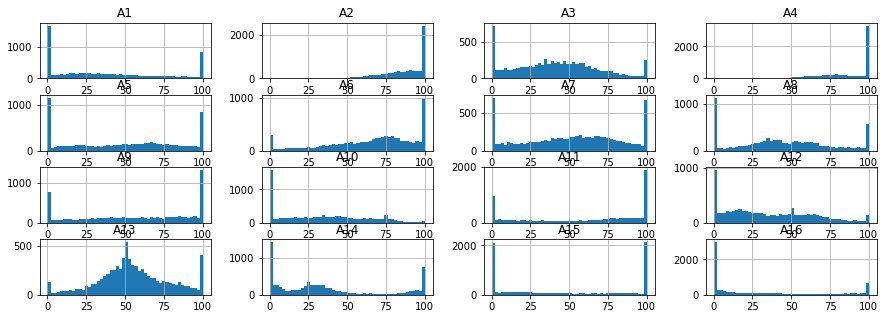

In [42]:
# we will discretise two continuous variables

X_train[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16']].hist(bins=50)
plt.show()

In [43]:
'''
Parameters
----------

cv : int, default=3
    Desired number of cross-validation fold to be used to fit the decision
    tree.

scoring: str, default='neg_mean_squared_error'
    Desired metric to optimise the performance for the tree. Comes from
    sklearn metrics. See DecisionTreeRegressor or DecisionTreeClassifier
    model evaluation documentation for more options:
    https://scikit-learn.org/stable/modules/model_evaluation.html

variables : list
    The list of numerical variables that will be transformed. If None, the
    discretiser will automatically select all numerical type variables.

regression : boolean, default=True
    Indicates whether the discretiser should train a regression or a classification
    decision tree.

param_grid : dictionary, default=None
    The list of parameters over which the decision tree should be optimised
    during the grid search. The param_grid can contain any of the permitted
    parameters for Scikit-learn's DecisionTreeRegressor() or
    DecisionTreeClassifier().

    If None, then param_grid = {'max_depth': [1, 2, 3, 4]}

random_state : int, default=None
    The random_state to initialise the training of the decision tree. It is one
    of the parameters of the Scikit-learn's DecisionTreeRegressor() or
    DecisionTreeClassifier(). For reproducibility it is recommended to set
    the random_state to an integer.
'''
#For DT using regression
#treeDisc = DecisionTreeDiscretiser(cv=3,
 #                                  scoring='neg_mean_squared_error',
 #                                  variables=['recency', 'frequency', 'monetary', 'time'],
 #                                  regression=False,
 #                                  random_state=29)
#regression = True!

# the DecisionTreeDiscretiser needs the target for fitting
#treeDisc.fit(X_train, y_train)


#param_grid={'max_depth': [4]}



treeDisc = DecisionTreeDiscretiser(cv=3,
                                   scoring='accuracy',
                                   variables=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16'],
                                   regression=False,
                                   random_state=29,
                                   )

treeDisc.fit(X_train, y_train)

DecisionTreeDiscretiser(random_state=29, regression=False, scoring='accuracy',
                        variables=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7',
                                   'A8', 'A9', 'A10', 'A11', 'A12', 'A13',
                                   'A14', 'A15', 'A16'])

In [44]:
treeDisc.binner_dict_

{'A1': GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=29),
              param_grid={'max_depth': [1, 2, 3, 4]}, scoring='accuracy'),
 'A2': GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=29),
              param_grid={'max_depth': [1, 2, 3, 4]}, scoring='accuracy'),
 'A3': GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=29),
              param_grid={'max_depth': [1, 2, 3, 4]}, scoring='accuracy'),
 'A4': GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=29),
              param_grid={'max_depth': [1, 2, 3, 4]}, scoring='accuracy'),
 'A5': GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=29),
              param_grid={'max_depth': [1, 2, 3, 4]}, scoring='accuracy'),
 'A6': GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=29),
              param_grid={'max_depth': [1, 2, 3, 4]}, scoring='accuracy'),
 'A7': GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=29),
           

In [45]:
# transform the data
train_t= treeDisc.transform(X_train)
test_t= treeDisc.transform(X_test)

In [46]:
# here I put side by side the original variable and the transformed variable

tmp = pd.concat([X_train[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'class']],
                 train_t[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'class']]], axis=1)

tmp.columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'class', 'A1_disc', 'A2_disc', 'A3_disc', 'A4_disc', 'A5_disc', 'A6_disc', 'A7_disc', 'A8_disc', 'A9_disc', 'A10_disc', 'A11_disc',
       'A12_disc', 'A13_disc', 'A14_disc', 'A15_disc', 'A16_disc', 'class']

tmp.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A8_disc,A9_disc,A10_disc,A11_disc,A12_disc,A13_disc,A14_disc,A15_disc,A16_disc,class
992,67,93,26,70,0,35,15,0,63,12,...,0.000000,0.120815,0.087341,0.031042,0.168784,0.013661,0.000000,0.159829,0.000000,0
6018,60,100,13,73,0,34,28,0,81,21,...,0.000000,0.218801,0.087341,0.007399,0.081395,0.071586,0.000000,0.096567,0.000000,0
2636,100,100,83,86,70,71,53,57,37,43,...,0.139428,0.143118,0.073150,0.132249,0.105263,0.330134,0.333333,0.049005,0.209672,1
5585,23,79,59,100,62,60,36,21,0,0,...,0.006211,0.009940,0.021583,0.132249,0.105263,0.089187,0.348684,0.132093,0.059233,2
2188,54,100,0,92,10,62,64,69,73,71,...,0.116883,0.190476,0.177528,0.007399,0.168784,0.071586,0.182247,0.096567,0.209672,9


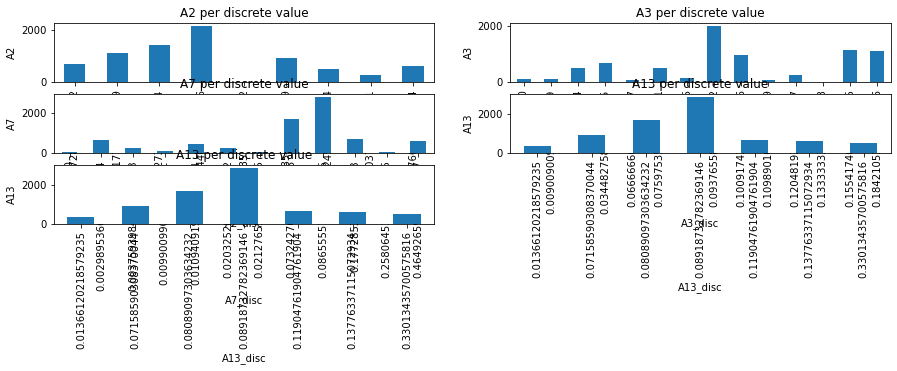

In [47]:
#visualize soe of the features after discretization

plt.subplot(4,2,1)
tmp.groupby('A2_disc')['A2'].count().plot.bar()
plt.ylabel('A2')
plt.title('A2 per discrete value')

plt.subplot(4,2,2)
tmp.groupby('A3_disc')['A3'].count().plot.bar()
plt.ylabel('A3')
plt.title('A3 per discrete value')

plt.subplot(4,2,3)
tmp.groupby('A7_disc')['A7'].count().plot.bar()
plt.ylabel('A7')
plt.title('A7 per discrete value')

plt.subplot(4,2,4)
tmp.groupby('A13_disc')['A13'].count().plot.bar()
plt.ylabel('A13')
plt.title('A13 per discrete value')

plt.subplot(4,2,5)
tmp.groupby('A13_disc')['A13'].count().plot.bar()
plt.ylabel('A13')
plt.title('A13 per discrete value')


plt.show()

In [48]:
tmp = tmp[['A1_disc', 'A2_disc', 'A3_disc', 'A4_disc', 'A5_disc', 'A6_disc', 'A7_disc', 'A8_disc', 'A9_disc', 'A10_disc', 'A11_disc',
       'A12_disc', 'A13_disc', 'A14_disc', 'A15_disc', 'A16_disc', 'class']]
tmp

,A1_disc,A2_disc,A3_disc,A4_disc,A5_disc,A6_disc,A7_disc,A8_disc,A9_disc,A10_disc,A11_disc,A12_disc,A13_disc,A14_disc,A15_disc,A16_disc,class,class
992,0.021944,0.009752,0.155417,0.127479,0.003597,0.000000,0.010941,0.000000,0.120815,0.087341,0.031042,0.168784,0.013661,0.000000,0.159829,0.000000,0,0
6018,0.021944,0.026034,0.075975,0.127479,0.003597,0.000000,0.073243,0.000000,0.218801,0.087341,0.007399,0.081395,0.071586,0.000000,0.096567,0.000000,0,0
2636,0.055626,0.026034,0.100917,0.166955,0.217454,0.070833,0.086556,0.139428,0.143118,0.073150,0.132249,0.105263,0.330134,0.333333,0.049005,0.209672,1,1
5585,0.065431,0.099129,0.093766,0.048487,0.217454,0.014458,0.073243,0.006211,0.009940,0.021583,0.132249,0.105263,0.089187,0.348684,0.132093,0.059233,2,2
2188,0.030547,0.026034,0.034483,0.166955,0.006024,0.014458,0.086556,0.116883,0.190476,0.177528,0.007399,0.168784,0.071586,0.182247,0.096567,0.209672,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,0.094340,0.243852,0.100917,0.048487,0.133501,0.072519,0.086556,0.027465,0.030769,0.021583,0.150352,0.041401,0.071586,0.002522,0.049005,0.000000,8,8
3264,0.311728,0.026034,0.075975,0.082278,0.000000,0.014458,0.073243,0.027465,0.057677,0.073150,0.031042,0.081395,0.071586,0.066142,0.124601,0.209672,4,4
2351,0.007463,0.099129,0.093766,0.048487,0.010702,0.164677,0.086556,0.139428,0.151335,0.153488,0.007399,0.041401,0.089187,0.182247,0.049005,0.209672,9,9
3305,0.094340,0.004237,0.034483,0.048544,0.055888,0.000000,0.086556,0.000000,0.057677,0.073150,0.150352,0.000000,0.137763,0.000000,0.055310,0.000000,0,0


In [49]:
# Export this dataset for discretization
tmp.to_csv('DT_discretized_Pendigits.csv',index=False)